#**A) Background, Goals, and Objectives**

##Background

Hello ms. Julia i'm a new data analyst for a fictional Indonesian investment platform startup called Tanam Vulus that currently focused on app-based mutual fund investment at the end of September 2021. In the mobile app developed by the company, users can register as investors and conduct buy or sell transactions on selected mutual funds. In addition, the platform offers robo-investing, which allows users to invest in a diversified mutual fund portfolio without hassle while considering the factors such as age, income, and overall risk profile.

In the second week of October, **the company is set to expand into government bond investment products**, in addition to its existing mutual fund products. The marketing and sales team would like to run a thematic communication campaign for the upcoming product but want to tailor the campaign to a few different relevant segments.

##Goals and Objectives
The goals of this Analysis is to *provide segmentation for the new investment product (Government Bond) and give communication recommendations for the themes of the campaign.*

The current objective of this analysis are :

1.   Read the data first to have a great understanding of the dataset.
2.   Clean the dataset to have a better insight or result.
3.   Explore the clean dataset, to provide some key insight into client characteristics.
4.   Create client segmentation based on a clean dataset.





# **B) Libraries**

In [298]:
#We Import the module first to help us with further analysis

import pandas as pd # we uses this for fast, flexible, and expressive data structures designed to make working with relational or labeled data both easy and intuitive.
import numpy as np #numpy stands for numerical python, we use this to provides support for large multidimensional array objects and various tools to work with them
from datetime import datetime # we use this for its built-in function called to_datetime()that converts date and time in string format to a DateTime object.
from datetime import timedelta # we use this for calculating differences in dates and also can be used for date manipulations in Python.
import matplotlib.pyplot as plt # we use this for its data visualization and graphical plotting library for Python and its numerical extension NumPy.
import seaborn as sns #similar with matplotlib, but have a better aestethic
from yellowbrick.cluster import SilhouetteVisualizer
pd.set_option('display.float_format', lambda x: '%.2f' % x) #we set this first so the float data(decimal) only ends with 2 numbers after zero.


from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to scalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

from sklearn.linear_model import LogisticRegression  #for logistic Regression
from sklearn.metrics import classification_report, confusion_matrix #for Confusion Matrix

import statsmodels.api as sm #to check p-value for logit regression

#**C) Data Cleaning**

##**Cleaning The User Dataset**

### Step.1 Import the User table into Python

In [299]:
#lets load the user table to Python first and make it a dataframe
user = pd.read_csv("/datasets/clusteringdata/users.csv")
user.sort_values(by=["user_id"])

user_id registration_import_datetime user_gender  user_age  \
13054    43195          2021-10-03 21:37:55      Female        36   
7945     47757          2021-10-02 18:44:56        Male        25   
9949     50701          2021-08-24 23:57:43      Female        28   
12274    50961          2021-08-20 16:22:29      Female        33   
9251     51883          2021-09-29 12:06:17        Male        27   
...        ...                          ...         ...       ...   
13672  4457509          2021-10-27 12:13:23        Male        39   
13957  4457532          2021-10-27 12:13:22      Female        41   
14342  4457596          2021-10-27 12:13:21      Female        44   
8726   4457622          2021-10-27 12:35:21        Male        26   
9425   4457700          2021-10-27 12:35:20      Female        27   

      user_occupation         user_income_range referral_code_used  \
13054       Pengusaha   > Rp 50 Juta - 100 Juta                NaN   
7945           Swasta   > Rp 50 Juta - 100 Juta                NaN   
9949              IRT      Rp 10 Juta - 50 Juta                NaN   
12274          Swasta  > Rp 100 Juta - 500 Juta                NaN   
9251          Pelajar   > Rp 50 Juta - 100 Juta                NaN   
...               ...                       ...                ...   
13672          Swasta      Rp 10 Juta - 50 Juta      used referral   
13957          Swasta                 < 10 Juta                NaN   
14342             IRT   > Rp 50 Juta - 100 Juta      used referral   
8726          Pelajar   > Rp 50 Juta - 100 Juta      used referral   
9425          Pelajar      Rp 10 Juta - 50 Juta                NaN   

      user_income_source  
13054  Keuntungan Bisnis  
7945                Gaji  
9949                Gaji  
12274               Gaji  
9251                Gaji  
...                  ...  
13672               Gaji  
13957               Gaji  
14342  Keuntungan Bisnis  
8726                Gaji  
9425                Gaji  

[14712 rows x 8 columns]

In [300]:
!ls /datasets/clusteringdata

users.csv


In [301]:
#lets see the table data information, and the user_id still weirdly be interger and date time still a string.
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


###Step 2. Changing or correcting the data type

In [302]:
#lets change the user_id into string first
user['user_id'] = user['user_id'].astype(str)
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  object
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(1), object(7)
memory usage: 919.6+ KB


In [303]:
#lets also change the registration_import_datetime column to datetime data type
user['registration_import_datetime'] = pd.to_datetime(user['registration_import_datetime'])
user

user_id registration_import_datetime user_gender  user_age  \
0       162882          2021-09-17 14:10:44      Female        51   
1      3485491          2021-10-09 11:11:34      Female        55   
2      1071649          2021-10-08 01:27:30        Male        50   
3      3816789          2021-08-12 07:19:32      Female        53   
4      3802293          2021-08-15 09:31:24      Female        47   
...        ...                          ...         ...       ...   
14707  4352347          2021-10-17 15:57:23        Male        49   
14708  4288026          2021-10-15 12:44:05      Female        49   
14709  4286882          2021-10-11 10:06:15      Female        49   
14710  4396739          2021-10-21 13:42:20        Male        49   
14711  4401986          2021-10-22 00:55:26      Female        49   

      user_occupation         user_income_range referral_code_used  \
0              Swasta  > Rp 500 Juta - 1 Miliar                NaN   
1              Others   > Rp 50 Juta - 100 Juta                NaN   
2              Swasta      Rp 10 Juta - 50 Juta                NaN   
3                 IRT   > Rp 50 Juta - 100 Juta                NaN   
4                 PNS  > Rp 500 Juta - 1 Miliar      used referral   
...               ...                       ...                ...   
14707          Swasta  > Rp 100 Juta - 500 Juta                NaN   
14708       Pengusaha  > Rp 100 Juta - 500 Juta                NaN   
14709          Swasta  > Rp 100 Juta - 500 Juta                NaN   
14710          Swasta  > Rp 100 Juta - 500 Juta                NaN   
14711             IRT  > Rp 100 Juta - 500 Juta      used referral   

       user_income_source  
0                    Gaji  
1                    Gaji  
2                    Gaji  
3                    Gaji  
4                    Gaji  
...                   ...  
14707                Gaji  
14708             Lainnya  
14709  Dari Suami / istri  
14710                Gaji  
14711   Keuntungan Bisnis  

[14712 rows x 8 columns]

In [304]:
#lets also check it again, if its already changed
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 919.6+ KB


### Step 3. Handling the null value and data manipulation


In [305]:
#no null value found, except on referral_code_used
user.isnull().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [306]:
#Lets fill the null value on referral_code_used , but first lets see the unique value first
user['referral_code_used'].unique().tolist()

[nan, 'used referral']

In [307]:
#Since its only two unique value, lets try and change it to Boolean, but first we need to change its value first
replaced_val_user = user.copy()

#fill the null value with 0 first
replaced_val_user['referral_code_used'] = replaced_val_user['referral_code_used'].fillna('0')

#change the string value to a numerical value too
replaced_val_user['referral_code_used'] = replaced_val_user['referral_code_used'].str.replace('used referral', '1')
replaced_val_user

user_id registration_import_datetime user_gender  user_age  \
0       162882          2021-09-17 14:10:44      Female        51   
1      3485491          2021-10-09 11:11:34      Female        55   
2      1071649          2021-10-08 01:27:30        Male        50   
3      3816789          2021-08-12 07:19:32      Female        53   
4      3802293          2021-08-15 09:31:24      Female        47   
...        ...                          ...         ...       ...   
14707  4352347          2021-10-17 15:57:23        Male        49   
14708  4288026          2021-10-15 12:44:05      Female        49   
14709  4286882          2021-10-11 10:06:15      Female        49   
14710  4396739          2021-10-21 13:42:20        Male        49   
14711  4401986          2021-10-22 00:55:26      Female        49   

      user_occupation         user_income_range referral_code_used  \
0              Swasta  > Rp 500 Juta - 1 Miliar                  0   
1              Others   > Rp 50 Juta - 100 Juta                  0   
2              Swasta      Rp 10 Juta - 50 Juta                  0   
3                 IRT   > Rp 50 Juta - 100 Juta                  0   
4                 PNS  > Rp 500 Juta - 1 Miliar                  1   
...               ...                       ...                ...   
14707          Swasta  > Rp 100 Juta - 500 Juta                  0   
14708       Pengusaha  > Rp 100 Juta - 500 Juta                  0   
14709          Swasta  > Rp 100 Juta - 500 Juta                  0   
14710          Swasta  > Rp 100 Juta - 500 Juta                  0   
14711             IRT  > Rp 100 Juta - 500 Juta                  1   

       user_income_source  
0                    Gaji  
1                    Gaji  
2                    Gaji  
3                    Gaji  
4                    Gaji  
...                   ...  
14707                Gaji  
14708             Lainnya  
14709  Dari Suami / istri  
14710                Gaji  
14711   Keuntungan Bisnis  

[14712 rows x 8 columns]

In [308]:
#lets change the referral_code_used data types to boolean
#but before changing it to boolean, first we must change it to a numeric first
replaced_val_user['referral_code_used']=pd.to_numeric(replaced_val_user['referral_code_used'])

#then after it become a numeric, we could easily change it to a boolean data type
replaced_val_user['referral_code_used'] = replaced_val_user['referral_code_used'].astype('bool')

#voila, the value on referral_code_used is now a boolean
replaced_val_user

user_id registration_import_datetime user_gender  user_age  \
0       162882          2021-09-17 14:10:44      Female        51   
1      3485491          2021-10-09 11:11:34      Female        55   
2      1071649          2021-10-08 01:27:30        Male        50   
3      3816789          2021-08-12 07:19:32      Female        53   
4      3802293          2021-08-15 09:31:24      Female        47   
...        ...                          ...         ...       ...   
14707  4352347          2021-10-17 15:57:23        Male        49   
14708  4288026          2021-10-15 12:44:05      Female        49   
14709  4286882          2021-10-11 10:06:15      Female        49   
14710  4396739          2021-10-21 13:42:20        Male        49   
14711  4401986          2021-10-22 00:55:26      Female        49   

      user_occupation         user_income_range  referral_code_used  \
0              Swasta  > Rp 500 Juta - 1 Miliar               False   
1              Others   > Rp 50 Juta - 100 Juta               False   
2              Swasta      Rp 10 Juta - 50 Juta               False   
3                 IRT   > Rp 50 Juta - 100 Juta               False   
4                 PNS  > Rp 500 Juta - 1 Miliar                True   
...               ...                       ...                 ...   
14707          Swasta  > Rp 100 Juta - 500 Juta               False   
14708       Pengusaha  > Rp 100 Juta - 500 Juta               False   
14709          Swasta  > Rp 100 Juta - 500 Juta               False   
14710          Swasta  > Rp 100 Juta - 500 Juta               False   
14711             IRT  > Rp 100 Juta - 500 Juta                True   

       user_income_source  
0                    Gaji  
1                    Gaji  
2                    Gaji  
3                    Gaji  
4                    Gaji  
...                   ...  
14707                Gaji  
14708             Lainnya  
14709  Dari Suami / istri  
14710                Gaji  
14711   Keuntungan Bisnis  

[14712 rows x 8 columns]

In [309]:
#lets change the label on the categorical data in the dataset

#lets change the occupation label so we could distinguish it easily
replaced_val_user['user_occupation'] = replaced_val_user['user_occupation'].replace(["Swasta","IRT",
                                                                              "PNS","Pengusaha","Pensiunan","TNI/Polisi","Guru","Pelajar"],
                                                                             ["Private Sector","Others",'Government Sector','Entrepreneur','Retired','Government Sector','Others','Student'])

#lets change the income range label so we could distinguish it easily
replaced_val_user['user_income_range'] = replaced_val_user['user_income_range'].replace(["< 10 Juta","Rp 10 Juta - 50 Juta","> Rp 50 Juta - 100 Juta",
                                                                              "> Rp 100 Juta - 500 Juta","> Rp 500 Juta - 1 Miliar","> Rp 1 Miliar"],
                                                                             ["A (Under 10 Mil)","B (10 Mil to 50 Mil)",'C (50 Mil to 100 Mil)','D (100 Mil to 500 Mil)','E (500 Mil to 1 Bil)','F (Over 1 Bil)'])

replaced_val_user['user_income_source'] = replaced_val_user['user_income_source'].replace(['Gaji', 'Keuntungan Bisnis', 'Lainnya', 'Dari Orang Tua / Anak',
                                                                                         'Undian', 'Tabungan', 'Warisan', 'Hasil Investasi','Dari Suami / istri', 'Bunga Simpanan'],
                                                                                        ['Salary', 'Business Profit', 'Others', 'From Family',
                                                                                         'Others', 'Savings or Investment', 'From Family', 'Savings or Investment','From Family', 'Savings or Investment'])

replaced_val_user

user_id registration_import_datetime user_gender  user_age  \
0       162882          2021-09-17 14:10:44      Female        51   
1      3485491          2021-10-09 11:11:34      Female        55   
2      1071649          2021-10-08 01:27:30        Male        50   
3      3816789          2021-08-12 07:19:32      Female        53   
4      3802293          2021-08-15 09:31:24      Female        47   
...        ...                          ...         ...       ...   
14707  4352347          2021-10-17 15:57:23        Male        49   
14708  4288026          2021-10-15 12:44:05      Female        49   
14709  4286882          2021-10-11 10:06:15      Female        49   
14710  4396739          2021-10-21 13:42:20        Male        49   
14711  4401986          2021-10-22 00:55:26      Female        49   

         user_occupation       user_income_range  referral_code_used  \
0         Private Sector    E (500 Mil to 1 Bil)               False   
1                 Others   C (50 Mil to 100 Mil)               False   
2         Private Sector    B (10 Mil to 50 Mil)               False   
3                 Others   C (50 Mil to 100 Mil)               False   
4      Government Sector    E (500 Mil to 1 Bil)                True   
...                  ...                     ...                 ...   
14707     Private Sector  D (100 Mil to 500 Mil)               False   
14708       Entrepreneur  D (100 Mil to 500 Mil)               False   
14709     Private Sector  D (100 Mil to 500 Mil)               False   
14710     Private Sector  D (100 Mil to 500 Mil)               False   
14711             Others  D (100 Mil to 500 Mil)                True   

      user_income_source  
0                 Salary  
1                 Salary  
2                 Salary  
3                 Salary  
4                 Salary  
...                  ...  
14707             Salary  
14708             Others  
14709        From Family  
14710             Salary  
14711    Business Profit  

[14712 rows x 8 columns]

In [310]:
#lets check again if the data types are converted perfectly (it does)
replaced_val_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  bool          
 7   user_income_source            14712 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 819.1+ KB


In [311]:
#lets check again if its there is a null value
replaced_val_user.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
dtype: int64

### Step 4. Checking for duplicates

In [312]:
#lets make sure there is a dupe or not
replaced_val_user[replaced_val_user['user_id'].duplicated()]

Empty DataFrame
Columns: [user_id, registration_import_datetime, user_gender, user_age, user_occupation, user_income_range, referral_code_used, user_income_source]
Index: []

In [313]:
#lets make sure again if there is a dupe or not
replaced_val_user.duplicated().sum()

0

### Step 5. Checking typo in dataset

In [314]:
#lets check unique value in each of the column, it seems the value are all unique and dont need a correction
uniq_user = replaced_val_user.copy()
print('Unique value of user_gender :', uniq_user['user_gender'].unique().tolist())
print('Unique value of user_occupation :', uniq_user['user_occupation'].unique().tolist())
print('Unique value of user_income_range :', uniq_user['user_income_range'].unique().tolist())
print('Unique value of user_income_source :', uniq_user['user_income_source'].unique().tolist())

Unique value of user_gender : ['Female', 'Male']
Unique value of user_occupation : ['Private Sector', 'Others', 'Government Sector', 'Entrepreneur', 'Retired', 'Student']
Unique value of user_income_range : ['E (500 Mil to 1 Bil)', 'C (50 Mil to 100 Mil)', 'B (10 Mil to 50 Mil)', 'A (Under 10 Mil)', 'D (100 Mil to 500 Mil)', 'F (Over 1 Bil)']
Unique value of user_income_source : ['Salary', 'Business Profit', 'Others', 'From Family', 'Savings or Investment']


###Step 6. Provide clean dataset

In [315]:
#it seems data was clean enough, and i dont do outlier check on user_age because of old people are common to have investments too
user_clean = uniq_user.copy()

user_clean.info() #this is the cleaned dataframe for user table
user_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  bool          
 7   user_income_source            14712 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 819.1+ KB


user_id registration_import_datetime user_gender  user_age  \
0   162882          2021-09-17 14:10:44      Female        51   
1  3485491          2021-10-09 11:11:34      Female        55   
2  1071649          2021-10-08 01:27:30        Male        50   
3  3816789          2021-08-12 07:19:32      Female        53   
4  3802293          2021-08-15 09:31:24      Female        47   

     user_occupation      user_income_range  referral_code_used  \
0     Private Sector   E (500 Mil to 1 Bil)               False   
1             Others  C (50 Mil to 100 Mil)               False   
2     Private Sector   B (10 Mil to 50 Mil)               False   
3             Others  C (50 Mil to 100 Mil)               False   
4  Government Sector   E (500 Mil to 1 Bil)                True   

  user_income_source  
0             Salary  
1             Salary  
2             Salary  
3             Salary  
4             Salary

##**Cleaning the Daily User Balance Dataset**

In [316]:
!ls /datasets/userbalance

daily_user_balance_sep21.csv


### Step 1. Import the User Balance Table into *Python*

In [317]:
balance = pd.read_csv("/datasets/userbalance/daily_user_balance_sep21.csv")
balance

user_id        date  Saham_AUM  Saham_invested_amount  \
0         50701  2021-08-30        NaN                    NaN   
1         50701  2021-08-31        NaN                    NaN   
2         50701  2021-09-01        NaN                    NaN   
3         50701  2021-09-02        NaN                    NaN   
4         50701  2021-09-03        NaN                    NaN   
...         ...         ...        ...                    ...   
158806  4165020  2021-09-30        NaN                    NaN   
158807  4165132  2021-09-30        NaN                    NaN   
158808  4165630  2021-09-30   41625.00               40000.00   
158809  4165704  2021-09-30        NaN                    NaN   
158810  4165830  2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN            0.00                        0.00   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  
0        10132277.00               10000000.00                          NaN  
1        10206945.00               10000000.00                         0.00  
2         9956556.00               10000000.00                         0.00  
3         9914858.00               10000000.00                         0.00  
4        10016360.00               10000000.00                         0.00  
...              ...                       ...                      

In [318]:
#lets check the data type first if there's something strange
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

### Step 2. Changing or correcting the data type

In [319]:
#lets change the datatype of user_id to string and date to datetime
balance['user_id'] = balance['user_id'].astype(str)
balance['date'] = pd.to_datetime(balance['date'])
balance

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN            0.00                        0.00   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  
0        10132277.00               10000000.00                          NaN  
1        10206945.00               10000000.00                         0.00  
2         9956556.00               10000000.00                         0.00  
3         9914858.00               10000000.00                         0.00  
4        10016360.00               10000000.00                         0.00  
...              ...                       ...                          ...  
15

### Step 3. Duplicate Value Check

In [320]:
#lets make sure again if there is a dupe or not
balance.duplicated().sum()

0

### Step 4. Adding a new column to help for analysis and outlier detection

In [321]:
#lets add a total of transaction of each of the mutual funds, so we could spot the a crazy rich Sultan (crazy rich user that spends a lot (outliers))
balance_total = balance.copy()
transaction_total = ['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']
balance_total['total_transaction'] = balance_total[transaction_total].sum(axis=1)
balance_total

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN            0.00                        0.00   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0        10132277.00               10000000.00                          NaN   
1        10206945.00               10000000.00                         0.00   
2         9956556.00               10000000.00                         0.00   
3         9914858.00               10000000.00                         0.00   
4        10016360.00               10000000.00                         0.00   
...              ...                       ...                          ..

In [322]:
#lets also add a total of transaction of each of the Invested amount and AUM, to use for further analysis
invested_total = ['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']
balance_total['total_invested'] = balance_total[invested_total].sum(axis=1)

AUM_total = ['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']
balance_total['total_AUM'] = balance_total[AUM_total].sum(axis=1)

balance_total

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN            0.00                        0.00   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0        10132277.00               10000000.00                          NaN   
1        10206945.00               10000000.00                         0.00   
2         9956556.00               10000000.00                         0.00   
3         9914858.00               10000000.00                         0.00   
4        10016360.00               10000000.00                         0.00   
...              ...                       ...                          ..

### Step 5. Handling the null value

In [323]:
#lets change the '0' value to a numpy nan inso the zeroes or null doesnt get calculated in outlier detection, descriptive analysis, or EDA and make it bias
balance_nan = balance_total.copy()
balance_nan.fillna(0)
balance_nan = balance_nan.replace(0.0, np.nan)
balance_nan

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN             NaN                         NaN   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0        10132277.00               10000000.00                          NaN   
1        10206945.00               10000000.00                          NaN   
2         9956556.00               10000000.00                          NaN   
3         9914858.00               10000000.00                          NaN   
4        10016360.00               10000000.00                          NaN   
...              ...                       ...                          ..

### Step 6. Check the irregularities in the dataset

---



In [324]:
#but there is something weird in this data, the null amount of Saham_AUM and Saham_invested amount are different lets check-it below
balance_nan.sort_values(by=['Saham_AUM'])

user_id       date  Saham_AUM  Saham_invested_amount  \
137281  3984025 2021-09-28     112.00                 114.00   
144745  4014331 2021-09-28     113.00                    NaN   
137280  3984025 2021-09-27     113.00                 114.00   
137279  3984025 2021-09-24     113.00                 114.00   
137278  3984025 2021-09-23     113.00                 114.00   
...         ...        ...        ...                    ...   
158805  4164993 2021-09-30        NaN                    NaN   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
137281                       NaN             NaN                         NaN   
144745                       NaN             NaN                         NaN   
137280                       NaN             NaN                         NaN   
137279                       NaN             NaN                         NaN   
137278                    114.00             NaN                         NaN   
...                          ...             ...                         ...   
158805                       NaN             NaN                         NaN   
158806                       NaN             NaN                         NaN   
158807                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
137281                            NaN                   NaN   
144745                            NaN                   NaN   
137280                            NaN                   NaN   
137279                            NaN                   NaN   
137278                            NaN                   NaN   
...                               ...                   ...   
158805                            NaN             175081.00   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
137281                               NaN                                  NaN   
144745                               NaN                                  NaN   
137280                               NaN                                  NaN   
137279                               NaN                                  NaN   
137278                               NaN                                  NaN   
...                                  ...                                  ...   
158805                         175000.00                                  NaN   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
137281           NaN                       NaN                          NaN   
144745           NaN                       NaN                          NaN   
137280           NaN                       NaN                          NaN   
137279           NaN                       NaN                          NaN   
137278           NaN                       NaN                          NaN   
...              ...                       ...                          ..

In [325]:
#it seems there is some user that already have a Saham account before it got recorded, i wont remove it for now because im afraid that will make my data bias so let it be for now
look_val = balance_nan[(balance_nan['Saham_invested_amount'].isnull()) & (balance_nan['Saham_AUM'] > 0 )]
look_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 2477 to 153960
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              223 non-null    object        
 1   date                                 223 non-null    datetime64[ns]
 2   Saham_AUM                            223 non-null    float64       
 3   Saham_invested_amount                0 non-null      float64       
 4   Saham_transaction_amount             0 non-null      float64       
 5   Pasar_Uang_AUM                       41 non-null     float64       
 6   Pasar_Uang_invested_amount           41 non-null     float64       
 7   Pasar_Uang_transaction_amount        5 non-null      float64       
 8   Pendapatan_Tetap_AUM                 37 non-null     float64       
 9   Pendapatan_Tetap_invested_amount     37 non-null     float64       
 10  Pendapat

### Step 7. Do an Outlier detection and cleaning with z-score

In [326]:
#lets use this data frame as a basis for outlier detection
balance_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            82722 non-null   float64       
 3   Saham_invested_amount                82499 non-null   float64       
 4   Saham_transaction_amount             5279 non-null    float64       
 5   Pasar_Uang_AUM                       102452 non-null  float64       
 6   Pasar_Uang_invested_amount           102452 non-null  float64       
 7   Pasar_Uang_transaction_amount        6436 non-null    float64       
 8   Pendapatan_Tetap_AUM                 85247 non-null   float64       
 9   Pendapatan_Tetap_invested_amount     85247 non-null   float64       
 

In [327]:
#lets try the z-score outlier detection method if there's any difference
balance_z = balance_nan.copy()
balance_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            82722 non-null   float64       
 3   Saham_invested_amount                82499 non-null   float64       
 4   Saham_transaction_amount             5279 non-null    float64       
 5   Pasar_Uang_AUM                       102452 non-null  float64       
 6   Pasar_Uang_invested_amount           102452 non-null  float64       
 7   Pasar_Uang_transaction_amount        6436 non-null    float64       
 8   Pendapatan_Tetap_AUM                 85247 non-null   float64       
 9   Pendapatan_Tetap_invested_amount     85247 non-null   float64       
 

In [328]:
#lets calculate the z-score of the total_transaction column to look at the outliers
balance_z['z_score']= (balance_z['total_AUM'] - balance_z['total_AUM'].mean())/balance_z['total_AUM'].std()
balance_z

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN             NaN                         NaN   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0        10132277.00               10000000.00                          NaN   
1        10206945.00               10000000.00                          NaN   
2         9956556.00               10000000.00                          NaN   
3         9914858.00               10000000.00                          NaN   
4        10016360.00               10000000.00                          NaN   
...              ...                       ...                          ..

In [329]:
#lets see the outlier in form of z-score
balance_z.boxplot(column=['z_score'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

<AxesSubplot: >

In [330]:
# lets check which row is considered an outlier (it means that the z-score is higher than 2 or lower than -2)
balance_z_outlier_user = balance_z[(balance_z['z_score'] > 2) | (balance_z['z_score'] < -2)]
balance_z_outlier_user

#there is 64 row that has an abundant transaction, in which the user is considered a sultan (outlier) if the minimal transaction reach hundreds of milions rupiah in a day
balance_z_outlier_user['total_AUM']

996       75035972.00
997       75062389.00
998       75074205.00
999       75084028.00
1000      75100209.00
             ...     
151932   550200998.00
151933   900474996.00
151934   900236080.00
151935   899949109.00
158320    83418864.00
Name: total_AUM, Length: 967, dtype: float64

In [331]:
#lets see the transaction of the unique user that are a sultan (outlier)
user_out = balance_z_outlier_user['user_id'].unique()
balance_z_user_out = balance_z[balance_z['user_id'].isin(user_out)]
balance_z_user_out
#it seems that we will remove 1327 rows of data

user_id       date  Saham_AUM  Saham_invested_amount  \
995      212020 2021-08-27        NaN                    NaN   
996      212020 2021-08-30        NaN                    NaN   
997      212020 2021-08-31        NaN                    NaN   
998      212020 2021-09-01        NaN                    NaN   
999      212020 2021-09-02        NaN                    NaN   
...         ...        ...        ...                    ...   
151932  4056373 2021-09-27        NaN                    NaN   
151933  4056373 2021-09-28        NaN                    NaN   
151934  4056373 2021-09-29        NaN                    NaN   
151935  4056373 2021-09-30        NaN                    NaN   
158320  4137810 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
995                          NaN       500148.00                   500000.00   
996                          NaN     23009163.00                 23000000.00   
997                          NaN     23009129.00                 23000000.00   
998                          NaN     23011964.00                 23000000.00   
999                          NaN     23014710.00                 23000000.00   
...                          ...             ...                         ...   
151932                       NaN    450209370.00                450000000.00   
151933                       NaN    450325149.00                450000000.00   
151934                       NaN    450367266.00                450000000.00   
151935                       NaN    450423947.00                450000000.00   
158320                       NaN             NaN                         NaN   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
995                               NaN            2001016.00   
996                       22500000.00           52026809.00   
997                               NaN           52053260.00   
998                               NaN           52062241.00   
999                               NaN           52069318.00   
...                               ...                   ...   
151932                            NaN           99991628.00   
151933                            NaN          450149847.00   
151934                            NaN          449868814.00   
151935                            NaN          449525162.00   
158320                            NaN           83418864.00   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
995                           2000000.00                                  NaN   
996                          52000000.00                          50000000.00   
997                          52000000.00                                  NaN   
998                          52000000.00                                  NaN   
999                          52000000.00                                  NaN   
...                                  ...                                  ...   
151932                      100000000.00                                  NaN   
151933                      450000000.00                         350000000.00   
151934                      450000000.00                                  NaN   
151935                      450000000.00                                  NaN   
158320                       83400000.00                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
995              NaN                       NaN                          NaN   
996              NaN                       NaN                          NaN   
997              NaN                       NaN                          NaN   
998              NaN                       NaN                          NaN   
999              NaN                       NaN                          NaN   
...              ...                       ...                          ..

In [332]:
#lets remove the user that have a high number of transaction from the dataset (aka the Sultan)
balance_z_remove_out =  balance_z[~balance_z['user_id'].isin(user_out)]
balance_z_remove_out

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN             NaN                         NaN   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0        10132277.00               10000000.00                          NaN   
1        10206945.00               10000000.00                          NaN   
2         9956556.00               10000000.00                          NaN   
3         9914858.00               10000000.00                          NaN   
4        10016360.00               10000000.00                          NaN   
...              ...                       ...                          ..

In [333]:
#lets see how many user are considered a sultan/outlier and the non-sultan

count_user = balance_z['user_id'].nunique()
count_user_outlier_z = balance_z_user_out['user_id'].nunique()
count_user_non_outlier_z = balance_z_remove_out['user_id'].nunique()

print('This is the number of user in the dataset :',count_user)
print('This is the number of Sultan (outlier) user in the dataset :',count_user_outlier_z)
print('This is the percentage of Sultan (outlier) user in the dataset :',(count_user_outlier_z) / count_user)
print('This is the number of Non-Sultan user in the dataset:',count_user_non_outlier_z)
print('this is the min daily transaction of a Sultan =',balance_z_user_out['total_transaction'].min(), '<<< The daily transaction are over 100mil rupiah, a true crazy rich sultan!' )

This is the number of user in the dataset : 8277
This is the number of Sultan (outlier) user in the dataset : 58
This is the percentage of Sultan (outlier) user in the dataset : 0.007007369819983086
This is the number of Non-Sultan user in the dataset: 8219
this is the min daily transaction of a Sultan = -185000000.0 <<< The daily transaction are over 100mil rupiah, a true crazy rich sultan!


In [334]:
#lets check the min total transaction daily before and after outlier check, it seems it change to a reasonable amount after the crazy rich sultan (outlier) were removed
print('Average total transaction daily before outlier detection :',balance_z['total_AUM'].mean())
print('Average total transaction daily after outlier detection :',balance_z_remove_out['total_AUM'].mean())

Average total transaction daily before outlier detection : 3064589.0106637976
Average total transaction daily after outlier detection : 1409330.846096042


In [335]:
#so this is the cleaned balance dataset with z-score outlier detection method
balance_z_remove_out

user_id       date  Saham_AUM  Saham_invested_amount  \
0         50701 2021-08-30        NaN                    NaN   
1         50701 2021-08-31        NaN                    NaN   
2         50701 2021-09-01        NaN                    NaN   
3         50701 2021-09-02        NaN                    NaN   
4         50701 2021-09-03        NaN                    NaN   
...         ...        ...        ...                    ...   
158806  4165020 2021-09-30        NaN                    NaN   
158807  4165132 2021-09-30        NaN                    NaN   
158808  4165630 2021-09-30   41625.00               40000.00   
158809  4165704 2021-09-30        NaN                    NaN   
158810  4165830 2021-09-30        NaN                    NaN   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            NaN             NaN                         NaN   
1                            NaN             NaN                         NaN   
2                            NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
4                            NaN             NaN                         NaN   
...                          ...             ...                         ...   
158806                       NaN             NaN                         NaN   
158807                       NaN        10001.00                    10000.00   
158808                       NaN        10001.00                    10000.00   
158809                       NaN             NaN                         NaN   
158810                       NaN        10001.00                    10000.00   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
158806                            NaN                   NaN   
158807                            NaN                   NaN   
158808                            NaN              49869.00   
158809                            NaN               9987.00   
158810                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
158806                               NaN                                  NaN   
158807                               NaN                                  NaN   
158808                          50000.00                                  NaN   
158809                          10000.00                                  NaN   
158810                               NaN                                  NaN   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0        10132277.00               10000000.00                          NaN   
1        10206945.00               10000000.00                          NaN   
2         9956556.00               10000000.00                          NaN   
3         9914858.00               10000000.00                          NaN   
4        10016360.00               10000000.00                          NaN   
...              ...                       ...                          ..

Compare between before and after Outlier Detection Method


In [336]:
#lets see how much data we remove in between these 3 method (the threshold is 10%)

bal= balance_nan['user_id'].count()
zscore = balance_z_user_out['user_id'].count()
print('With Z-Score method we clean',zscore,'numbers of data',bal,'data, in which it is',zscore/bal,'or 0.8 percent of data')

With Z-Score method we clean 1327 numbers of data 158811 data, in which it is 0.008355844368463141 or 0.8 percent of data


###Step 8. Provide clean datasets

In [337]:
# it seems that the std.dev and Z-Score yield the better number, so we use the Z-Score
balance_clean = balance_z_remove_out.copy()
balance_clean.drop(['z_score'], axis = 1, inplace = True) #lets drop the z_score column so it doesnt disturb us later
balance_clean.info() #this is the cleaned user balance data
balance_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157484 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              157484 non-null  object        
 1   date                                 157484 non-null  datetime64[ns]
 2   Saham_AUM                            82159 non-null   float64       
 3   Saham_invested_amount                81936 non-null   float64       
 4   Saham_transaction_amount             5195 non-null    float64       
 5   Pasar_Uang_AUM                       101598 non-null  float64       
 6   Pasar_Uang_invested_amount           101598 non-null  float64       
 7   Pasar_Uang_transaction_amount        6323 non-null    float64       
 8   Pendapatan_Tetap_AUM                 84164 non-null   float64       
 9   Pendapatan_Tetap_invested_amount     84164 non-null   float64       
 

user_id       date  Saham_AUM  Saham_invested_amount  \
0   50701 2021-08-30        NaN                    NaN   
1   50701 2021-08-31        NaN                    NaN   
2   50701 2021-09-01        NaN                    NaN   
3   50701 2021-09-02        NaN                    NaN   
4   50701 2021-09-03        NaN                    NaN   

   Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                       NaN             NaN                         NaN   
1                       NaN             NaN                         NaN   
2                       NaN             NaN                         NaN   
3                       NaN             NaN                         NaN   
4                       NaN             NaN                         NaN   

   Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                            NaN                   NaN   
1                            NaN                   NaN   
2                            NaN                   NaN   
3                            NaN                   NaN   
4                            NaN                   NaN   

   Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                               NaN                                  NaN   
1                               NaN                                  NaN   
2                               NaN                                  NaN   
3                               NaN                                  NaN   
4                               NaN                                  NaN   

   Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0   10132277.00               10000000.00                          NaN   
1   10206945.00               10000000.00                          NaN   
2    9956556.00               10000000.00                          NaN   
3    9914858.00               10000000.00                          NaN   
4   10016360.00               10000000.00                          NaN   

   total_transaction  total_invested   total_AUM  
0                NaN     10000000.00 10132277.00  
1                NaN     10000000.00 10206945.00  
2                NaN     10000000.00  9956556.00  
3                NaN     10000000.00  9914858.00  
4                NaN     10000000.00 10016360.00

##**Merging the datasets**


In [338]:
#lets merge the user balance and user data, to see the extra information of the user in the user balance table
userdata_balance = user_clean.merge(balance_clean,  how='right', left_on='user_id', right_on='user_id')
userdata_balances = userdata_balance.dropna(subset = ["user_gender"]) #there is 330 out of 150k+ data null value on user data like gender, occupation, etc so lets drop it because it might be the user age outlier that we look at user table before
userdata_balances['referral_code_used'] = userdata_balances['referral_code_used'].astype('bool') #somehow this column is change back to an object or string, so we change it to Bool back
userdata_balances

#For now i keep my data on daily basis because i want to analyze the daily trend of transaction buy/sell to see when or what day the user most likely do buy or sell mutual funds

user_id registration_import_datetime user_gender  user_age  \
0         50701          2021-08-24 23:57:43      Female        28   
1         50701          2021-08-24 23:57:43      Female        28   
2         50701          2021-08-24 23:57:43      Female        28   
3         50701          2021-08-24 23:57:43      Female        28   
4         50701          2021-08-24 23:57:43      Female        28   
...         ...                          ...         ...       ...   
157479  4165020          2021-09-28 12:04:25        Male        24   
157480  4165132          2021-09-28 12:04:22        Male        18   
157481  4165630          2021-09-28 12:46:26      Female        28   
157482  4165704          2021-09-28 12:54:00        Male        25   
157483  4165830          2021-09-28 13:20:00        Male        37   

       user_occupation      user_income_range  referral_code_used  \
0               Others   B (10 Mil to 50 Mil)               False   
1               Others   B (10 Mil to 50 Mil)               False   
2               Others   B (10 Mil to 50 Mil)               False   
3               Others   B (10 Mil to 50 Mil)               False   
4               Others   B (10 Mil to 50 Mil)               False   
...                ...                    ...                 ...   
157479          Others       A (Under 10 Mil)                True   
157480         Student       A (Under 10 Mil)                True   
157481  Private Sector   B (10 Mil to 50 Mil)               False   
157482  Private Sector   B (10 Mil to 50 Mil)                True   
157483          Others  C (50 Mil to 100 Mil)                True   

           user_income_source       date  Saham_AUM  ...  \
0                      Salary 2021-08-30        NaN  ...   
1                      Salary 2021-08-31        NaN  ...   
2                      Salary 2021-09-01        NaN  ...   
3                      Salary 2021-09-02        NaN  ...   
4                      Salary 2021-09-03        NaN  ...   
...                       ...        ...        ...  ...   
157479        Business Profit 2021-09-30        NaN  ...   
157480  Savings or Investment 2021-09-30        NaN  ...   
157481            From Family 2021-09-30   41625.00  ...   
157482                 Salary 2021-09-30        NaN  ...   
157483        Business Profit 2021-09-30        NaN  ...   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
...                               ...                   ...   
157479                            NaN                   NaN   
157480                            NaN                   NaN   
157481                            NaN              49869.00   
157482                            NaN               9987.00   
157483                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
157479                               NaN                                  NaN   
157480                               NaN                                  NaN   
157481                          50000.00                                  NaN   
157482                          10000.00          

## Data Transformation

### a. User End of Period Mutual Funds Value

In [339]:
#Lets Transform some data to find end-of-period user mutual funds investment value of each month
eop_aug = userdata_balance[(userdata_balance['date'] == '2021-08-31')]
eop_sep = userdata_balance[(userdata_balance['date'] == '2021-09-30')]
end_of_period = pd.concat([eop_aug , eop_sep])
end_of_period['month'] = end_of_period['date'] #make a new column as month

#make the EOP as a new column (to make it easier to drop it), and calculate the profit of each mutual funds
end_of_period['EOP_Saham_AUM'] = end_of_period['Saham_AUM']
end_of_period['EOP_Saham_invested_amount'] = end_of_period['Saham_invested_amount']
end_of_period['EOP_Saham_profit'] = end_of_period['Saham_AUM'] - end_of_period['Saham_invested_amount']

end_of_period['EOP_Pasar_Uang_AUM'] = end_of_period['Pasar_Uang_AUM']
end_of_period['EOP_Pasar_Uang_invested_amount'] = end_of_period['Pasar_Uang_invested_amount']
end_of_period['EOP_Pasar_Uang_profit'] = end_of_period['Pasar_Uang_AUM'] - end_of_period['Pasar_Uang_invested_amount']

end_of_period['EOP_Pendapatan_Tetap_AUM'] = end_of_period['Pendapatan_Tetap_AUM']
end_of_period['EOP_Pendapatan_Tetap_invested_amount'] = end_of_period['Pendapatan_Tetap_invested_amount']
end_of_period['EOP_Pendapatan_Tetap_profit'] = end_of_period['Pendapatan_Tetap_AUM'] - end_of_period['Pendapatan_Tetap_invested_amount']

end_of_period['EOP_Campuran_AUM'] = end_of_period['Campuran_AUM']
end_of_period['EOP_Campuran_invested_amount'] = end_of_period['Campuran_invested_amount']
end_of_period['EOP_Campuran_profit'] = end_of_period['EOP_Campuran_AUM'] - end_of_period['EOP_Campuran_invested_amount']



#drop the column we dont use
list_columns = end_of_period.columns.to_list()
drop_columns = list_columns[1:24]
end_of_period = end_of_period.drop(columns=drop_columns, axis = 1)
end_of_period['month'] = end_of_period['month'].dt.strftime('%b %Y')
end_of_period = end_of_period.fillna(0)
end_of_period

user_id     month  EOP_Saham_AUM  EOP_Saham_invested_amount  \
1         50701  Aug 2021           0.00                       0.00   
24        50961  Aug 2021      716057.00                  700000.00   
52        53759  Aug 2021       70839.00                   70000.00   
77        54759  Aug 2021           0.00                       0.00   
114       61414  Aug 2021           0.00                       0.00   
...         ...       ...            ...                        ...   
157479  4165020  Sep 2021           0.00                       0.00   
157480  4165132  Sep 2021           0.00                       0.00   
157481  4165630  Sep 2021       41625.00                   40000.00   
157482  4165704  Sep 2021           0.00                       0.00   
157483  4165830  Sep 2021           0.00                       0.00   

        EOP_Saham_profit  EOP_Pasar_Uang_AUM  EOP_Pasar_Uang_invested_amount  \
1                   0.00                0.00                            0.00   
24              16057.00           100049.00                       100000.00   
52                839.00            10006.00                        10000.00   
77                  0.00         10007875.00                     10000000.00   
114                 0.00                0.00                            0.00   
...                  ...                 ...                             ...   
157479              0.00                0.00                            0.00   
157480              0.00            10001.00                        10000.00   
157481           1625.00            10001.00                        10000.00   
157482              0.00                0.00                            0.00   
157483              0.00            10001.00                        10000.00   

        EOP_Pasar_Uang_profit  EOP_Pendapatan_Tetap_AUM  \
1                        0.00                      0.00   
24                      49.00                 200117.00   
52                       6.00                  20066.00   
77                    7875.00                      0.00   
114                      0.00                      0.00   
...                       ...                       ...   
157479                   0.00                      0.00   
157480                   1.00                      0.00   
157481                   1.00                  49869.00   
157482                   0.00                   9987.00   
157483                   1.00                      0.00   

        EOP_Pendapatan_Tetap_invested_amount  EOP_Pendapatan_Tetap_profit  \
1                                       0.00                         0.00   
24                                 200000.00                       117.00   
52                                  20000.00                        66.00   
77                                      0.00                         0.00   
114                                     0.00                         0.00   
...                                      ...                          ...   
157479                                  0.00                         0.00   
157480                                  0.00                         0.00   
157481                              50000.00                      -131.00   
157482                              10000.00                       -13.00   
157483                                  0.00                         0.00   

        EOP_Campuran_AUM  EOP_Campuran_invested_amount  EOP_Campuran_profit  
1            10206945.00                   10000000.00            206945.00  
24                  0.00                          0.00                 0.00  
52                  0.00                          0.00                 0.00  
77                  0.00                          0.00                 0.00  
114                 0.00                          0.00                 0.00  
...                  ...                           ...                  ...  
157479        

In [340]:
#lets make a total of each AUM, infested, and also make a total profit
end_of_period['EOP_total_AUM'] = (end_of_period['EOP_Saham_AUM'] + end_of_period['EOP_Pasar_Uang_AUM']
                                  + end_of_period['EOP_Pendapatan_Tetap_AUM'] + end_of_period['EOP_Campuran_AUM'])
end_of_period['EOP_total_invested_amount'] = (end_of_period['EOP_Saham_invested_amount'] + end_of_period['EOP_Pasar_Uang_invested_amount'] + end_of_period['EOP_Pendapatan_Tetap_invested_amount'] + end_of_period['EOP_Campuran_invested_amount'])
end_of_period['EOP_total_profit'] = end_of_period['EOP_total_AUM'] - end_of_period['EOP_total_invested_amount']
end_of_period.info()
end_of_period.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11265 entries, 1 to 157483
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   user_id                               11265 non-null  object 
 1   month                                 11265 non-null  object 
 2   EOP_Saham_AUM                         11265 non-null  float64
 3   EOP_Saham_invested_amount             11265 non-null  float64
 4   EOP_Saham_profit                      11265 non-null  float64
 5   EOP_Pasar_Uang_AUM                    11265 non-null  float64
 6   EOP_Pasar_Uang_invested_amount        11265 non-null  float64
 7   EOP_Pasar_Uang_profit                 11265 non-null  float64
 8   EOP_Pendapatan_Tetap_AUM              11265 non-null  float64
 9   EOP_Pendapatan_Tetap_invested_amount  11265 non-null  float64
 10  EOP_Pendapatan_Tetap_profit           11265 non-null  float64
 11  EOP_Campuran_A

user_id     month  EOP_Saham_AUM  EOP_Saham_invested_amount  \
1     50701  Aug 2021           0.00                       0.00   
24    50961  Aug 2021      716057.00                  700000.00   
52    53759  Aug 2021       70839.00                   70000.00   
77    54759  Aug 2021           0.00                       0.00   
114   61414  Aug 2021           0.00                       0.00   

     EOP_Saham_profit  EOP_Pasar_Uang_AUM  EOP_Pasar_Uang_invested_amount  \
1                0.00                0.00                            0.00   
24           16057.00           100049.00                       100000.00   
52             839.00            10006.00                        10000.00   
77               0.00         10007875.00                     10000000.00   
114              0.00                0.00                            0.00   

     EOP_Pasar_Uang_profit  EOP_Pendapatan_Tetap_AUM  \
1                     0.00                      0.00   
24                   49.00                 200117.00   
52                    6.00                  20066.00   
77                 7875.00                      0.00   
114                   0.00                      0.00   

     EOP_Pendapatan_Tetap_invested_amount  EOP_Pendapatan_Tetap_profit  \
1                                    0.00                         0.00   
24                              200000.00                       117.00   
52                               20000.00                        66.00   
77                                   0.00                         0.00   
114                                  0.00                         0.00   

     EOP_Campuran_AUM  EOP_Campuran_invested_amount  EOP_Campuran_profit  \
1         10206945.00                   10000000.00            206945.00   
24               0.00                          0.00                 0.00   
52               0.00                          0.00                 0.00   
77               0.00                          0.00                 0.00   
114              0.00                          0.00                 0.00   

     EOP_total_AUM  EOP_total_invested_amount  EOP_total_profit  
1      10206945.00                10000000.00         206945.00  
24      1016223.00                 1000000.00          16223.00  
52       100911.00                  100000.00            911.00  
77     10007875.00                10000000.00           7875.00  
114           0.00                       0.00              0.00

### b. Monthy Total Transaction (Buy and Sell)

####Monthly Transaction of Buy

In [341]:
#lets check for the monthly buy transaction per-user and check it per mutual funds so we got a more accurate number
transaction_aug = userdata_balance[(userdata_balance['date'] <= '2021-08-31')] #Lets Filter the date for August

# Make an August monthly buy transaction of Saham mutual funds
transaction_aug_buy_saham = transaction_aug[(transaction_aug['Saham_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_aug_buy_saham['month'] = transaction_aug_buy_saham['date'] #make a new column as month
transaction_aug_buy_saham['month'] = transaction_aug_buy_saham['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_buy_saham['monthly_buy_Saham'] = transaction_aug_buy_saham['Saham_transaction_amount'] #change the column name to monthly_buy
group_transaction_aug_buy_saham = transaction_aug_buy_saham.groupby(['user_id','month'], as_index=False).sum() #groupby it per user

#drop the column we dont use
list_columns = group_transaction_aug_buy_saham.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_buy_saham = group_transaction_aug_buy_saham.drop(columns=drop_columns, axis = 1)


# Make an August monthly buy transaction of Pasar Uang mutual funds
transaction_aug_buy_pu = transaction_aug[(transaction_aug['Pasar_Uang_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_aug_buy_pu['month'] = transaction_aug_buy_pu['date'] #make a new column as month
transaction_aug_buy_pu['month'] = transaction_aug_buy_pu['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_buy_pu['monthly_buy_Pasar_Uang'] = transaction_aug_buy_pu['Pasar_Uang_transaction_amount']#change the column name to monthly_buy
group_transaction_aug_buy_pu = transaction_aug_buy_pu.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_aug_buy_pu.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_buy_pu = group_transaction_aug_buy_pu.drop(columns=drop_columns, axis = 1)


# Make an August monthly buy transaction of Pendapatan Tetap mutual funds
transaction_aug_buy_pt = transaction_aug[(transaction_aug['Pendapatan_Tetap_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_aug_buy_pt['month'] = transaction_aug_buy_pt['date'] #make a new column as month
transaction_aug_buy_pt['month'] = transaction_aug_buy_pt['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_buy_pt['monthly_buy_Pendapatan_Tetap'] = transaction_aug_buy_pt['Pendapatan_Tetap_transaction_amount']#change the column name to monthly_buy
group_transaction_aug_buy_pt = transaction_aug_buy_pt.groupby(['user_id','month'], as_index=False).sum() #groupby it per user

#drop the column we dont use
list_columns = group_transaction_aug_buy_pt.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_buy_pt = group_transaction_aug_buy_pt.drop(columns=drop_columns, axis = 1)
group_transaction_aug_buy_pt


# Make an August monthly buy transaction of Campuran mutual funds
transaction_aug_buy_campuran = transaction_aug[(transaction_aug['Campuran_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_aug_buy_campuran['month'] = transaction_aug_buy_campuran['date'] #make a new column as month
transaction_aug_buy_campuran['month'] = transaction_aug_buy_campuran['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_buy_campuran.groupby(['user_id'], as_index=False).sum() #groupby it per user
transaction_aug_buy_campuran['monthly_buy_Campuran'] = transaction_aug_buy_campuran['Campuran_transaction_amount']#change the column name to monthly_buy
group_transaction_aug_buy_campuran = transaction_aug_buy_campuran.groupby(['user_id','month'], as_index=False).sum() #groupby it per user

#drop the column we dont use
list_columns = group_transaction_aug_buy_campuran.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_buy_campuran = group_transaction_aug_buy_campuran.drop(columns=drop_columns, axis = 1)
group_transaction_aug_buy_campuran

#lets merge all of it
transaction_aug_buy1 = group_transaction_aug_buy_saham.merge(group_transaction_aug_buy_pu, how='outer', on=('user_id','month'))
transaction_aug_buy2 = transaction_aug_buy1.merge(group_transaction_aug_buy_pt, how='outer', on=('user_id','month'))
transaction_aug_buy = transaction_aug_buy2.merge(group_transaction_aug_buy_campuran, how='outer', on=('user_id','month'))

#lets add a total amount of all mutual funds transcation
transaction_aug_buy = transaction_aug_buy.fillna(0)
transaction_aug_buy['monthly_total_buy'] = (transaction_aug_buy['monthly_buy_Saham'] +
                                      transaction_aug_buy['monthly_buy_Pasar_Uang'] +
                                      transaction_aug_buy['monthly_buy_Pendapatan_Tetap'] +
                                      transaction_aug_buy['monthly_buy_Campuran'])
transaction_aug_buy

/tmp/ipykernel_4397/1107822052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_aug_buy_saham['month'] = transaction_aug_buy_saham['date'] #make a new column as month
/tmp/ipykernel_4397/1107822052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_aug_buy_saham['month'] = transaction_aug_buy_saham['month'].dt.strftime('%b %Y') #change the date format
/tmp/ipykernel_4397/1107822052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

user_id     month  monthly_buy_Saham  monthly_buy_Pasar_Uang  \
0     1111674  Aug 2021           40000.00                    0.00   
1     1119474  Aug 2021           30000.00                10000.00   
2     1134964  Aug 2021          100000.00                    0.00   
3     1161960  Aug 2021          330000.00                90000.00   
4     1196178  Aug 2021        11384124.00              3694690.00   
...       ...       ...                ...                     ...   
1068  3779467  Aug 2021               0.00                    0.00   
1069  3787955  Aug 2021               0.00                    0.00   
1070  3792729  Aug 2021               0.00                    0.00   
1071  3803048  Aug 2021               0.00                    0.00   
1072  3863314  Aug 2021               0.00                    0.00   

      monthly_buy_Pendapatan_Tetap  monthly_buy_Campuran  monthly_total_buy  
0                             0.00                  0.00           40000.00  
1                         60000.00                  0.00          100000.00  
2                             0.00                  0.00          100000.00  
3                        480000.00                  0.00          900000.00  
4                      16247387.00                  0.00        31326201.00  
...                            ...                   ...                ...  
1068                          0.00            1000000.00         1000000.00  
1069                          0.00           20000000.00        20000000.00  
1070                          0.00            1000000.00         1000000.00  
1071                          0.00             100000.00          100000.00  
1072                          0.00            9000000.00         9000000.00  

[1073 rows x 7 columns]

In [342]:
transaction_sep = userdata_balance[(userdata_balance['date'] >= '2021-09-1')] #Lets Filter the date for September

# Make an September monthly buy transaction of Saham mutual funds
transaction_sep_buy_saham = transaction_sep[(transaction_sep['Saham_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_sep_buy_saham['month'] = transaction_sep_buy_saham['date'] #make a new column as month
transaction_sep_buy_saham['month'] = transaction_sep_buy_saham['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_buy_saham['monthly_buy_Saham'] = transaction_sep_buy_saham['Saham_transaction_amount'] #change the column name to monthly_buy
group_transaction_sep_buy_saham = transaction_sep_buy_saham.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_buy_saham.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_buy_saham = group_transaction_sep_buy_saham.drop(columns=drop_columns, axis = 1)


# Make an September monthly buy transaction of Pasar Uang mutual funds
transaction_sep_buy_pu = transaction_sep[(transaction_sep['Pasar_Uang_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_sep_buy_pu['month'] = transaction_sep_buy_pu['date'] #make a new column as month
transaction_sep_buy_pu['month'] = transaction_sep_buy_pu['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_buy_pu['monthly_buy_Pasar_Uang'] = transaction_sep_buy_pu['Pasar_Uang_transaction_amount']#change the column name to monthly_buy
group_transaction_sep_buy_pu = transaction_sep_buy_pu.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_buy_pu.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_buy_pu = group_transaction_sep_buy_pu.drop(columns=drop_columns, axis = 1)


# Make an September monthly buy transaction of Pendapatan Tetap mutual funds
transaction_sep_buy_pt = transaction_sep[(transaction_sep['Pendapatan_Tetap_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_sep_buy_pt['month'] = transaction_sep_buy_pt['date'] #make a new column as month
transaction_sep_buy_pt['month'] = transaction_sep_buy_pt['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_buy_pt['monthly_buy_Pendapatan_Tetap'] = transaction_sep_buy_pt['Pendapatan_Tetap_transaction_amount']#change the column name to monthly_buy
group_transaction_sep_buy_pt = transaction_sep_buy_pt.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_buy_pt.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_buy_pt = group_transaction_sep_buy_pt.drop(columns=drop_columns, axis = 1)


# Make an September monthly buy transaction of Campuran mutual funds
transaction_sep_buy_campuran = transaction_sep[(transaction_sep['Campuran_transaction_amount'] > 0)] #Lets Filter the the positive amount (buy) of this mutual funds
transaction_sep_buy_campuran['month'] = transaction_sep_buy_campuran['date'] #make a new column as month
transaction_sep_buy_campuran['month'] = transaction_sep_buy_campuran['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_buy_campuran['monthly_buy_Campuran'] = transaction_sep_buy_campuran['Campuran_transaction_amount']#change the column name to monthly_buy
group_transaction_sep_buy_campuran = transaction_sep_buy_campuran.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_buy_campuran.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_buy_campuran = group_transaction_sep_buy_campuran.drop(columns=drop_columns, axis = 1)


#lets merge all of it
transaction_sep_buy1 = group_transaction_sep_buy_saham.merge(group_transaction_sep_buy_pu, how='outer', on=('user_id','month'))
transaction_sep_buy2 = transaction_sep_buy1.merge(group_transaction_sep_buy_pt, how='outer', on=('user_id','month'))
transaction_sep_buy = transaction_sep_buy2.merge(group_transaction_sep_buy_campuran, how='outer', on=('user_id','month'))

#lets add a total amount of all mutual funds transcation
transaction_sep_buy = transaction_sep_buy.fillna(0)
transaction_sep_buy['monthly_total_buy'] = (transaction_sep_buy['monthly_buy_Saham'] +
                                      transaction_sep_buy['monthly_buy_Pasar_Uang'] +
                                      transaction_sep_buy['monthly_buy_Pendapatan_Tetap'] +
                                      transaction_sep_buy['monthly_buy_Campuran'])

transaction_sep_buy

/tmp/ipykernel_4397/499044617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_sep_buy_saham['month'] = transaction_sep_buy_saham['date'] #make a new column as month
/tmp/ipykernel_4397/499044617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_sep_buy_saham['month'] = transaction_sep_buy_saham['month'].dt.strftime('%b %Y') #change the date format
/tmp/ipykernel_4397/499044617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

user_id     month  monthly_buy_Saham  monthly_buy_Pasar_Uang  \
0      103108  Sep 2021         5000000.00                    0.00   
1     1035424  Sep 2021           47000.00                    0.00   
2     1050345  Sep 2021          140000.00               180000.00   
3     1062501  Sep 2021          190000.00               250000.00   
4     1098153  Sep 2021           70000.00                20000.00   
...       ...       ...                ...                     ...   
3005  3933937  Sep 2021               0.00                    0.00   
3006  3950230  Sep 2021               0.00                    0.00   
3007  3965052  Sep 2021               0.00                    0.00   
3008  3984286  Sep 2021               0.00                    0.00   
3009  4088922  Sep 2021               0.00                    0.00   

      monthly_buy_Pendapatan_Tetap  monthly_buy_Campuran  monthly_total_buy  
0                             0.00                  0.00         5000000.00  
1                             0.00                  0.00           47000.00  
2                        680000.00                  0.00         1000000.00  
3                        410000.00                  0.00          850000.00  
4                        110000.00                  0.00          200000.00  
...                            ...                   ...                ...  
3005                          0.00            2000000.00         2000000.00  
3006                          0.00           11000000.00        11000000.00  
3007                          0.00             300000.00          300000.00  
3008                          0.00              50000.00           50000.00  
3009                          0.00            8000000.00         8000000.00  

[3010 rows x 7 columns]

In [343]:
#Lets merge the two monthly dataframe
monthly_user_buy = pd.concat([transaction_aug_buy, transaction_sep_buy])
monthly_user_buy.info()
monthly_user_buy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4083 entries, 0 to 3009
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       4083 non-null   object 
 1   month                         4083 non-null   object 
 2   monthly_buy_Saham             4083 non-null   float64
 3   monthly_buy_Pasar_Uang        4083 non-null   float64
 4   monthly_buy_Pendapatan_Tetap  4083 non-null   float64
 5   monthly_buy_Campuran          4083 non-null   float64
 6   monthly_total_buy             4083 non-null   float64
dtypes: float64(5), object(2)
memory usage: 255.2+ KB


user_id     month  monthly_buy_Saham  monthly_buy_Pasar_Uang  \
0     1111674  Aug 2021           40000.00                    0.00   
1     1119474  Aug 2021           30000.00                10000.00   
2     1134964  Aug 2021          100000.00                    0.00   
3     1161960  Aug 2021          330000.00                90000.00   
4     1196178  Aug 2021        11384124.00              3694690.00   
...       ...       ...                ...                     ...   
3005  3933937  Sep 2021               0.00                    0.00   
3006  3950230  Sep 2021               0.00                    0.00   
3007  3965052  Sep 2021               0.00                    0.00   
3008  3984286  Sep 2021               0.00                    0.00   
3009  4088922  Sep 2021               0.00                    0.00   

      monthly_buy_Pendapatan_Tetap  monthly_buy_Campuran  monthly_total_buy  
0                             0.00                  0.00           40000.00  
1                         60000.00                  0.00          100000.00  
2                             0.00                  0.00          100000.00  
3                        480000.00                  0.00          900000.00  
4                      16247387.00                  0.00        31326201.00  
...                            ...                   ...                ...  
3005                          0.00            2000000.00         2000000.00  
3006                          0.00           11000000.00        11000000.00  
3007                          0.00             300000.00          300000.00  
3008                          0.00              50000.00           50000.00  
3009                          0.00            8000000.00         8000000.00  

[4083 rows x 7 columns]

####Monthly Transaction of Sell

In [344]:
# Make an August monthly sell transaction of Saham mutual funds
transaction_aug_sell_saham = transaction_aug[(transaction_aug['Saham_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_aug_sell_saham['month'] = transaction_aug_sell_saham['date'] #make a new column as month
transaction_aug_sell_saham['month'] = transaction_aug_sell_saham['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_sell_saham['monthly_sell_Saham'] = transaction_aug_sell_saham['Saham_transaction_amount'] #change the column name to monthly_sell
group_transaction_aug_sell_saham = transaction_aug_sell_saham.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_aug_sell_saham.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_sell_saham = group_transaction_aug_sell_saham.drop(columns=drop_columns, axis = 1)


# Make an August monthly sell transaction of Pasar Uang mutual funds
transaction_aug_sell_pu = transaction_aug[(transaction_aug['Pasar_Uang_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_aug_sell_pu['month'] = transaction_aug_sell_pu['date'] #make a new column as month
transaction_aug_sell_pu['month'] = transaction_aug_sell_pu['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_sell_pu['monthly_sell_Pasar_Uang'] = transaction_aug_sell_pu['Pasar_Uang_transaction_amount']#change the column name to monthly_sell
group_transaction_aug_sell_pu = transaction_aug_sell_pu.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_aug_sell_pu.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_sell_pu = group_transaction_aug_sell_pu.drop(columns=drop_columns, axis = 1)


# Make an August monthly sell transaction of Pendapatan Tetap mutual funds
transaction_aug_sell_pt = transaction_aug[(transaction_aug['Pendapatan_Tetap_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_aug_sell_pt['month'] = transaction_aug_sell_pt['date'] #make a new column as month
transaction_aug_sell_pt['month'] = transaction_aug_sell_pt['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_sell_pt['monthly_sell_Pendapatan_Tetap'] = transaction_aug_sell_pt['Pendapatan_Tetap_transaction_amount']#change the column name to monthly_sell
group_transaction_aug_sell_pt = transaction_aug_sell_pt.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_aug_sell_pt.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_sell_pt = group_transaction_aug_sell_pt.drop(columns=drop_columns, axis = 1)


# Make an August monthly sell transaction of Campuran mutual funds
transaction_aug_sell_campuran = transaction_aug[(transaction_aug['Campuran_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_aug_sell_campuran['month'] = transaction_aug_sell_campuran['date'] #make a new column as month
transaction_aug_sell_campuran['month'] = transaction_aug_sell_campuran['month'].dt.strftime('%b %Y') #change the date format
transaction_aug_sell_campuran['monthly_sell_Campuran'] = transaction_aug_sell_campuran['Campuran_transaction_amount']#change the column name to monthly_sell
group_transaction_aug_sell_campuran = transaction_aug_sell_campuran.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_aug_sell_campuran.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_aug_sell_campuran = group_transaction_aug_sell_campuran.drop(columns=drop_columns, axis = 1)


#lets merge all of it
transaction_aug_sell1 = group_transaction_aug_sell_saham.merge(group_transaction_aug_sell_pu, how='outer', on=('user_id','month'))
transaction_aug_sell2 = transaction_aug_sell1.merge(group_transaction_aug_sell_pt, how='outer', on=('user_id','month'))
transaction_aug_sell = transaction_aug_sell2.merge(group_transaction_aug_sell_campuran, how='outer', on=('user_id','month'))

#lets add a total amount of all mutual funds transcation
transaction_aug_sell = transaction_aug_sell.fillna(0)
transaction_aug_sell['monthly_total_sell'] = (transaction_aug_sell['monthly_sell_Saham'] +
                                      transaction_aug_sell['monthly_sell_Pasar_Uang'] +
                                      transaction_aug_sell['monthly_sell_Pendapatan_Tetap'] +
                                      transaction_aug_sell['monthly_sell_Campuran'])

transaction_aug_sell

/tmp/ipykernel_4397/4048906115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_aug_sell_saham['month'] = transaction_aug_sell_saham['date'] #make a new column as month
/tmp/ipykernel_4397/4048906115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_aug_sell_saham['month'] = transaction_aug_sell_saham['month'].dt.strftime('%b %Y') #change the date format
/tmp/ipykernel_4397/4048906115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

user_id     month  monthly_sell_Saham  monthly_sell_Pasar_Uang  \
0    1109220  Aug 2021           -10000.00               -150000.00   
1    1111674  Aug 2021           -40000.00                     0.00   
2    1131019  Aug 2021           -90000.00                -60000.00   
3    1134964  Aug 2021           -10000.00                -10000.00   
4    1196178  Aug 2021        -12346799.00                     0.00   
..       ...       ...                 ...                      ...   
665  3745088  Aug 2021                0.00                     0.00   
666  3749430  Aug 2021                0.00                     0.00   
667  3778562  Aug 2021                0.00                     0.00   
668  3786625  Aug 2021                0.00                     0.00   
669    71229  Aug 2021                0.00                     0.00   

     monthly_sell_Pendapatan_Tetap  monthly_sell_Campuran  monthly_total_sell  
0                        -40000.00                   0.00          -200000.00  
1                             0.00                   0.00           -40000.00  
2                       -350000.00                   0.00          -500000.00  
3                       -100000.00                   0.00          -120000.00  
4                             0.00                   0.00        -12346799.00  
..                             ...                    ...                 ...  
665                           0.00            -1000000.00         -1000000.00  
666                           0.00            -1000000.00         -1000000.00  
667                           0.00           -50000000.00        -50000000.00  
668                           0.00            -4000000.00         -4000000.00  
669                           0.00            -4300000.00         -4300000.00  

[670 rows x 7 columns]

In [345]:
# Make an September monthly sell transaction of Saham mutual funds
transaction_sep_sell_saham = transaction_sep[(transaction_sep['Saham_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_sep_sell_saham['month'] = transaction_sep_sell_saham['date'] #make a new column as month
transaction_sep_sell_saham['month'] = transaction_sep_sell_saham['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_sell_saham['monthly_sell_Saham'] = transaction_sep_sell_saham['Saham_transaction_amount'] #change the column name to monthly_sell
group_transaction_sep_sell_saham = transaction_sep_sell_saham.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_sell_saham.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_sell_saham = group_transaction_sep_sell_saham.drop(columns=drop_columns, axis = 1)


# Make an September monthly sell transaction of Pasar Uang mutual funds
transaction_sep_sell_pu = transaction_sep[(transaction_sep['Pasar_Uang_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_sep_sell_pu['month'] = transaction_sep_sell_pu['date'] #make a new column as month
transaction_sep_sell_pu['month'] = transaction_sep_sell_pu['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_sell_pu['monthly_sell_Pasar_Uang'] = transaction_sep_sell_pu['Pasar_Uang_transaction_amount']#change the column name to monthly_sell
group_transaction_sep_sell_pu = transaction_sep_sell_pu.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_sell_pu.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_sell_pu = group_transaction_sep_sell_pu.drop(columns=drop_columns, axis = 1)


# Make an September monthly sell transaction of Pendapatan Tetap mutual funds
transaction_sep_sell_pt = transaction_sep[(transaction_sep['Pendapatan_Tetap_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_sep_sell_pt['month'] = transaction_sep_sell_pt['date'] #make a new column as month
transaction_sep_sell_pt['month'] = transaction_sep_sell_pt['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_sell_pt['monthly_sell_Pendapatan_Tetap'] = transaction_sep_sell_pt['Pendapatan_Tetap_transaction_amount']#change the column name to monthly_sell
group_transaction_sep_sell_pt = transaction_sep_sell_pt.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_sell_pt.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_sell_pt = group_transaction_sep_sell_pt.drop(columns=drop_columns, axis = 1)


# Make an September monthly sell transaction of Campuran mutual funds
transaction_sep_sell_campuran = transaction_sep[(transaction_sep['Campuran_transaction_amount'] < 0)] #Lets Filter the the negative amount (sell) of this mutual funds
transaction_sep_sell_campuran['month'] = transaction_sep_sell_campuran['date'] #make a new column as month
transaction_sep_sell_campuran['month'] = transaction_sep_sell_campuran['month'].dt.strftime('%b %Y') #change the date format
transaction_sep_sell_campuran['monthly_sell_Campuran'] = transaction_sep_sell_campuran['Campuran_transaction_amount']#change the column name to monthly_sell
group_transaction_sep_sell_campuran = transaction_sep_sell_campuran.groupby(['user_id','month'], as_index=False).sum() #groupby it per user
#drop the column we dont use
list_columns = group_transaction_sep_sell_campuran.columns.to_list()
drop_columns = list_columns[2:19]
group_transaction_sep_sell_campuran = group_transaction_sep_sell_campuran.drop(columns=drop_columns, axis = 1)


#lets merge all of it
transaction_sep_sell1 = group_transaction_sep_sell_saham.merge(group_transaction_sep_sell_pu, how='outer', on=('user_id','month'))
transaction_sep_sell2 = transaction_sep_sell1.merge(group_transaction_sep_sell_pt, how='outer', on=('user_id','month'))
transaction_sep_sell = transaction_sep_sell2.merge(group_transaction_sep_sell_campuran, how='outer', on=('user_id','month'))

#lets add a total amount of all mutual funds transcation
transaction_sep_sell = transaction_sep_sell.fillna(0)
transaction_sep_sell['monthly_total_sell'] = (transaction_sep_sell['monthly_sell_Saham'] +
                                      transaction_sep_sell['monthly_sell_Pasar_Uang'] +
                                      transaction_sep_sell['monthly_sell_Pendapatan_Tetap'] +
                                      transaction_sep_sell['monthly_sell_Campuran'])

transaction_sep_sell.info()
transaction_sep_sell

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        1984 non-null   object 
 1   month                          1984 non-null   object 
 2   monthly_sell_Saham             1984 non-null   float64
 3   monthly_sell_Pasar_Uang        1984 non-null   float64
 4   monthly_sell_Pendapatan_Tetap  1984 non-null   float64
 5   monthly_sell_Campuran          1984 non-null   float64
 6   monthly_total_sell             1984 non-null   float64
dtypes: float64(5), object(2)
memory usage: 124.0+ KB


/tmp/ipykernel_4397/3621090665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_sep_sell_saham['month'] = transaction_sep_sell_saham['date'] #make a new column as month
/tmp/ipykernel_4397/3621090665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_sep_sell_saham['month'] = transaction_sep_sell_saham['month'].dt.strftime('%b %Y') #change the date format
/tmp/ipykernel_4397/3621090665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

user_id     month  monthly_sell_Saham  monthly_sell_Pasar_Uang  \
0     1024581  Sep 2021           -50000.00                -10000.00   
1      103538  Sep 2021           -60000.00                -10000.00   
2     1081443  Sep 2021           -40000.00                -10000.00   
3      108559  Sep 2021          -130000.00               -180000.00   
4     1120478  Sep 2021          -110000.00                -30000.00   
...       ...       ...                 ...                      ...   
1979  3886635  Sep 2021                0.00                     0.00   
1980  3891911  Sep 2021                0.00                     0.00   
1981  3919230  Sep 2021                0.00                     0.00   
1982  3997528  Sep 2021                0.00                     0.00   
1983    71229  Sep 2021                0.00                     0.00   

      monthly_sell_Pendapatan_Tetap  monthly_sell_Campuran  monthly_total_sell  
0                         -65000.00                   0.00          -125000.00  
1                         -30000.00                   0.00          -100000.00  
2                         -50000.00                   0.00          -100000.00  
3                        -690000.00                   0.00         -1000000.00  
4                        -160000.00                   0.00          -300000.00  
...                             ...                    ...                 ...  
1979                           0.00             -200000.00          -200000.00  
1980                           0.00             -100000.00          -100000.00  
1981                           0.00             -500000.00          -500000.00  
1982                           0.00            -1000000.00         -1000000.00  
1983                           0.00             -700000.00          -700000.00  

[1984 rows x 7 columns]

In [346]:
#Lets merge the two monthly sell dataframe
monthly_user_sell = pd.concat([transaction_aug_sell, transaction_sep_sell])


monthly_user_sell.info()
monthly_user_sell

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 0 to 1983
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        2654 non-null   object 
 1   month                          2654 non-null   object 
 2   monthly_sell_Saham             2654 non-null   float64
 3   monthly_sell_Pasar_Uang        2654 non-null   float64
 4   monthly_sell_Pendapatan_Tetap  2654 non-null   float64
 5   monthly_sell_Campuran          2654 non-null   float64
 6   monthly_total_sell             2654 non-null   float64
dtypes: float64(5), object(2)
memory usage: 165.9+ KB


user_id     month  monthly_sell_Saham  monthly_sell_Pasar_Uang  \
0     1109220  Aug 2021           -10000.00               -150000.00   
1     1111674  Aug 2021           -40000.00                     0.00   
2     1131019  Aug 2021           -90000.00                -60000.00   
3     1134964  Aug 2021           -10000.00                -10000.00   
4     1196178  Aug 2021        -12346799.00                     0.00   
...       ...       ...                 ...                      ...   
1979  3886635  Sep 2021                0.00                     0.00   
1980  3891911  Sep 2021                0.00                     0.00   
1981  3919230  Sep 2021                0.00                     0.00   
1982  3997528  Sep 2021                0.00                     0.00   
1983    71229  Sep 2021                0.00                     0.00   

      monthly_sell_Pendapatan_Tetap  monthly_sell_Campuran  monthly_total_sell  
0                         -40000.00                   0.00          -200000.00  
1                              0.00                   0.00           -40000.00  
2                        -350000.00                   0.00          -500000.00  
3                        -100000.00                   0.00          -120000.00  
4                              0.00                   0.00        -12346799.00  
...                             ...                    ...                 ...  
1979                           0.00             -200000.00          -200000.00  
1980                           0.00             -100000.00          -100000.00  
1981                           0.00             -500000.00          -500000.00  
1982                           0.00            -1000000.00         -1000000.00  
1983                           0.00             -700000.00          -700000.00  

[2654 rows x 7 columns]

#### Merge transformed total user transaction dataset

In [347]:
# Lets Merge the Transaction dataframe Fist
monthly_user_transaction = monthly_user_buy.merge(monthly_user_sell, how='outer', on=('user_id','month'))
#monthly_user_transaction1 = monthly_user_transaction1.drop(columns='month', axis = 1)

#lets calculate the net transaction of each mutual funds and its total
monthly_user_transaction['monthly_Saham_net_transaction'] = (monthly_user_transaction['monthly_buy_Saham'] +  monthly_user_transaction['monthly_sell_Saham']) #calculate the total buy and sell for a monthly net transaction
monthly_user_transaction['monthly_Pasar_Uang_net_transaction'] = (monthly_user_transaction['monthly_buy_Pasar_Uang'] +  monthly_user_transaction['monthly_sell_Pasar_Uang']) #calculate the total buy and sell for a monthly net transaction
monthly_user_transaction['monthly_Pendapatan_Tetap_net_transaction'] = (monthly_user_transaction['monthly_buy_Pendapatan_Tetap'] +  monthly_user_transaction['monthly_sell_Pendapatan_Tetap']) #calculate the total buy and sell for a monthly net transaction
monthly_user_transaction['monthly_Campuran_net_transaction'] = (monthly_user_transaction['monthly_buy_Campuran'] +  monthly_user_transaction['monthly_sell_Campuran']) #calculate the total buy and sell for a monthly net transaction
monthly_user_transaction['monthly_total_net_transaction'] = (monthly_user_transaction['monthly_total_buy'] +  monthly_user_transaction['monthly_total_sell']) #calculate the total buy and sell for a monthly net transaction


monthly_user_transaction = monthly_user_transaction.fillna(0)
monthly_user_transaction.info()
monthly_user_transaction

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5593 entries, 0 to 5592
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   5593 non-null   object 
 1   month                                     5593 non-null   object 
 2   monthly_buy_Saham                         5593 non-null   float64
 3   monthly_buy_Pasar_Uang                    5593 non-null   float64
 4   monthly_buy_Pendapatan_Tetap              5593 non-null   float64
 5   monthly_buy_Campuran                      5593 non-null   float64
 6   monthly_total_buy                         5593 non-null   float64
 7   monthly_sell_Saham                        5593 non-null   float64
 8   monthly_sell_Pasar_Uang                   5593 non-null   float64
 9   monthly_sell_Pendapatan_Tetap             5593 non-null   float64
 10  monthly_sell_Campuran               

user_id     month  monthly_buy_Saham  monthly_buy_Pasar_Uang  \
0     1111674  Aug 2021           40000.00                    0.00   
1     1119474  Aug 2021           30000.00                10000.00   
2     1134964  Aug 2021          100000.00                    0.00   
3     1161960  Aug 2021          330000.00                90000.00   
4     1196178  Aug 2021        11384124.00              3694690.00   
...       ...       ...                ...                     ...   
5588  3758701  Sep 2021               0.00                    0.00   
5589  3762515  Sep 2021               0.00                    0.00   
5590  3891911  Sep 2021               0.00                    0.00   
5591  3997528  Sep 2021               0.00                    0.00   
5592    71229  Sep 2021               0.00                    0.00   

      monthly_buy_Pendapatan_Tetap  monthly_buy_Campuran  monthly_total_buy  \
0                             0.00                  0.00           40000.00   
1                         60000.00                  0.00          100000.00   
2                             0.00                  0.00          100000.00   
3                        480000.00                  0.00          900000.00   
4                      16247387.00                  0.00        31326201.00   
...                            ...                   ...                ...   
5588                          0.00                  0.00               0.00   
5589                          0.00                  0.00               0.00   
5590                          0.00                  0.00               0.00   
5591                          0.00                  0.00               0.00   
5592                          0.00                  0.00               0.00   

      monthly_sell_Saham  monthly_sell_Pasar_Uang  \
0              -40000.00                     0.00   
1                   0.00                     0.00   
2              -10000.00                -10000.00   
3                   0.00                     0.00   
4           -12346799.00                     0.00   
...                  ...                      ...   
5588                0.00                     0.00   
5589                0.00                     0.00   
5590                0.00                     0.00   
5591                0.00                     0.00   
5592                0.00                     0.00   

      monthly_sell_Pendapatan_Tetap  monthly_sell_Campuran  \
0                              0.00                   0.00   
1                              0.00                   0.00   
2                        -100000.00                   0.00   
3                              0.00                   0.00   
4                              0.00                   0.00   
...                             ...                    ...   
5588                           0.00            -3000000.00   
5589                           0.00            -1000000.00   
5590                           0.00             -100000.00   
5591                           0.00            -1000000.00   
5592                           0.00             -700000.00   

      monthly_total_sell  monthly_Saham_net_transaction  \
0              -40000.00                           0.00   
1                   0.00                           0.00   
2             -120000.00                       90000.00   
3                   0.00                           0.00   
4           -12346799.00                     -962675.00   
...                  ...                            ...   
5588         -3000000.00                           0.00   
5589         -1000000.00                           0.00   
5590          -100000.00                           0.00   
5591         -1000000.00                           0.00   
5592          -700000.00                           0.00   

      monthly_Pasar_Uang_net_transaction  \
0                                   0.00   
1                                   0

### c. Monthly Transaction Frequency

In [348]:
#Make an August monthly transaction frequency of each mutual funds
transaction_frequency_aug = transaction_aug.copy()
transaction_frequency_aug['date'] = transaction_frequency_aug['date'].dt.strftime('%b %Y') #change the date format
transaction_frequency_aug = transaction_frequency_aug.rename(columns={'date': 'month',
                   'Saham_transaction_amount': 'monthly_Saham_transaction_frequency',
                   'Pendapatan_Tetap_transaction_amount' : 'monthly_Pendapatan_Tetap_transaction_frequency',
                   'Pasar_Uang_transaction_amount' : 'monthly_Pasar_Uang_transaction_frequency',
                   'Campuran_transaction_amount' : 'monthly_Campuran_transaction_frequency',
                   'total_transaction' : 'monthly_total_transaction_frequency'}, errors='raise')

group_transaction_frequency_aug = transaction_frequency_aug.groupby(['user_id','month'], as_index=False).count() #groupby it per user

#drop the column we dont use
list_columns = group_transaction_frequency_aug.columns.to_list()
drop_columns = list_columns[2:11]
group_transaction_frequency_aug = group_transaction_frequency_aug.drop(columns=drop_columns, axis = 1)
drop_columns2 = list_columns[12:14]
group_transaction_frequency_aug = group_transaction_frequency_aug.drop(columns=drop_columns2, axis = 1)
drop_columns3 = list_columns[15:17]
group_transaction_frequency_aug = group_transaction_frequency_aug.drop(columns=drop_columns3, axis = 1)
drop_columns4 = list_columns[18:20]
group_transaction_frequency_aug = group_transaction_frequency_aug.drop(columns=drop_columns4, axis = 1)
drop_columns5 = list_columns[22:]
group_transaction_frequency_aug = group_transaction_frequency_aug.drop(columns=drop_columns5, axis = 1)


group_transaction_frequency_aug.info()
group_transaction_frequency_aug

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   user_id                                         3046 non-null   object
 1   month                                           3046 non-null   object
 2   monthly_Saham_transaction_frequency             3046 non-null   int64 
 3   monthly_Pasar_Uang_transaction_frequency        3046 non-null   int64 
 4   monthly_Pendapatan_Tetap_transaction_frequency  3046 non-null   int64 
 5   monthly_Campuran_transaction_frequency          3046 non-null   int64 
 6   monthly_total_transaction_frequency             3046 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 166.7+ KB


user_id     month  monthly_Saham_transaction_frequency  \
0     1004326  Aug 2021                                    0   
1     1018814  Aug 2021                                    0   
2     1023627  Aug 2021                                    0   
3      103538  Aug 2021                                    0   
4     1046177  Aug 2021                                    0   
...       ...       ...                                  ...   
3041   979998  Aug 2021                                    0   
3042   984729  Aug 2021                                    0   
3043   989618  Aug 2021                                    0   
3044   990466  Aug 2021                                    0   
3045   997938  Aug 2021                                    0   

      monthly_Pasar_Uang_transaction_frequency  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
3041                                         0   
3042                                         0   
3043                                         0   
3044                                         0   
3045                                         0   

      monthly_Pendapatan_Tetap_transaction_frequency  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
3041                                               0   
3042                                               0   
3043                                               0   
3044                                               0   
3045                                               0   

      monthly_Campuran_transaction_frequency  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
3041                                       0   
3042                                       0   
3043                                       0   
3044                                       0   
3045                                       0   

      monthly_total_transaction_frequency  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
3041                                    0  
3042                                    0  
3043                                    0  
3044                                    0  
3045                                    0  

[3046 rows x 7 columns]

In [349]:
#Make an August monthly transaction frequency of each mutual funds
transaction_frequency_sep = transaction_sep.copy()
transaction_frequency_sep['date'] = transaction_frequency_sep['date'].dt.strftime('%b %Y') #change the date format
transaction_frequency_sep = transaction_frequency_sep.rename(columns={'date': 'month',
                   'Saham_transaction_amount': 'monthly_Saham_transaction_frequency',
                   'Pendapatan_Tetap_transaction_amount' : 'monthly_Pendapatan_Tetap_transaction_frequency',
                   'Pasar_Uang_transaction_amount' : 'monthly_Pasar_Uang_transaction_frequency',
                   'Campuran_transaction_amount' : 'monthly_Campuran_transaction_frequency',
                   'total_transaction' : 'monthly_total_transaction_frequency'}, errors='raise')

group_transaction_frequency_sep = transaction_frequency_sep.groupby(['user_id','month'], as_index=False).count() #groupby it per user

#drop the column we dont use
list_columns = group_transaction_frequency_sep.columns.to_list()
drop_columns = list_columns[2:11]
group_transaction_frequency_sep = group_transaction_frequency_sep.drop(columns=drop_columns, axis = 1)
drop_columns2 = list_columns[12:14]
group_transaction_frequency_sep = group_transaction_frequency_sep.drop(columns=drop_columns2, axis = 1)
drop_columns3 = list_columns[15:17]
group_transaction_frequency_sep = group_transaction_frequency_sep.drop(columns=drop_columns3, axis = 1)
drop_columns4 = list_columns[18:20]
group_transaction_frequency_sep = group_transaction_frequency_sep.drop(columns=drop_columns4, axis = 1)
drop_columns5 = list_columns[22:]
group_transaction_frequency_sep = group_transaction_frequency_sep.drop(columns=drop_columns5, axis = 1)


group_transaction_frequency_sep.info()
group_transaction_frequency_sep

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   user_id                                         8219 non-null   object
 1   month                                           8219 non-null   object
 2   monthly_Saham_transaction_frequency             8219 non-null   int64 
 3   monthly_Pasar_Uang_transaction_frequency        8219 non-null   int64 
 4   monthly_Pendapatan_Tetap_transaction_frequency  8219 non-null   int64 
 5   monthly_Campuran_transaction_frequency          8219 non-null   int64 
 6   monthly_total_transaction_frequency             8219 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 449.6+ KB


user_id     month  monthly_Saham_transaction_frequency  \
0     1004326  Sep 2021                                    0   
1     1005053  Sep 2021                                    0   
2     1005165  Sep 2021                                    0   
3     1018814  Sep 2021                                    0   
4     1023627  Sep 2021                                    0   
...       ...       ...                                  ...   
8214   988940  Sep 2021                                    0   
8215   989618  Sep 2021                                    1   
8216   990466  Sep 2021                                    2   
8217    99245  Sep 2021                                    0   
8218   997938  Sep 2021                                    1   

      monthly_Pasar_Uang_transaction_frequency  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   
...                                        ...   
8214                                         0   
8215                                         1   
8216                                         2   
8217                                         0   
8218                                         2   

      monthly_Pendapatan_Tetap_transaction_frequency  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
8214                                               0   
8215                                               2   
8216                                               2   
8217                                               0   
8218                                               0   

      monthly_Campuran_transaction_frequency  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
8214                                       0   
8215                                       0   
8216                                       0   
8217                                       0   
8218                                       0   

      monthly_total_transaction_frequency  
0                                       0  
1                                       0  
2                                       0  
3                                       1  
4                                       0  
...                                   ...  
8214                                    0  
8215                                    2  
8216                                    3  
8217                                    0  
8218                                    2  

[8219 rows x 7 columns]

In [350]:
#lets merge the transaction frequency into one dataset

monthly_transaction_frequency = pd.concat([group_transaction_frequency_aug, group_transaction_frequency_sep])
monthly_transaction_frequency.info()
monthly_transaction_frequency

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11265 entries, 0 to 8218
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   user_id                                         11265 non-null  object
 1   month                                           11265 non-null  object
 2   monthly_Saham_transaction_frequency             11265 non-null  int64 
 3   monthly_Pasar_Uang_transaction_frequency        11265 non-null  int64 
 4   monthly_Pendapatan_Tetap_transaction_frequency  11265 non-null  int64 
 5   monthly_Campuran_transaction_frequency          11265 non-null  int64 
 6   monthly_total_transaction_frequency             11265 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 704.1+ KB


user_id     month  monthly_Saham_transaction_frequency  \
0     1004326  Aug 2021                                    0   
1     1018814  Aug 2021                                    0   
2     1023627  Aug 2021                                    0   
3      103538  Aug 2021                                    0   
4     1046177  Aug 2021                                    0   
...       ...       ...                                  ...   
8214   988940  Sep 2021                                    0   
8215   989618  Sep 2021                                    1   
8216   990466  Sep 2021                                    2   
8217    99245  Sep 2021                                    0   
8218   997938  Sep 2021                                    1   

      monthly_Pasar_Uang_transaction_frequency  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
8214                                         0   
8215                                         1   
8216                                         2   
8217                                         0   
8218                                         2   

      monthly_Pendapatan_Tetap_transaction_frequency  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
8214                                               0   
8215                                               2   
8216                                               2   
8217                                               0   
8218                                               0   

      monthly_Campuran_transaction_frequency  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
8214                                       0   
8215                                       0   
8216                                       0   
8217                                       0   
8218                                       0   

      monthly_total_transaction_frequency  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
8214                                    0  
8215                                    2  
8216                                    3  
8217                                    0  
8218                                    2  

[11265 rows x 7 columns]

##d. Merging The Dataset

In [351]:
#lets merge the transaction frequency into one dataset
monthly1 = monthly_user_transaction.merge(monthly_transaction_frequency, how='outer', on=['user_id','month'])
monthly2 = monthly1.merge(end_of_period, how='outer', on=['user_id','month'])
monthly_user_data = user_clean.merge(monthly2, how='right', on=['user_id'])
monthly_user_data = monthly_user_data.drop(['registration_import_datetime'], axis = 1)
monthly_user_data.fillna(0)

monthly_user_data.info()
monthly_user_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11265 entries, 0 to 11264
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   user_id                                         11265 non-null  object 
 1   user_gender                                     11265 non-null  object 
 2   user_age                                        11265 non-null  int64  
 3   user_occupation                                 11265 non-null  object 
 4   user_income_range                               11265 non-null  object 
 5   referral_code_used                              11265 non-null  bool   
 6   user_income_source                              11265 non-null  object 
 7   month                                           11265 non-null  object 
 8   monthly_buy_Saham                               5593 non-null   float64
 9   monthly_buy_Pasar_Uang                 

user_id user_gender  user_age user_occupation       user_income_range  \
0      1111674        Male        22          Others    B (10 Mil to 50 Mil)   
1      1119474      Female        23         Student        A (Under 10 Mil)   
2      1134964        Male        18         Student        A (Under 10 Mil)   
3      1161960        Male        21         Student        A (Under 10 Mil)   
4      1196178        Male        26         Student    B (10 Mil to 50 Mil)   
...        ...         ...       ...             ...                     ...   
11260   975052        Male        37  Private Sector  D (100 Mil to 500 Mil)   
11261   978972        Male        22         Student        A (Under 10 Mil)   
11262   981852      Female        23  Private Sector   C (50 Mil to 100 Mil)   
11263   988940        Male        27  Private Sector    B (10 Mil to 50 Mil)   
11264    99245        Male        25         Student        A (Under 10 Mil)   

       referral_code_used user_income_source     month  monthly_buy_Saham  \
0                   False             Salary  Aug 2021           40000.00   
1                   False             Salary  Aug 2021           30000.00   
2                   False             Others  Aug 2021          100000.00   
3                   False             Salary  Aug 2021          330000.00   
4                   False             Salary  Aug 2021        11384124.00   
...                   ...                ...       ...                ...   
11260               False             Salary  Sep 2021                NaN   
11261               False             Salary  Sep 2021                NaN   
11262               False             Salary  Sep 2021                NaN   
11263               False             Salary  Sep 2021                NaN   
11264               False             Salary  Sep 2021                NaN   

       monthly_buy_Pasar_Uang  ...  EOP_Pasar_Uang_profit  \
0                        0.00  ...                   0.00   
1                    10000.00  ...                  30.00   
2                        0.00  ...                   0.00   
3                    90000.00  ...                  91.00   
4                  3694690.00  ...                6396.00   
...                       ...  ...                    ...   
11260                     NaN  ...                   0.00   
11261                     NaN  ...                  12.00   
11262                     NaN  ...                 132.00   
11263                     NaN  ...                 353.00   
11264                     NaN  ...                 940.00   

       EOP_Pendapatan_Tetap_AUM  EOP_Pendapatan_Tetap_invested_amount  \
0                          0.00                                  0.00   
1                     110472.00                             110000.00   
2                          0.00                                  0.00   
3                     536849.00                             530000.00   
4                   19542405.00                           19487387.00   
...                         ...                                   ...   
11260                      0.00                                  0.00   
11261                  29949.00                              30000.00   
11262                      0.00                                  0.00   
11263                 159974.00                             160000.00   
11264                 501670.00                             500000.00   

       EOP_Pendapatan_Tetap_profit  EOP_Campuran_AUM  \
0                             0.00              0.00   
1                           472.00              0.00   
2                             0.00              0.00   
3                          6849.00              0.00   
4                         55018.00              0.00   
...                            ...               ...   
11260                         0.00              0.00   
11261                       -51.00              0.00   
11262  

# **D) Exploratory Data Analysis (EDA)**

- Demography of user in the dataset using pie chart

- How many users do we have in the data?

- What are popular mutual funds product among various demography

- What are the different behaviour between user with referal and without

- What is the average AUM per user? What’s the AUM share of each type of mutual fund?

- How many users do transactions on any given day? And average monthly buy/sell per customer? Is there any behavioral difference between genders/occupations/levels of income? When was the last time users did transactions? (HINT: User doing a transaction on any given day if their transaction amount is not zero or null. Check the data dictionary to know the meaning of negative or positive transaction amounts)

- What is average current profit of each user?  (HINT: Check the definition of profit in the data dictionary. Profit is typically stated as a percentage of the invested amount. Profit can be positive or negative.)

- Identify key trends in the dataset. Group the (balance) data by day, week, and month and visualize the time series of users, balance, and transactions. Is there any consistent “low season” and “high season”?  How about trends over time? Is it increasing? Decreasing? Stay the same? FYI: Market to sell/buy

##1. What are the demography of users in the dataset?

### Data Manipulation to analyze demography

In [352]:
#lets see the demographic of the datasetm but first lets drop some column that we wont use
userdemo = userdata_balance.copy()

list_columns = userdemo.columns.to_list()
drop_columns = list_columns[8:]
userdemo.drop(columns=drop_columns, axis = 1, inplace = True)

userdemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157484 entries, 0 to 157483
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   user_id                       157484 non-null  object        
 1   registration_import_datetime  157484 non-null  datetime64[ns]
 2   user_gender                   157484 non-null  object        
 3   user_age                      157484 non-null  int64         
 4   user_occupation               157484 non-null  object        
 5   user_income_range             157484 non-null  object        
 6   referral_code_used            157484 non-null  bool          
 7   user_income_source            157484 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 9.8+ MB


### Gender Ratio Pie Chart

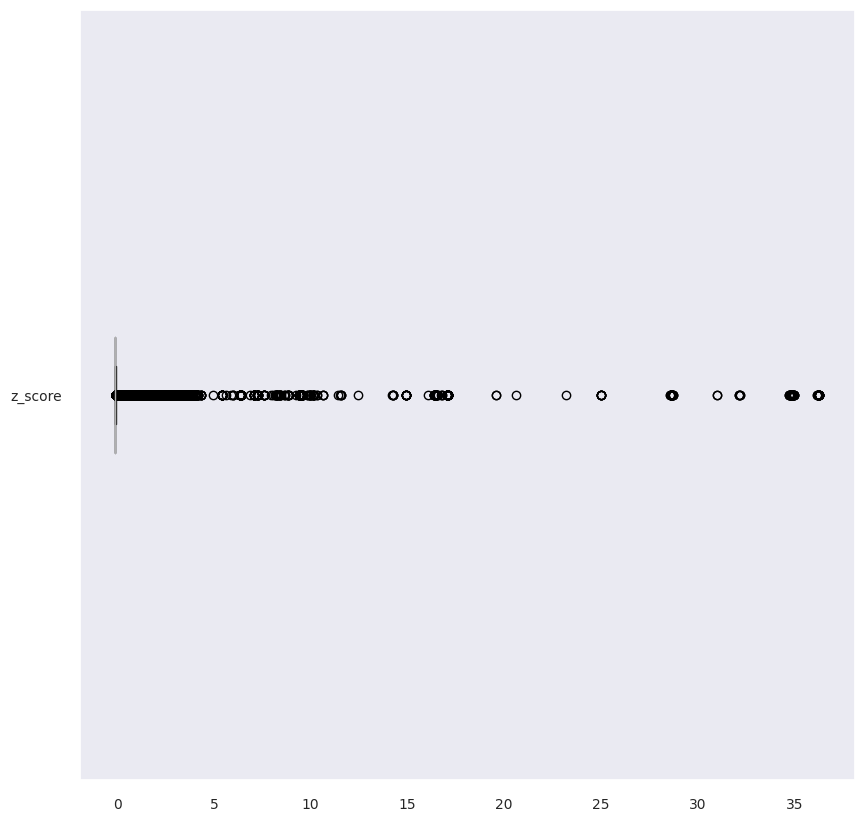

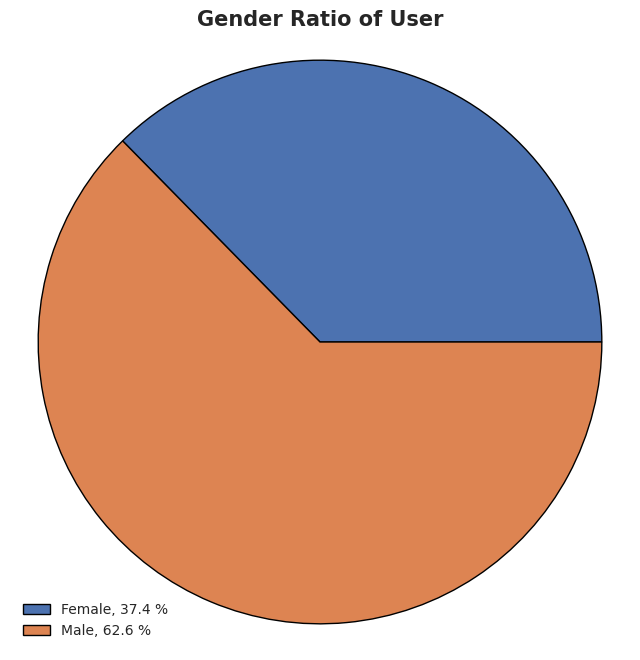

In [353]:
#lets groupby the previous dataframe to user_gender and make a gender ratio in form of pie chart
usergender = userdemo.groupby(['user_id','user_gender'],as_index=False).count()
gender = usergender.groupby(['user_gender']).count()
percents = gender['user_id'].to_numpy() * 100 / gender['user_id'].to_numpy().sum()
plt.figure(figsize=(8, 8))
plt.pie(gender['user_id'], frame=False,
        startangle=0, pctdistance=0.6,
        wedgeprops={"linewidth": 1, "edgecolor": "black", 'antialiased': True})
plt.title('Gender Ratio of User',fontweight="bold", fontsize = 15, loc="center")
plt.legend( loc='lower left',fontsize = 10,
           labels=['%s, %1.1f %%' % (l, s) for l, s in zip(gender['user_id'].index,percents)])
plt.axis('equal')
plt.show()

**Insight**
1.  The User in the dataset are mostly Male with 62.7% of it are Male and 37.3% are Female



### Number of User per-Age

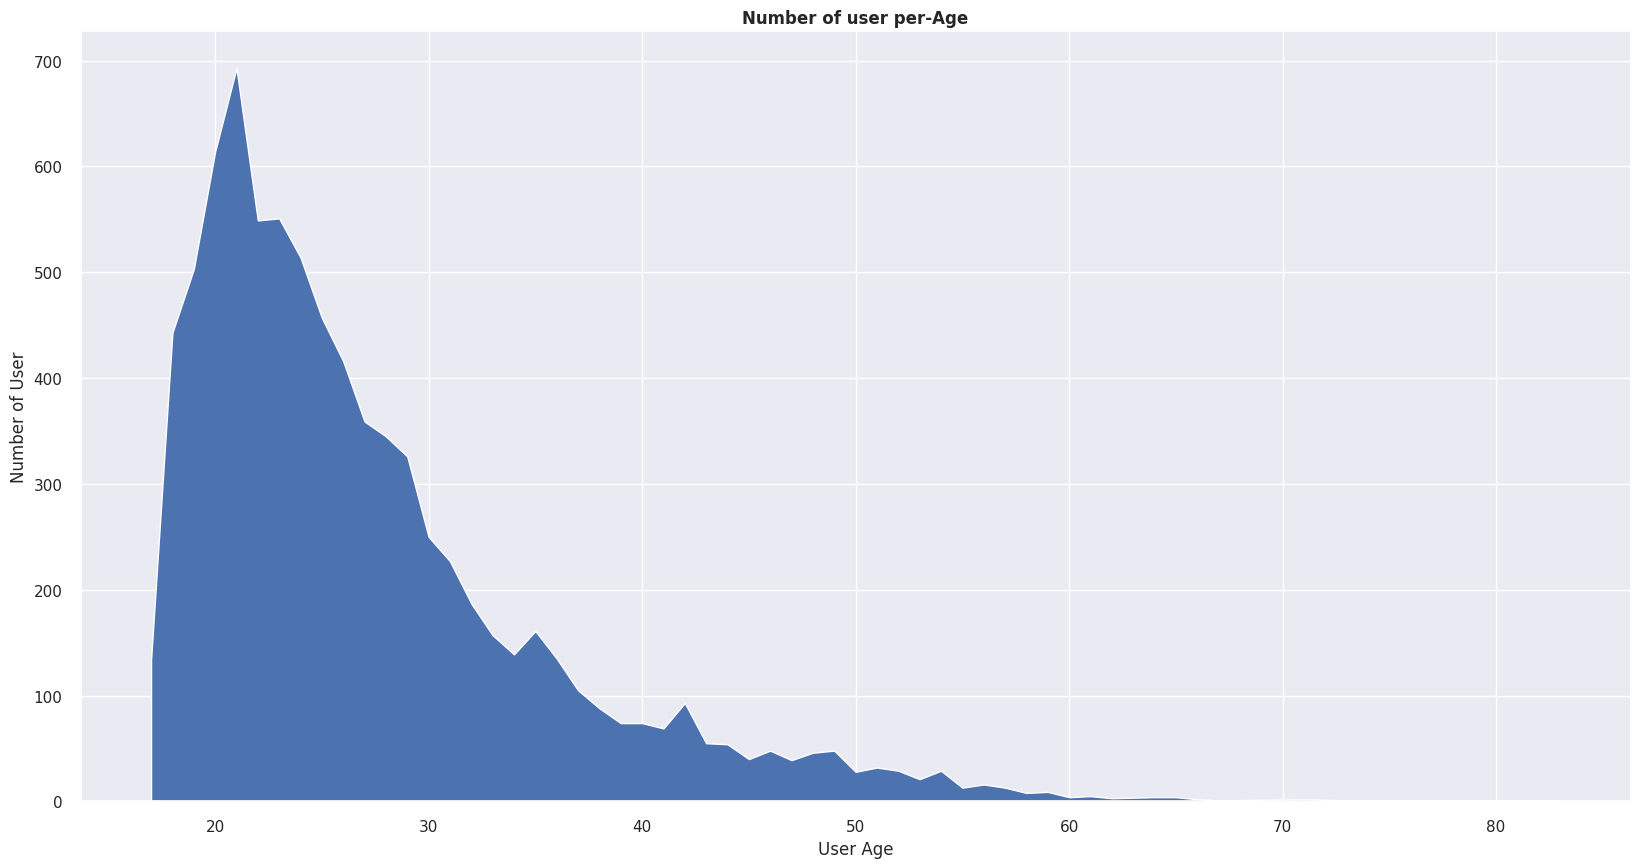

In [354]:
#lets groupby the previous dataframe to user_age and make an number of user per-age in form of stackplot chart
userage = userdemo.groupby(['user_id','user_age'], as_index=False).count()
age = userage.groupby(['user_age'], as_index=False).count()
plt.stackplot(age['user_age'], age['user_id'],
      )

plt.grid()
plt.xlabel("User Age")
plt.ylabel("Number of User")
plt.title("Number of user per-Age",fontweight="bold", fontsize = 12, loc="center")
plt.show()

**Insight**
1. The majority of the user in the dataset are 20 to 30 Years old
2. There is a big number of User that age under 20 too
3. From this dataset too we could conclude the majority of user in the dataset are Gen Z (age under 25) and followed by Gen Millenials (age 26 to 40), then there is some Gen X too (age over 41)




### Number of User Per User Occupation Bar Chart



In [355]:
#lets groupby the previous dataframe to user_occupation and make a occupation ratio in form of Bar chart
userocc = userdemo.groupby(['user_id','user_occupation'],as_index=False).count()
occa = userocc.groupby(['user_occupation'],as_index=False).count().sort_values(by=['user_id'],ascending=False)
occa.rename(columns={'user_id': 'number_of_user'}, inplace=True, errors='raise')

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1.3)

#create horizontal barplot
p = sns.barplot(x="number_of_user", y="user_occupation",  data=occa, ci=None)

#show values on barplot
show_values(p, "h", space=0.5)
p.set(title = 'Number of User Per-User Occupation')

/tmp/ipykernel_4397/1932010583.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="number_of_user", y="user_occupation",  data=occa, ci=None)


[Text(0.5, 1.0, 'Number of User Per-User Occupation')]

**Insight**
1. The majority of the user in the dataset are students with 54% of user are a student
2. The second majority of user work in private sector (or swasta) which takes 22.6% of user
3. The Third largest come work in unknown or other line which takes 11.2% of the user
3. There is also 3.8% entrepreneurs (or Pengusaha) that uses our platform
4. There is 0.7% of user that work as a teacher or guru
5. And also there is 0.3% of user that work as a soldier or TNI
6. There is no retiree or pensiunan user in this dataset

### Income Range Ratio per-user

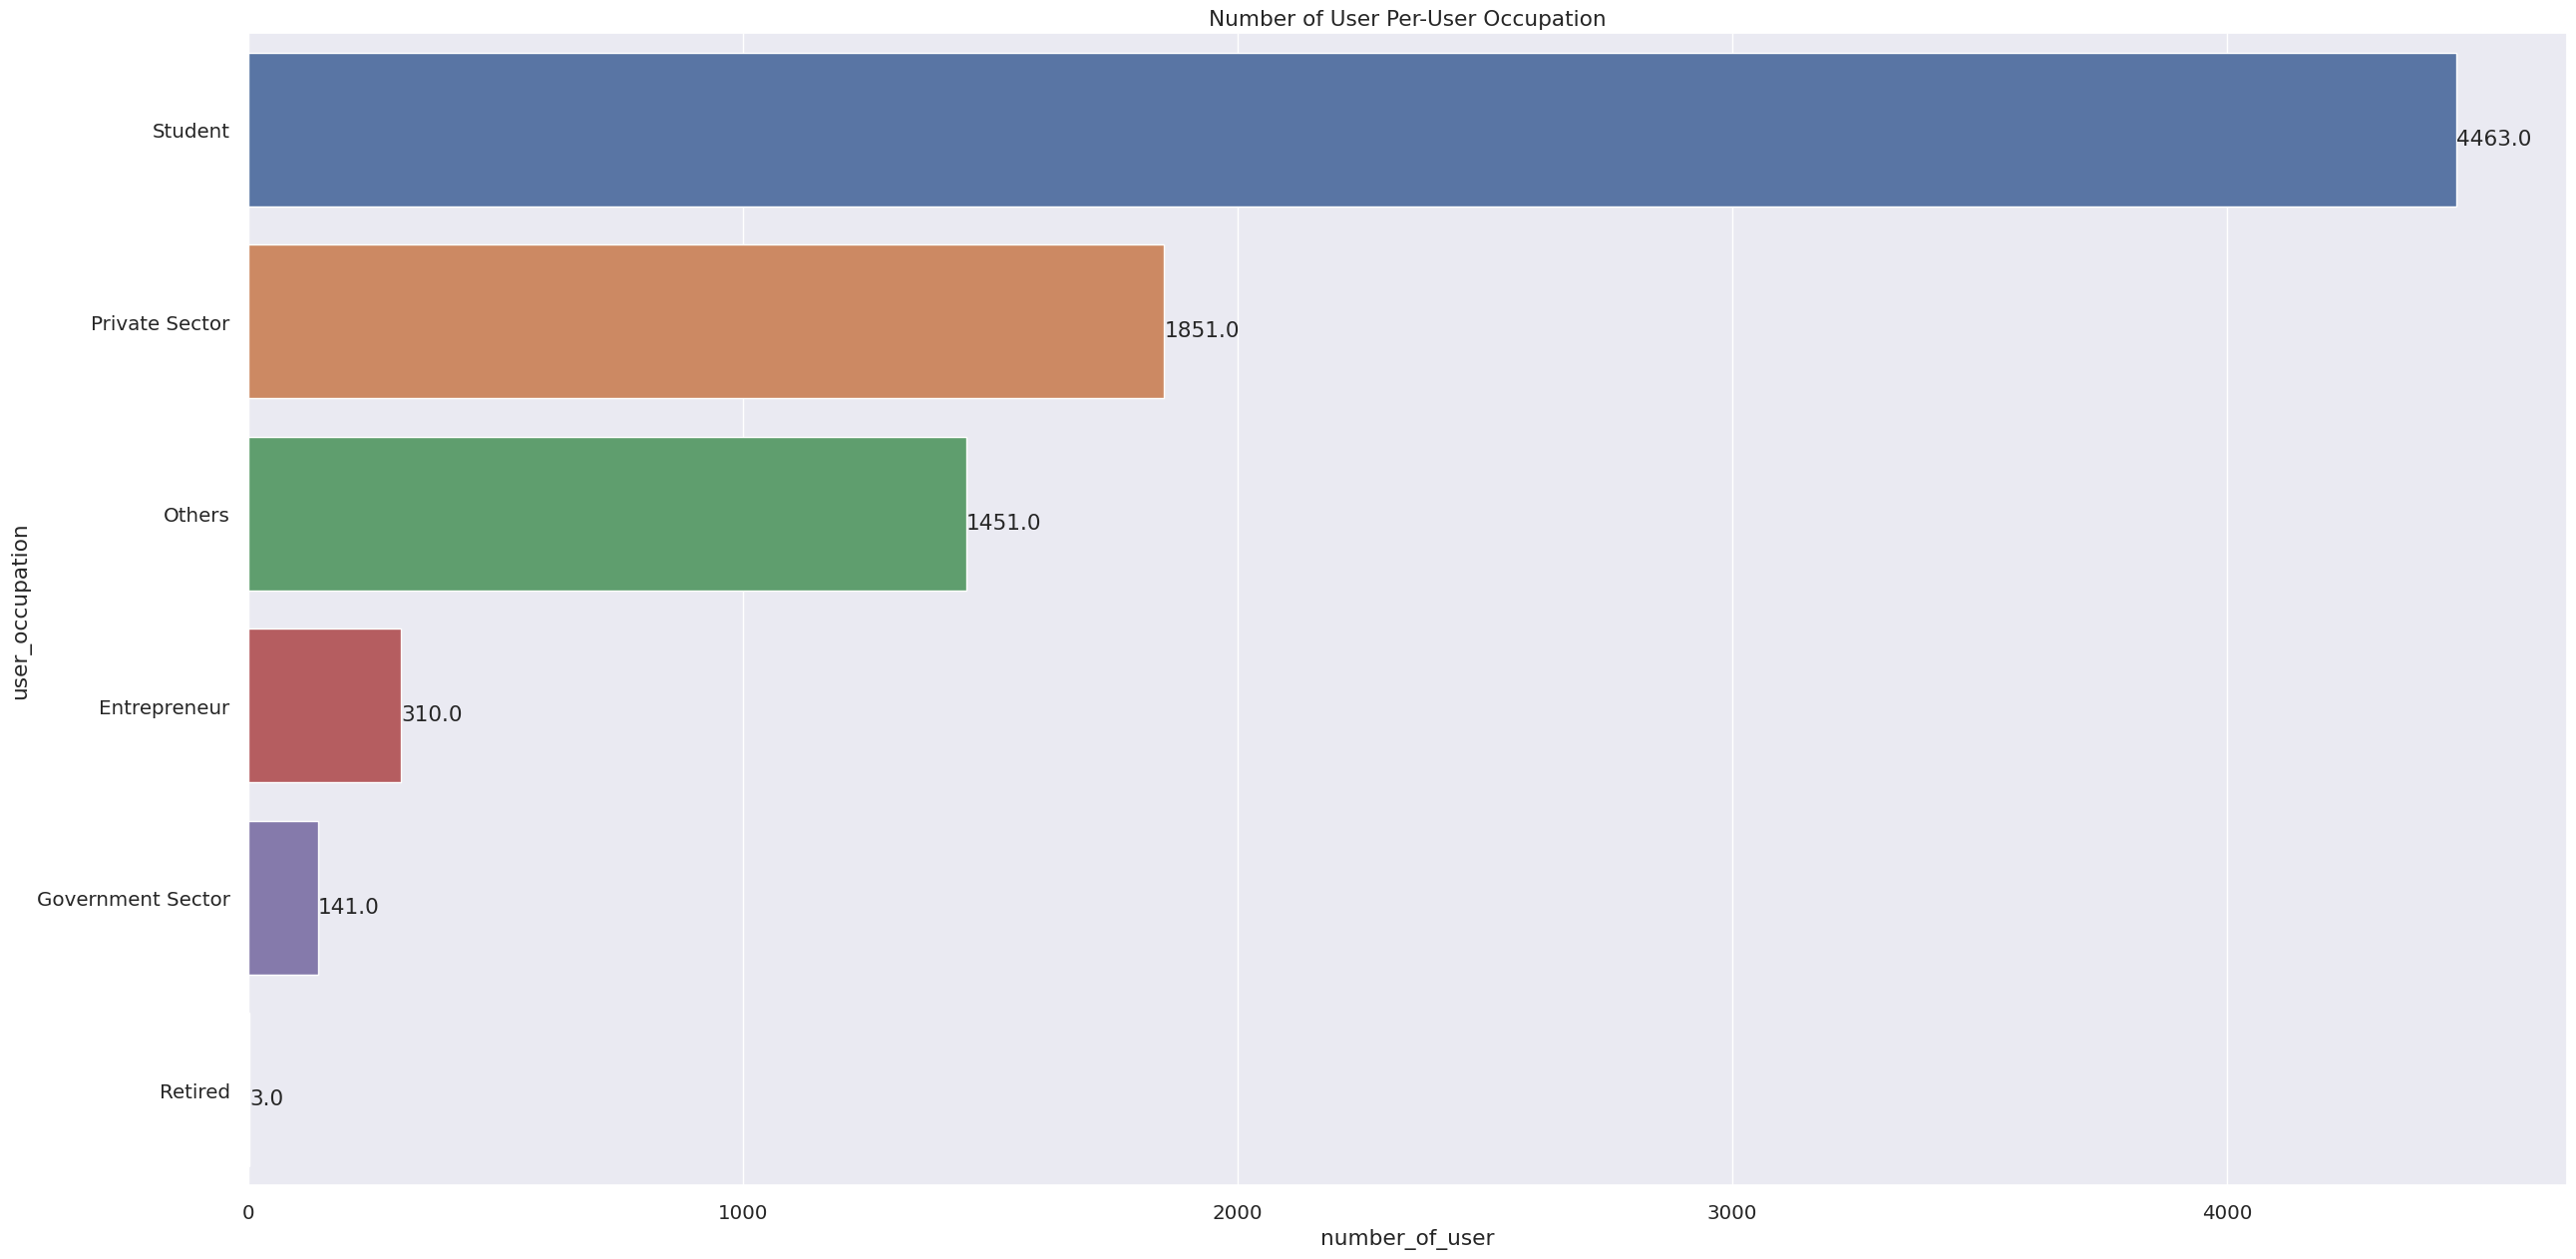

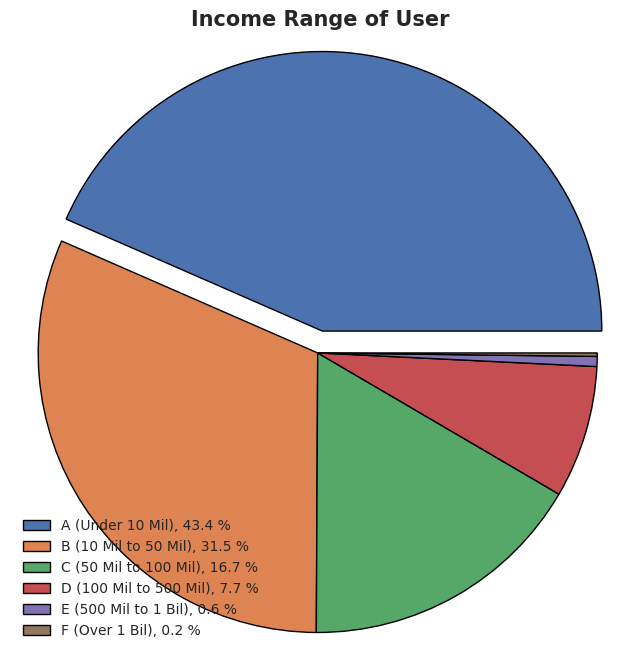

In [356]:
#lets groupby the previous dataframe to user_income_range and make a income range ratio in form of pie chart
inc = userdemo.groupby(['user_income_range']).count().sort_values(by=['user_id'],ascending=False)
percents = inc['user_id'].to_numpy() * 100 / inc['user_id'].to_numpy().sum()
plt.figure(figsize=(8, 8))
plt.pie(inc['user_id'],   frame=False,
        startangle=0, pctdistance=0.6,
        wedgeprops={"linewidth": 1, "edgecolor": "black", 'antialiased': True},
        explode=[0.08, 0, 0, 0, 0, 0])
plt.title('Income Range of User',fontweight="bold", fontsize = 15, loc="center")
plt.legend(loc='lower left',fontsize = 10,
           labels=['%s, %1.1f %%' % (l, s) for l, s in zip(inc['user_id'].index,percents)])
plt.axis('equal')
plt.show()

**Insight**
1. The majority or 43.4% of user have an income range < 10 mil IDR permonth.
2. Followed by 31.4% of user that have an income range 10 mil - 50 mil IDR permonth.
3. 16.7% of user also have an income range 50 mil - 100 mil IDR permonth.
4. 7.7% of user also have an income range 500 mil - 1 bil IDR permonth.
5. Only 0.2% user that have an income range over 1 bil IDR permonth.

/tmp/ipykernel_4397/2706290781.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="number_of_user", y="user_income_source",  data=incs, ci=None)


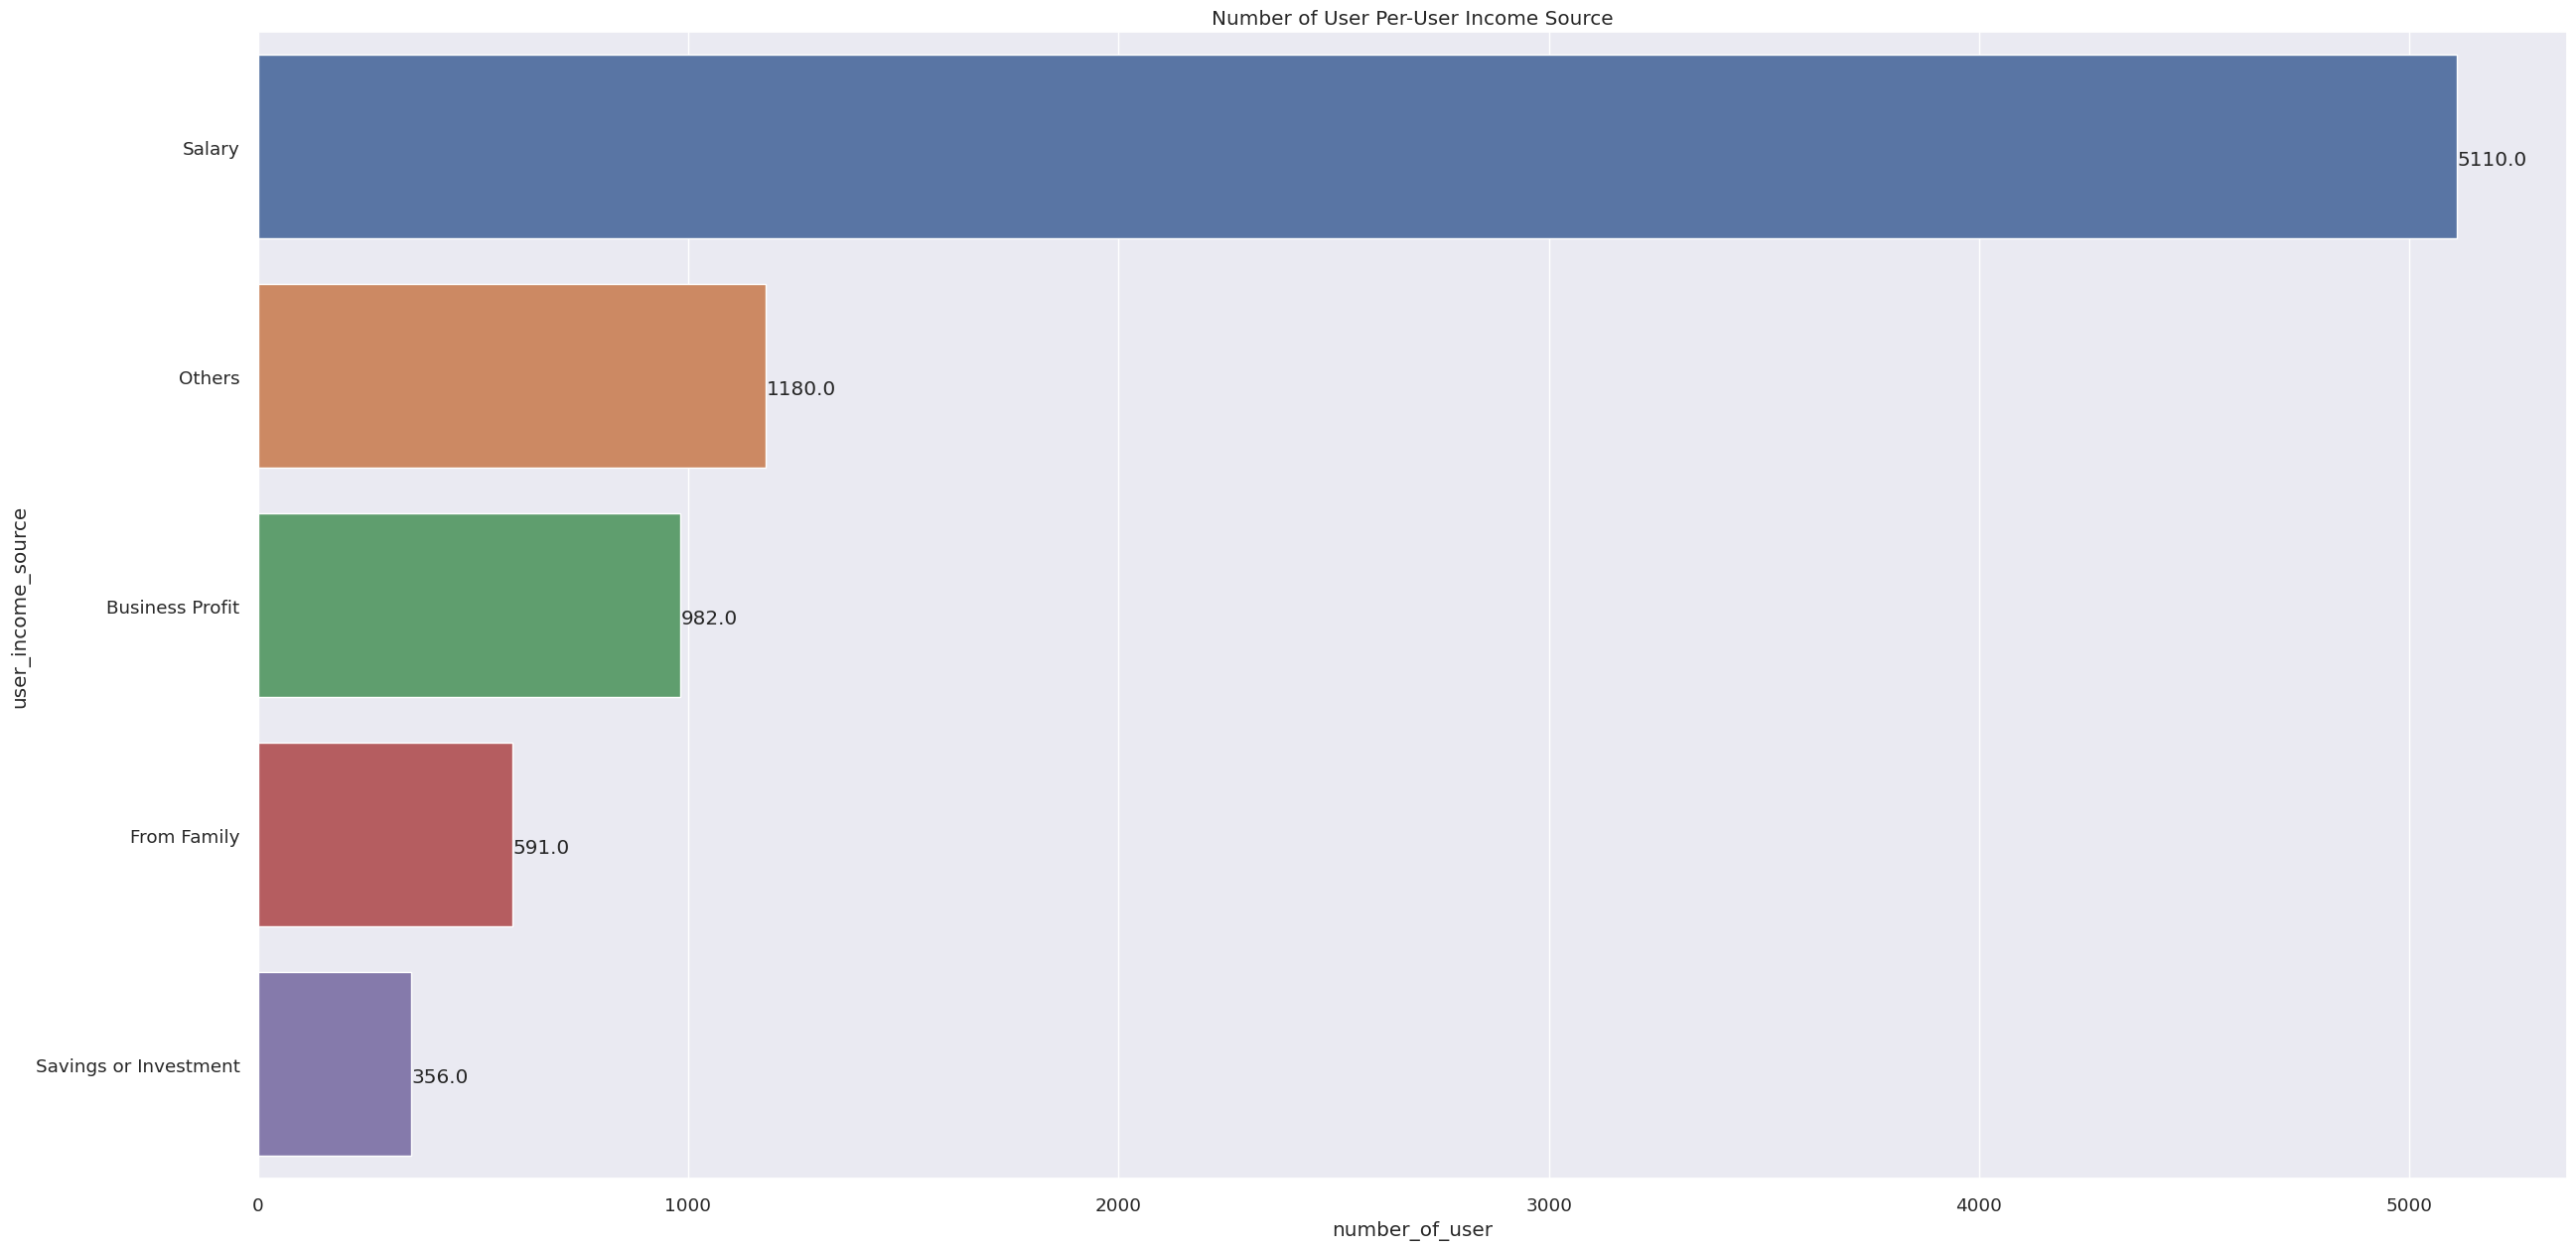

In [357]:
#lets groupby the previous dataframe to user_income_source and make a income source ratio in form of pie chart
userinc= userdemo.groupby(['user_id','user_income_source'],as_index=False).count().sort_values(by=['user_id'],ascending=False)
incs = userinc.groupby(['user_income_source'],as_index=False).count().sort_values(by=['user_id'],ascending=False)
incs.rename(columns={'user_id': 'number_of_user'}, inplace=True, errors='raise')

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.03)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1.2)

#create horizontal barplot
p = sns.barplot(x="number_of_user", y="user_income_source",  data=incs, ci=None)

#show values on barplot
show_values(p, "h", space=1)
p.set(title = 'Number of User Per-User Income Source')
plt.show()

**Insight**
1. The majority or 62.3% of user have an income source from his/her salary or gaji
2. Followed by 11.9% of user that have an income source from his/her business revenue or keuntungan bisnis
3. 11.2% of user also have an income source from Undian
4. 6.1% of user have an income from his/her parents or children or Dari Orang Tua/ Anak
5. 3.1% of user have an unkown income source
6. the rest of 1.1% of user have an income source from his/her significant other (suami/istri) , warisan, or bunga simpanan

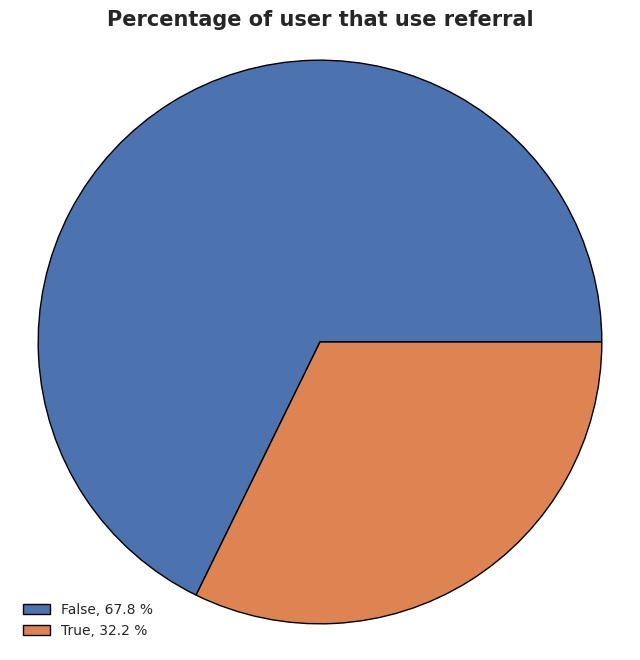

In [358]:
#lets groupby the previous dataframe to referral_code_used and make a referral source ratio in form of pie chart
rf = userdemo.groupby(['referral_code_used']).count().sort_values(by=['user_id'],ascending=False)
percents = rf['user_id'].to_numpy() * 100 / rf['user_id'].to_numpy().sum()
plt.figure(figsize=(8, 8))
plt.pie(rf['user_id'],   frame=False,
        startangle=0, pctdistance=0.6,
        wedgeprops={"linewidth": 1, "edgecolor": "black", 'antialiased': True})

plt.title('Percentage of user that use referral',fontweight="bold", fontsize = 15, loc="center")
plt.legend(loc='lower left',fontsize = 10,
           labels=['%s, %1.1f %%' % (l, s) for l, s in zip(rf['user_id'].index,percents)])
plt.axis('equal')
plt.show()

**Insight**
1. The majority or 67.8% of user dont use referral when registering his/her account
2. while only 32.3% of user use referral when registering his/her account

###Are there any difference in user that use referral?

In [359]:
#lets groupby the previous dataframe to referral_code_used and look if it has any differences betwen user that use referral
rfb = userdata_balance.groupby(['referral_code_used'],as_index=False).mean()
list_columns = rfb.columns.to_list()
drop_columns = list_columns[1:14]
rfb.drop(columns=drop_columns, axis = 1, inplace = True)
rfb

/tmp/ipykernel_4397/4293902981.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfb = userdata_balance.groupby(['referral_code_used'],as_index=False).mean()


referral_code_used  total_transaction  total_invested  total_AUM
0               False          345158.87      1307220.43 1304744.18
1                True          290384.28      1693797.49 1678443.81

####Difference in user that use referral barplot

/tmp/ipykernel_4397/1358809961.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="variable", hue='referral_code_used'  ,data=rfbm, ci=None)


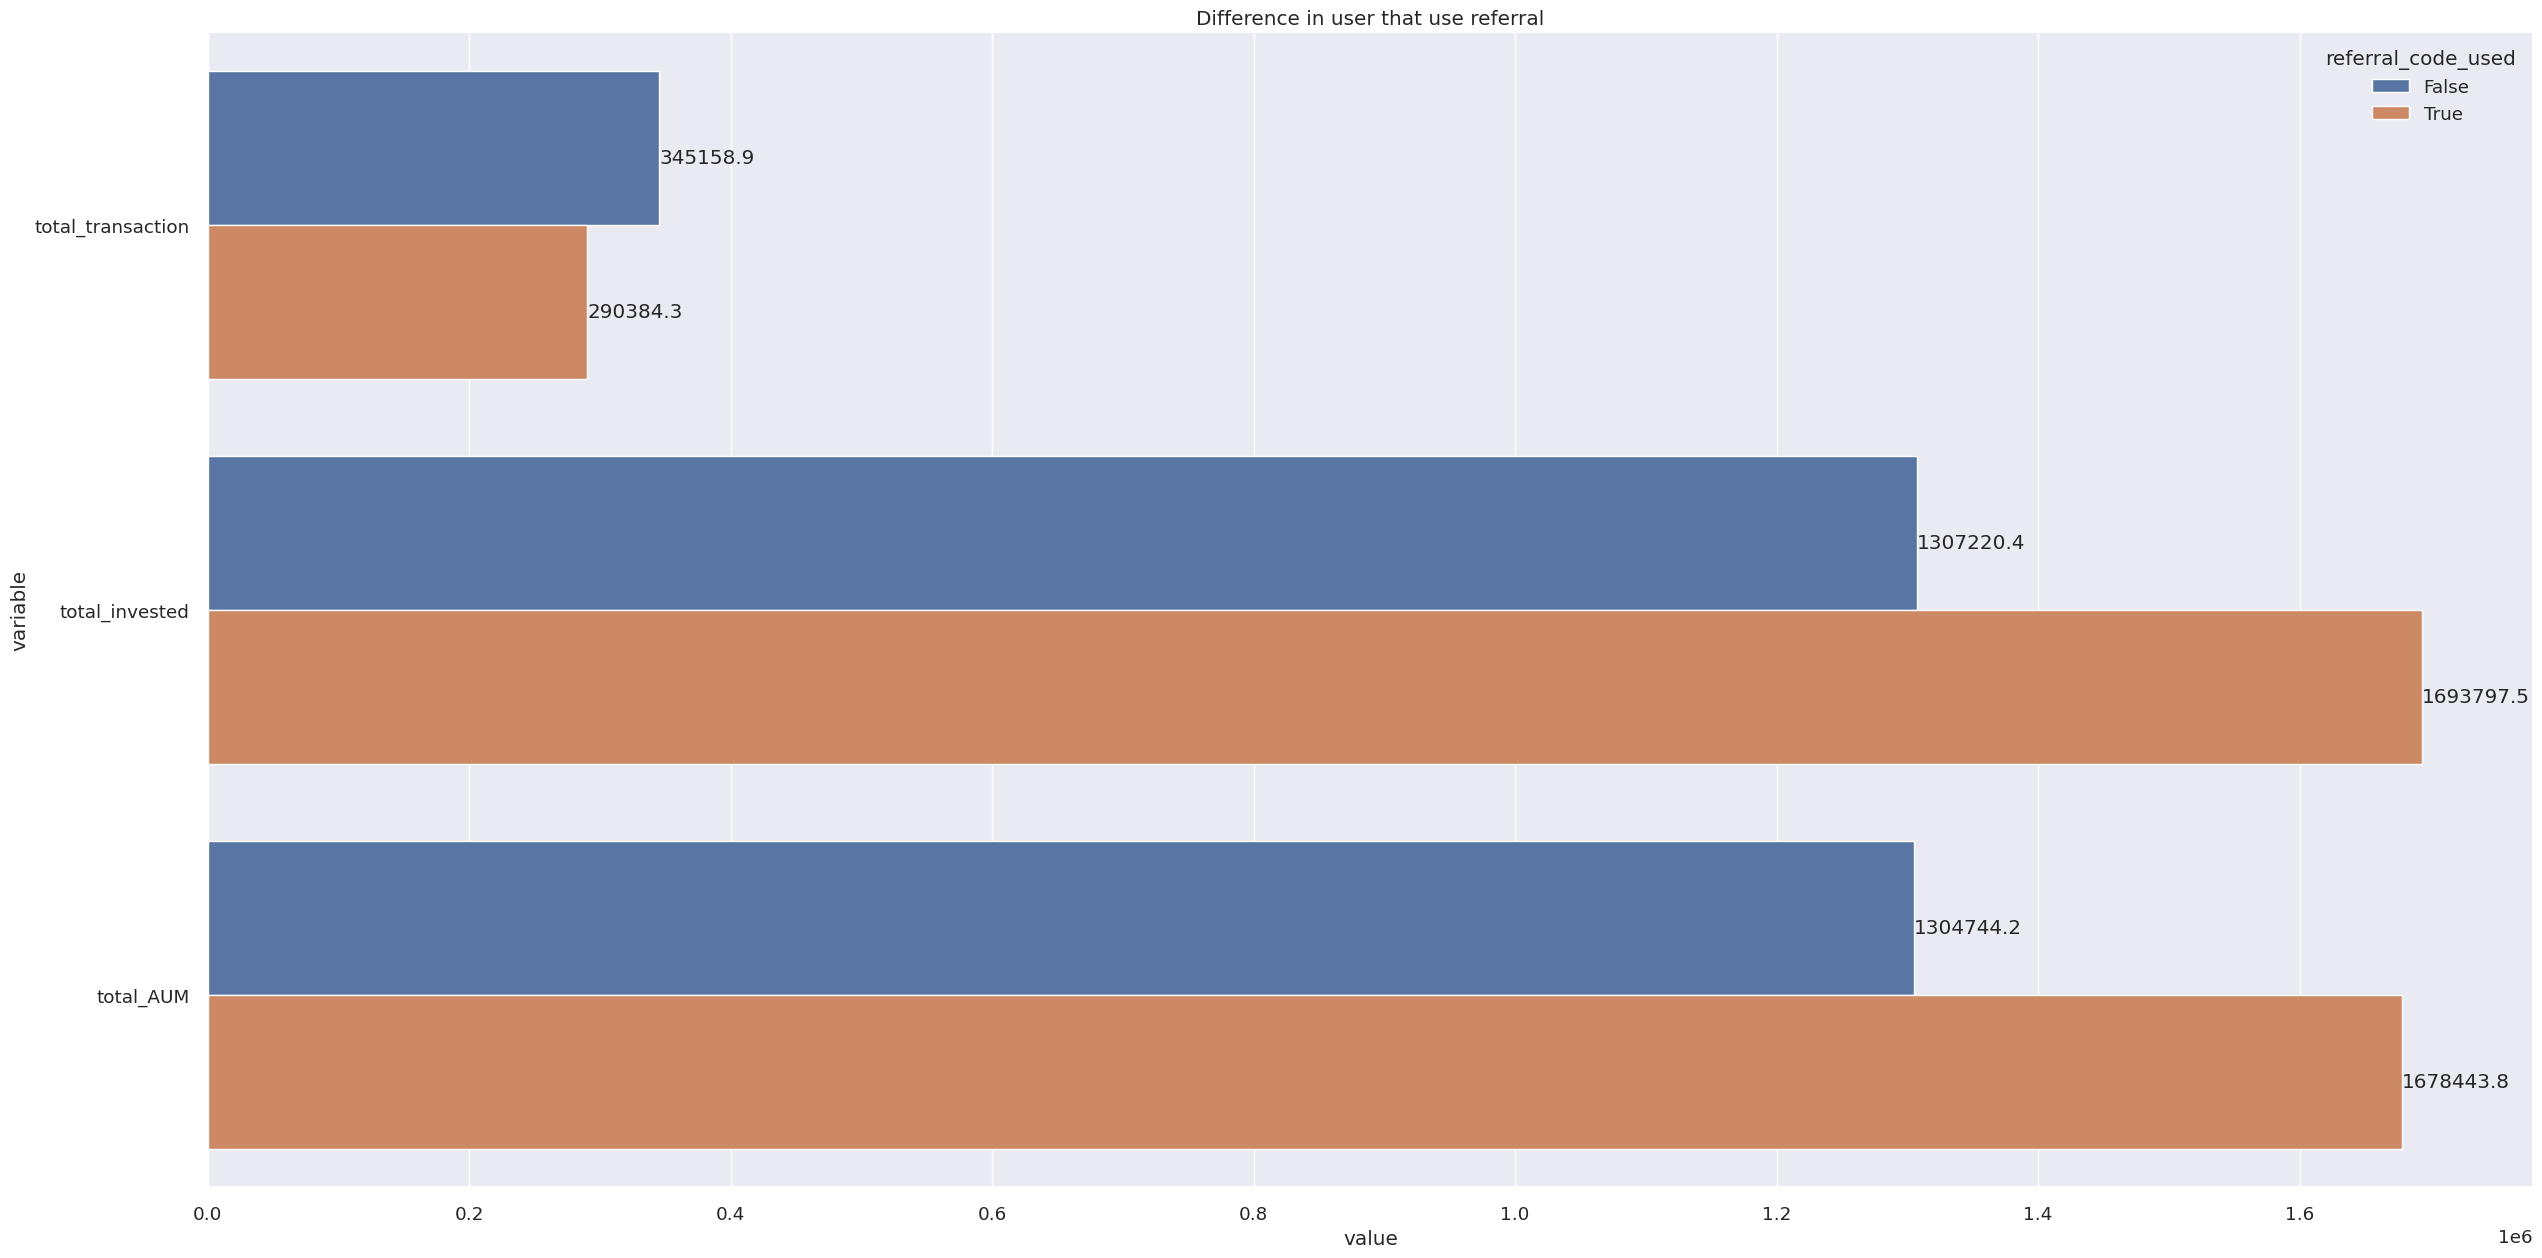

In [360]:
#lets manipulate the data with pd.melt so we could easily bar plot it
rfbm = rfb.melt(id_vars=['referral_code_used'], value_vars=['total_transaction', 'total_invested','total_AUM'])
rfbm

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.03)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1.2)

#create horizontal barplot
p = sns.barplot(x="value", y="variable", hue='referral_code_used'  ,data=rfbm, ci=None)

#show values on barplot
show_values(p, "h", space=1)
p.set(title = 'Difference in user that use referral')
plt.show()


**Insight**
1. The user that uses referral code when registering his or her account have more invested mutual funds than the user that dont, but they do less transaction this past 2 month than the user that dont.


##2. What are popular mutual funds product among various demography? and what are the risk profile among different demography based on mutual funds investment they have?

###Average Total AUM per-user

In [361]:
#lets look at the average AUM peruser by grouping it per-user first
AVGaumuser = userdata_balance.groupby(['user_id'],as_index=False).mean()

#lets drop some column that we dont use
list_columns = AVGaumuser.columns.to_list()
drop_columns = list_columns[1:16]
AVGaumuser.drop(columns=drop_columns, axis = 1, inplace = True)

#lets rename the column to avg_AUM
AVGaumuser.rename(columns={'total_AUM': 'avg_AUM'}, inplace=True, errors='raise')
#lets look at the calculated mean of average user AUM
AVGaumuser.mean()

/tmp/ipykernel_4397/656313657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AVGaumuser = userdata_balance.groupby(['user_id'],as_index=False).mean()


user_id                 inf
total_invested   1096318.99
avg_AUM          1094113.51
dtype: float64



###Average user AUM share of each type of mutual fund

In [362]:
#lets groupby the data on user_id and drop some column that we wont use
useraumshare = userdata_balance.groupby(['user_id'],as_index=False).sum()
list_columns = useraumshare.columns.to_list()
drop_columns = ['user_age',
 'Saham_invested_amount',
 'Saham_transaction_amount',
 'Pasar_Uang_invested_amount',
 'Pasar_Uang_transaction_amount',
 'Pendapatan_Tetap_invested_amount',
 'Pendapatan_Tetap_transaction_amount',
  'Campuran_invested_amount',
 'Campuran_transaction_amount',
 'total_transaction',
 'total_invested',]
useraumshare.drop(columns=drop_columns, axis = 1, inplace = True)

#lets calculate the percentage and then drop the column we dont use
useraumshare['Saham_aum%'] = (useraumshare['Saham_AUM']/useraumshare['total_AUM'])*100
useraumshare['PU_aum%'] = (useraumshare['Pasar_Uang_AUM']/useraumshare['total_AUM'])*100
useraumshare['PT_aum%'] = (useraumshare['Pendapatan_Tetap_AUM']/useraumshare['total_AUM'])*100
useraumshare['Camp_aum%'] = (useraumshare['Campuran_AUM']/useraumshare['total_AUM'])*100
list_columns = useraumshare.columns.to_list()
drop_columns = list_columns[1:6]
useraumshare.drop(columns=drop_columns, axis = 1, inplace = True)

#lets see the average percentage of AUM share
useraumshare.mean()

/tmp/ipykernel_4397/2318775182.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  useraumshare = userdata_balance.groupby(['user_id'],as_index=False).sum()


user_id              inf
total_AUM    21449641.67
Saham_aum%         31.79
PU_aum%            35.07
PT_aum%            31.22
Camp_aum%           1.93
dtype: float64

**Insight**

Average user have an mutual funds allocation of 31.75% of it in Saham, 35.06% of it in Pasar Uang, 31.27% of it in Pendapatan Tetap, and 1.91% of it in Campuran, which makes the average user in the dataset to have a **Moderate Risk Profile** which means average user *can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.*

source =  https://www.ltfs.com/companies/lnt-investment-management/articles/determining-risk-profile-of-an-investor.html

### Popular mutual funds product among Gender

In [363]:
#to look at this insight first, lets groupby the data on user_gender and drop some column that we wont use
gen = userdata_balance.groupby(['user_gender'],as_index=False).sum()
list_columns = gen.columns.to_list()
drop_columns = ['user_age','Saham_AUM',
'Saham_transaction_amount','Pasar_Uang_AUM',
 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount','Campuran_AUM',
 'Campuran_transaction_amount','total_transaction',
 'total_AUM']
gen.drop(columns=drop_columns, axis = 1, inplace = True)

#lets calculate the percetage of invested amount permutual funds and add as a new column
gen['Saham_inv%'] = (gen['Saham_invested_amount']/gen['total_invested'])*100
gen['PU_inv%'] = (gen['Pasar_Uang_invested_amount']/gen['total_invested'])*100
gen['PT_inv%'] = (gen['Pendapatan_Tetap_invested_amount']/gen['total_invested'])*100
gen['Camp_inv%'] = (gen['Campuran_invested_amount']/gen['total_invested'])*100

#and drop some column that we wont use so the dataframe look cleaner
list_columns = gen.columns.to_list()
drop_columns = list_columns[1:6]
gen.drop(columns=drop_columns, axis = 1, inplace = True)
gen

/tmp/ipykernel_4397/3377171608.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen = userdata_balance.groupby(['user_gender'],as_index=False).sum()


user_gender  total_invested  Saham_inv%  PU_inv%  PT_inv%  Camp_inv%
0      Female  82698038634.00       17.49    33.88    30.91      17.72
1        Male  94103257895.00       26.15    23.47    37.15      13.22

#### Popular mutual funds product among Gender **Barplot**

/tmp/ipykernel_4397/2730804453.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_gender",  hue='variable', data=genM, ci=None)


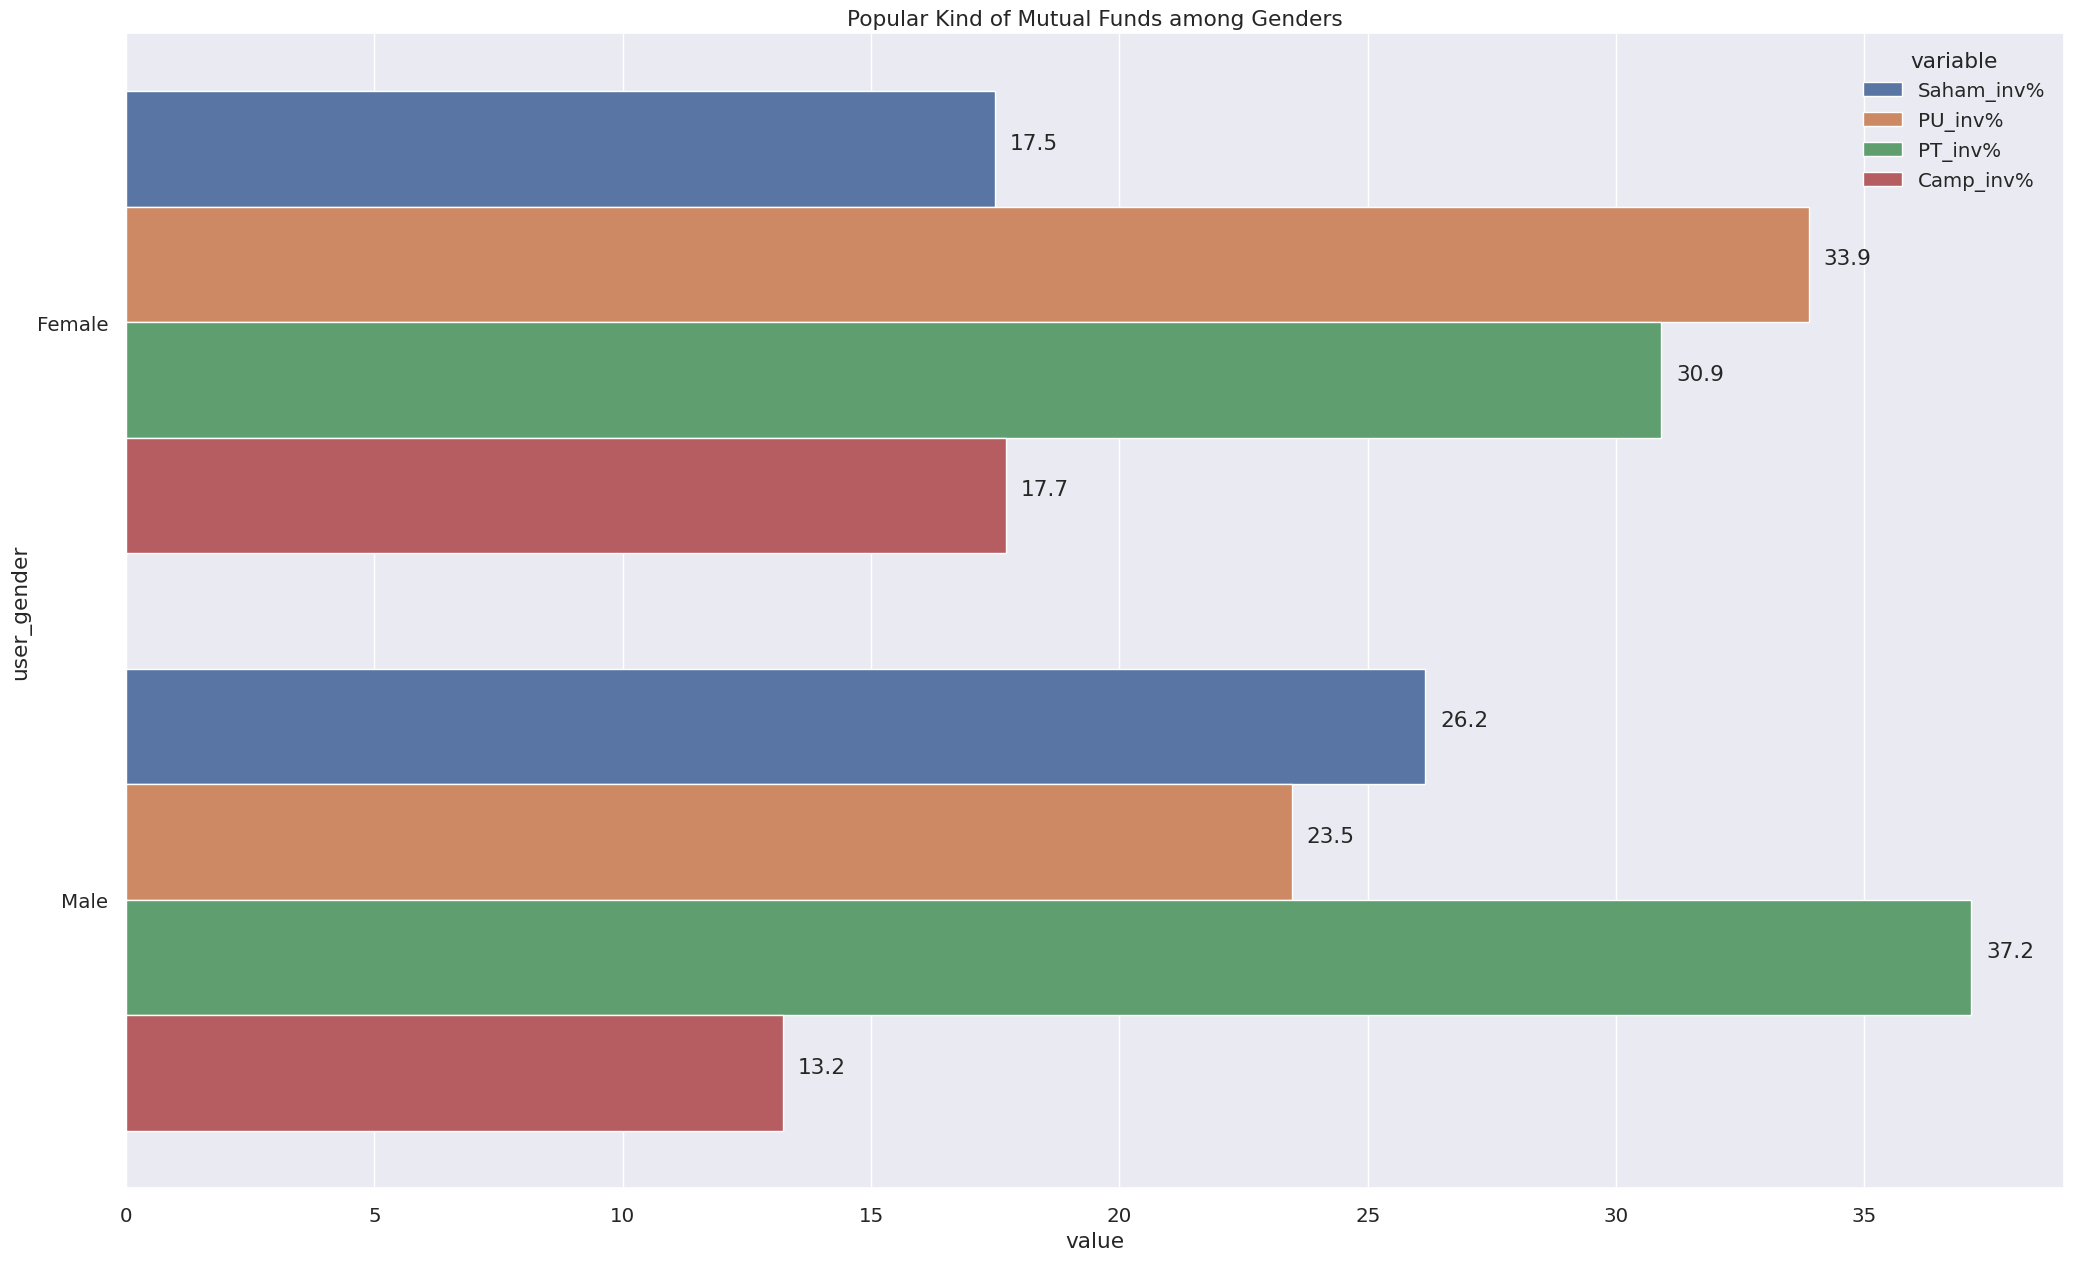

In [364]:
#lets manipulate the data first so we could easily make the bar chart
genM = gen.melt(id_vars=['user_gender'], value_vars=['Saham_inv%', 'PU_inv%','PT_inv%','Camp_inv%'])

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(25,15)})
sns.set(font_scale=1.3)

#create horizontal barplot
p = sns.barplot(x="value", y="user_gender",  hue='variable', data=genM, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Popular Kind of Mutual Funds among Genders')
plt.show()

**Insight**
1.   Female have an mutual funds allocation of 17.46% of it in Saham, 33.20% of it in Pasar Uang, 34.73% of it in Pendapatan Tetap, and 14.91% of it in Campuran, which makes the Male in the dataset to have a **Moderately Conservative	Risk Profile** which means average user *is willing to accept small level of risk in exchange for some potential returns over the medium to long term.*

2.   Male have an mutual funds allocation of 24.35% of it in Saham, 23.64% of it in Pasar Uang, 38.99% of it in Pendapatan Tetap, and 13.03% of it in Campuran, which makes the Male in the dataset to have a **Moderately Aggressive	Risk Profile** which means average user *is keen to accept high risk in order to maximize potential returns over the medium to long term.*



source =  https://www.ltfs.com/companies/lnt-investment-management/articles/determining-risk-profile-of-an-investor.html

### Popular mutual funds product among occupation

In [365]:
#to look at this insight first, lets groupby the data on user_occupation  and drop some column that we wont use
occr = userdata_balance.groupby(['user_occupation'],as_index=False).sum().sort_values(by=['user_occupation'],ascending=True)
list_columns = occr.columns.to_list()

drop_columns = ['user_age','Saham_AUM',
'Saham_transaction_amount','Pasar_Uang_AUM',
 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount','Campuran_AUM',
 'Campuran_transaction_amount','total_transaction',
 'total_AUM']
occr.drop(columns=drop_columns, axis = 1, inplace = True)

#lets calculate the percetage of invested amount permutual funds and add as a new column
occr['Saham_inv%'] = (occr['Saham_invested_amount']/occr['total_invested'])*100
occr['PU_inv%'] = (occr['Pasar_Uang_invested_amount']/occr['total_invested'])*100
occr['PT_inv%'] = (occr['Pendapatan_Tetap_invested_amount']/occr['total_invested'])*100
occr['Camp_inv%'] = (occr['Campuran_invested_amount']/occr['total_invested'])*100

#and drop some column that we wont use so the dataframe look cleaner
list_columns = occr.columns.to_list()
drop_columns = list_columns[1:6]
occr.drop(columns=drop_columns, axis = 1, inplace = True)
occr

/tmp/ipykernel_4397/1873504280.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occr = userdata_balance.groupby(['user_occupation'],as_index=False).sum().sort_values(by=['user_occupation'],ascending=True)


user_occupation  total_invested  Saham_inv%  PU_inv%  PT_inv%  Camp_inv%
0       Entrepreneur  11053901793.00       29.18    14.63    36.36      19.84
1  Government Sector   7072071301.00       27.62    35.65    35.29       1.44
2             Others  28643073061.00       19.39    32.45    34.12      14.05
3     Private Sector  54756098672.00       24.42    25.92    35.06      14.61
4            Retired    252000000.00       80.24     6.48    13.29       0.00
5            Student  75024151702.00       19.69    29.95    33.34      17.03

#### Popular mutual funds product among Occupation Barplot

In [366]:
#lets manipulate the data first so we could plot it
occrm = occr.melt(id_vars=['user_occupation'], value_vars=['Saham_inv%', 'PU_inv%','PT_inv%','Camp_inv%'])
occrm

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.3)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(50,25)})
sns.set(font_scale=1.3)

#create horizontal barplot
p = sns.barplot(x="value", y="user_occupation",  hue='variable', data=occrm, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Popular Kind of Mutual Funds among various occupations')

/tmp/ipykernel_4397/3082438372.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_occupation",  hue='variable', data=occrm, ci=None)


[Text(0.5, 1.0, 'Popular Kind of Mutual Funds among various occupations')]

**Insight**
1. The user who works as a teacher (or guru) have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

2. The user who works as a IRT have a risk profile of Moderately Conservative	 in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

3. The other user who we dont know his/or her occupation have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

4. The user who works as a PNS have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

5. The user who are a Student have a risk profile of Moderately Conservative	 in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

6. The user who are a Pengusaha have a risk profile of Moderately Aggressive	 in which the Investor is keen to accept high risk in order to maximize potential returns over the medium to long term

7. The user who are a Pensiunan have a risk profile of Moderately Aggressive	 in which the Investor is keen to accept high risk in order to maximize potential returns over the medium to long term

8. The user who works at swasta or private sector have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

9. The user who works as TNI/ or Police have a risk profile of Moderately Aggressive in which the Investor is keen to accept high risk in order to maximize potential returns over the medium to long term.




source =  https://www.ltfs.com/companies/lnt-investment-management/articles/determining-risk-profile-of-an-investor.html

###Popular mutual funds among various income range

In [367]:
#to look at this insight first, lets groupby the data on user_income_range  and drop some column that we wont use
incm = userdata_balance.groupby(['user_income_range'],as_index=False).sum().sort_values(by=['user_income_range'],ascending=True)
list_columns = incm.columns.to_list()
drop_columns = ['user_age','Saham_AUM',
'Saham_transaction_amount','Pasar_Uang_AUM',
 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount','Campuran_AUM',
 'Campuran_transaction_amount','total_transaction',
 'total_AUM']
incm.drop(columns=drop_columns, axis = 1, inplace = True)

#lets calculate the percetage of invested amount permutual funds and add as a new column
incm['Saham_inv%'] = (incm['Saham_invested_amount']/incm['total_invested'])*100
incm['PU_inv%'] = (incm['Pasar_Uang_invested_amount']/incm['total_invested'])*100
incm['PT_inv%'] = (incm['Pendapatan_Tetap_invested_amount']/incm['total_invested'])*100
incm['Camp_inv%'] = (incm['Campuran_invested_amount']/incm['total_invested'])*100

#and drop some column that we wont use so the dataframe look cleaner
list_columns = incm.columns.to_list()
drop_columns = list_columns[1:6]
incm.drop(columns=drop_columns, axis = 1, inplace = True)
incm

/tmp/ipykernel_4397/3241832120.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  incm = userdata_balance.groupby(['user_income_range'],as_index=False).sum().sort_values(by=['user_income_range'],ascending=True)


user_income_range  total_invested  Saham_inv%  PU_inv%  PT_inv%  \
0        A (Under 10 Mil)  32645499994.00       18.55    40.13    29.76   
1    B (10 Mil to 50 Mil)  46592990407.00       18.92    28.20    41.50   
2   C (50 Mil to 100 Mil)  48875343563.00       23.81    27.79    29.95   
3  D (100 Mil to 500 Mil)  42201194483.00       23.53    21.56    35.40   
4    E (500 Mil to 1 Bil)   4147238082.00       42.87    15.65    29.96   
5          F (Over 1 Bil)   2339030000.00       36.71    23.05    28.31   

   Camp_inv%  
0      11.57  
1      11.38  
2      18.45  
3      19.52  
4      11.52  
5      11.93

#### Popular mutual funds product among Income Range Barplot

In [368]:
#lets manipulate the data first so we could plot it
incmm = incm.melt(id_vars=['user_income_range'], value_vars=['Saham_inv%', 'PU_inv%','PT_inv%','Camp_inv%'])
incmm

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(40,25)})
sns.set(font_scale=1.5)

#create horizontal barplot
p = sns.barplot(x="value", y="user_income_range",  hue='variable', data=incmm, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Popular Kind of Mutual Funds among various Income Range')

/tmp/ipykernel_4397/611143917.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_income_range",  hue='variable', data=incmm, ci=None)


[Text(0.5, 1.0, 'Popular Kind of Mutual Funds among various Income Range')]

**Insight**
1. The user who have income < 10 Juta	have a risk profile of Moderately Conservative in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

2. The user who have income Rp 10 Juta - 50 Juta have a risk profile of Moderately Conservative in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

3. The user who have income > Rp 50 Juta - 100 Juta have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

4. The user who have income > Rp 100 Juta - 500 Juta have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

5. The user who have income > Rp 500 Juta - 1 Miliar have a risk profile of Moderately Aggressive in which the Investor is keen to accept high risk in order to maximize potential returns over the medium to long term.

6. The user who have income > Rp 1 Miliar	have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

source =  https://www.ltfs.com/companies/lnt-investment-management/articles/determining-risk-profile-of-an-investor.html

###Popular mutual funds among various income source

In [369]:
#to look at this insight first, lets groupby the data on user_income_source  and drop some column that we wont use
src = userdata_balance.groupby(['user_income_source'],as_index=False).sum().sort_values(by=['user_income_source'],ascending=True)
list_columns = src.columns.to_list()
drop_columns = ['user_age','Saham_AUM',
'Saham_transaction_amount','Pasar_Uang_AUM',
 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount','Campuran_AUM',
 'Campuran_transaction_amount','total_transaction',
 'total_AUM']
src.drop(columns=drop_columns, axis = 1, inplace = True)

#lets calculate the percetage of invested amount permutual funds and add as a new column
src['Saham_inv%'] = (src['Saham_invested_amount']/src['total_invested'])*100
src['PU_inv%'] = (src['Pasar_Uang_invested_amount']/src['total_invested'])*100
src['PT_inv%'] = (src['Pendapatan_Tetap_invested_amount']/src['total_invested'])*100
src['Camp_inv%'] = (src['Campuran_invested_amount']/src['total_invested'])*100

#and drop some column that we wont use so the dataframe look cleaner
list_columns = src.columns.to_list()
drop_columns = list_columns[1:6]
src.drop(columns=drop_columns, axis = 1, inplace = True)
src

/tmp/ipykernel_4397/2231983041.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  src = userdata_balance.groupby(['user_income_source'],as_index=False).sum().sort_values(by=['user_income_source'],ascending=True)


user_income_source  total_invested  Saham_inv%  PU_inv%  PT_inv%  \
0        Business Profit  19179298731.00       15.23    18.78    27.81   
1            From Family  10558469440.00       28.57    19.66    43.19   
2                 Others  14195849948.00       18.15    37.44    20.97   
3                 Salary 126844107926.00       23.26    29.39    35.33   
4  Savings or Investment   6023570484.00       17.60    30.56    47.11   

   Camp_inv%  
0      38.18  
1       8.57  
2      23.43  
3      12.02  
4       4.73

#### Popular mutual funds product among Income Source Barplot

In [370]:
#lets manipulate the data first so we could plot it
srcm = src.melt(id_vars=['user_income_source'], value_vars=['Saham_inv%', 'PU_inv%','PT_inv%','Camp_inv%'])
srcm

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.3)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(50,25)})
sns.set(font_scale=1.5)

#create horizontal barplot
p = sns.barplot(x="value", y="user_income_source",  hue='variable', data=srcm, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Popular Kind of Mutual Funds among various Income Source')

/tmp/ipykernel_4397/932925659.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_income_source",  hue='variable', data=srcm, ci=None)


[Text(0.5, 1.0, 'Popular Kind of Mutual Funds among various Income Source')]

**Insight**
1. The user whose income come from bunga simpanan	have a risk profile of Moderately Conservative in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

2. The user whose income come from Dari Orang Tua / Anak have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

3. The user whose income come from Dari Suami / istri have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

4. The user whose income come from Gaji have a risk profile of Moderately Conservative in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

5. The user whose income come from Hasil Investasi have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term

6. The user whose income come from Keuntungan Bisnis have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term.

7. The user whose income come from Lainnya have a risk profile of Moderately Conservative in which the Investor is willing to accept small level of risk in exchange for some potential returns over the medium to long term.

8. The user whose income come from Tabungan have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term

9. The user whose income come from Undian have a risk profile of Moderate in which the Investor can tolerate moderate level of risk in exchange for relatively higher potential returns over the medium to long term

10. The user The user whose income come from Warisan have a risk profile of Moderately Aggressive in which the Investor is keen to accept high risk in order to maximize potential returns over the medium to long term.






source =  https://www.ltfs.com/companies/lnt-investment-management/articles/determining-risk-profile-of-an-investor.html

##3. What is the end-of-period condition of the user in this past 2 month?

###EOP Data Manipulation

####EOP of August

In [371]:
#lets filter the data so it only show the data from August 2021
date_aug = userdata_balance[(userdata_balance['date'] <= '2021-08-31')]
date_aug

user_id registration_import_datetime user_gender  user_age  \
0         50701          2021-08-24 23:57:43      Female        28   
1         50701          2021-08-24 23:57:43      Female        28   
24        50961          2021-08-20 16:22:29      Female        33   
47        53759          2021-08-19 14:18:30        Male        29   
48        53759          2021-08-19 14:18:30        Male        29   
...         ...                          ...         ...       ...   
114316  3913848          2021-08-27 10:50:57      Female        27   
114339  3913945          2021-08-27 11:19:32        Male        51   
114362  3914022          2021-08-27 11:19:31        Male        17   
114473  3914307          2021-08-27 11:53:32      Female        21   
114518  3914493          2021-08-27 12:47:06        Male        23   

       user_occupation       user_income_range  referral_code_used  \
0               Others    B (10 Mil to 50 Mil)               False   
1               Others    B (10 Mil to 50 Mil)               False   
24      Private Sector  D (100 Mil to 500 Mil)               False   
47      Private Sector        A (Under 10 Mil)               False   
48      Private Sector        A (Under 10 Mil)               False   
...                ...                     ...                 ...   
114316         Student    B (10 Mil to 50 Mil)               False   
114339          Others          F (Over 1 Bil)               False   
114362         Student        A (Under 10 Mil)               False   
114473         Student    B (10 Mil to 50 Mil)                True   
114518          Others    B (10 Mil to 50 Mil)               False   

       user_income_source       date  Saham_AUM  ...  \
0                  Salary 2021-08-30        NaN  ...   
1                  Salary 2021-08-31        NaN  ...   
24                 Salary 2021-08-31  716057.00  ...   
47                 Salary 2021-08-24   70038.00  ...   
48                 Salary 2021-08-25   70232.00  ...   
...                   ...        ...        ...  ...   
114316             Salary 2021-08-31        NaN  ...   
114339    Business Profit 2021-08-31   40918.00  ...   
114362             Others 2021-08-31   81835.00  ...   
114473    Business Profit 2021-08-31        NaN  ...   
114518             Salary 2021-08-31        NaN  ...   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
24                                NaN             200117.00   
47                                NaN              20028.00   
48                                NaN              20053.00   
...                               ...                   ...   
114316                            NaN                   NaN   
114339                            NaN              50029.00   
114362                            NaN              50029.00   
114473                            NaN                   NaN   
114518                            NaN              70084.00   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
24                             200000.00                                  NaN   
47                              20000.00                                  NaN   
48                              20000.00                                  NaN   
...                                  ...                                  ...   
114316                               NaN                                  NaN   
114339                          50000.00                                  NaN   
114362                          50000.00                                  NaN   
114473                               NaN                                  NaN   
11451

In [372]:
#with this code, lets look at the EOP on each of the user data in august (last data of each user ends on different date each period so we use this method)
date_aug_end = date_aug[date_aug.groupby('user_id').date.transform('max') == date_aug.date]
date_aug_end[date_aug_end['total_transaction'] < 0]

user_id registration_import_datetime user_gender  user_age  \
4812     975052          2021-08-01 06:28:48        Male        37   
7773    1484948          2021-08-19 17:49:56        Male        20   
19024   3075426          2021-08-05 14:33:39        Male        25   
24656   3599607          2021-08-24 05:16:27        Male        21   
29528   3732132          2021-08-01 02:38:40        Male        42   
30243   3733397          2021-08-01 17:42:06        Male        22   
32586   3736200          2021-08-14 11:38:07        Male        19   
35807   3741533          2021-08-03 19:44:42        Male        24   
35888   3741874          2021-08-02 18:17:42      Female        29   
42130   3751189          2021-08-04 10:21:26      Female        21   
47471   3759265          2021-08-05 15:06:56        Male        21   
53138   3773547          2021-08-06 12:13:05      Female        21   
53427   3774001          2021-08-06 13:22:28      Female        22   
56804   3782780          2021-08-07 08:38:03        Male        21   
59372   3786878          2021-08-07 18:16:11      Female        24   
59756   3787292          2021-08-07 19:11:46      Female        23   
62464   3793468          2021-08-08 16:16:45        Male        19   
64185   3796343          2021-08-09 00:25:17        Male        22   
64565   3797358          2021-08-09 07:40:08      Female        36   
64696   3797546          2021-08-09 08:19:53      Female        30   
64839   3797840          2021-08-09 09:25:45      Female        23   
65688   3799432          2021-08-09 13:42:23        Male        20   
67722   3802492          2021-08-09 22:53:03        Male        21   
69868   3806803          2021-08-10 17:34:39        Male        34   
69936   3806919          2021-08-10 17:19:02      Female        22   
70824   3808953          2021-08-11 09:06:12        Male        29   
74327   3814502          2021-08-21 19:46:38        Male        29   
74581   3814942          2021-08-11 21:35:56        Male        21   
76398   3818578          2021-08-16 15:10:35        Male        19   
76752   3819546          2021-08-14 23:19:15      Female        38   
78286   3823005          2021-08-13 08:59:20      Female        22   
80057   3826326          2021-08-13 20:19:16        Male        33   
82420   3832580          2021-08-14 20:21:46        Male        34   
86391   3842184          2021-08-16 08:59:42        Male        28   
87342   3844190          2021-08-17 13:26:04        Male        34   
88925   3848382          2021-08-17 08:23:35        Male        36   
93987   3860483          2021-08-19 08:56:16      Female        27   
94371   3861307          2021-08-19 11:32:30        Male        34   
96233   3865285          2021-08-19 23:30:01        Male        35   
96673   3866421          2021-08-20 06:54:49        Male        26   
97234   3867404          2021-08-20 10:57:17        Male        54   
97403   3867629          2021-08-20 11:50:52        Male        39   
99572   3873409          2021-08-21 18:38:22      Female        40   
99781   3873853          2021-08-21 11:58:37        Male        33   
100135  3874636          2021-08-21 14:41:24        Male        28   
102231  3879631          2021-08-22 11:38:18      Female        22   
102923  3881269          2021-08-22 17:11:40        Male        19   
103848  3883194          2021-08-22 23:48:33        Male        28   
106790  3891123          2021-08-24 04:13:20        Male        21   
107112  3892522          2021-08-24 10:15:10        Male        27   
107420  3893575          2021-08-24 12:26:48        Male        19   
107471  3893708          2021-08-24 12:54:45        Male        25   
109340  3900534          2021-08-25 12:15:29        Male        17   
109411  3900782          2021-08-25 12:22:09      Female        28   
110206  3902771          2021-08-25 17:45:34        Male        18   
110252  3902848          2021-08-25 18:45:44        Male        24   

          user_oc

In [373]:
#Lets drop the column we wont use in the analysis
EOP_aum_invested_aug = date_aug_end.copy()
list_columns = EOP_aum_invested_aug.columns.to_list()
drop_columns = list_columns[9:22]
EOP_aum_invested_aug.drop(columns=drop_columns, axis = 1, inplace = True)

#Lets calculate the profit rate of each user (the formula is (AUM-invested)/invested) and make it a new column
EOP_aum_invested_aug['profit_rate'] = (EOP_aum_invested_aug['total_AUM'] - EOP_aum_invested_aug['total_invested']) / (EOP_aum_invested_aug['total_invested'])*100
EOP_aum_invested_aug

user_id registration_import_datetime user_gender  user_age  \
1         50701          2021-08-24 23:57:43      Female        28   
24        50961          2021-08-20 16:22:29      Female        33   
52        53759          2021-08-19 14:18:30        Male        29   
77        54759          2021-08-11 21:16:05        Male        27   
114       61414          2021-08-08 21:26:04        Male        26   
...         ...                          ...         ...       ...   
114316  3913848          2021-08-27 10:50:57      Female        27   
114339  3913945          2021-08-27 11:19:32        Male        51   
114362  3914022          2021-08-27 11:19:31        Male        17   
114473  3914307          2021-08-27 11:53:32      Female        21   
114518  3914493          2021-08-27 12:47:06        Male        23   

       user_occupation       user_income_range  referral_code_used  \
1               Others    B (10 Mil to 50 Mil)               False   
24      Private Sector  D (100 Mil to 500 Mil)               False   
52      Private Sector        A (Under 10 Mil)               False   
77      Private Sector  D (100 Mil to 500 Mil)               False   
114            Student        A (Under 10 Mil)               False   
...                ...                     ...                 ...   
114316         Student    B (10 Mil to 50 Mil)               False   
114339          Others          F (Over 1 Bil)               False   
114362         Student        A (Under 10 Mil)               False   
114473         Student    B (10 Mil to 50 Mil)                True   
114518          Others    B (10 Mil to 50 Mil)               False   

           user_income_source       date  total_invested   total_AUM  \
1                      Salary 2021-08-31     10000000.00 10206945.00   
24                     Salary 2021-08-31      1000000.00  1016223.00   
52                     Salary 2021-08-31       100000.00   100911.00   
77                     Salary 2021-08-31     10000000.00 10007875.00   
114     Savings or Investment 2021-08-31             NaN         NaN   
...                       ...        ...             ...         ...   
114316                 Salary 2021-08-31        30000.00    30009.00   
114339        Business Profit 2021-08-31       100000.00   100950.00   
114362                 Others 2021-08-31       150000.00   151868.00   
114473        Business Profit 2021-08-31             NaN         NaN   
114518                 Salary 2021-08-31        70000.00    70084.00   

        profit_rate  
1              2.07  
24             1.62  
52             0.91  
77             0.08  
114             NaN  
...             ...  
114316         0.03  
114339         0.95  
114362         1.25  
114473          NaN  
114518         0.12  

[3046 rows x 12 columns]

####EOP of September

In [374]:
#lets filter the data so it only show the data from September 2021
date_sep = userdata_balance[(userdata_balance['date'] >= '2021-09-1')]
date_sep

user_id registration_import_datetime user_gender  user_age  \
2         50701          2021-08-24 23:57:43      Female        28   
3         50701          2021-08-24 23:57:43      Female        28   
4         50701          2021-08-24 23:57:43      Female        28   
5         50701          2021-08-24 23:57:43      Female        28   
6         50701          2021-08-24 23:57:43      Female        28   
...         ...                          ...         ...       ...   
157479  4165020          2021-09-28 12:04:25        Male        24   
157480  4165132          2021-09-28 12:04:22        Male        18   
157481  4165630          2021-09-28 12:46:26      Female        28   
157482  4165704          2021-09-28 12:54:00        Male        25   
157483  4165830          2021-09-28 13:20:00        Male        37   

       user_occupation      user_income_range  referral_code_used  \
2               Others   B (10 Mil to 50 Mil)               False   
3               Others   B (10 Mil to 50 Mil)               False   
4               Others   B (10 Mil to 50 Mil)               False   
5               Others   B (10 Mil to 50 Mil)               False   
6               Others   B (10 Mil to 50 Mil)               False   
...                ...                    ...                 ...   
157479          Others       A (Under 10 Mil)                True   
157480         Student       A (Under 10 Mil)                True   
157481  Private Sector   B (10 Mil to 50 Mil)               False   
157482  Private Sector   B (10 Mil to 50 Mil)                True   
157483          Others  C (50 Mil to 100 Mil)                True   

           user_income_source       date  Saham_AUM  ...  \
2                      Salary 2021-09-01        NaN  ...   
3                      Salary 2021-09-02        NaN  ...   
4                      Salary 2021-09-03        NaN  ...   
5                      Salary 2021-09-06        NaN  ...   
6                      Salary 2021-09-07        NaN  ...   
...                       ...        ...        ...  ...   
157479        Business Profit 2021-09-30        NaN  ...   
157480  Savings or Investment 2021-09-30        NaN  ...   
157481            From Family 2021-09-30   41625.00  ...   
157482                 Salary 2021-09-30        NaN  ...   
157483        Business Profit 2021-09-30        NaN  ...   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   
5                                 NaN                   NaN   
6                                 NaN                   NaN   
...                               ...                   ...   
157479                            NaN                   NaN   
157480                            NaN                   NaN   
157481                            NaN              49869.00   
157482                            NaN               9987.00   
157483                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
5                                    NaN                                  NaN   
6                                    NaN                                  NaN   
...                                  ...                                  ...   
157479                               NaN                                  NaN   
157480                               NaN                                  NaN   
157481                          50000.00                                  NaN   
157482                          10000.00          

In [375]:
#with this code, lets look at the EOP on each of the user data in august (last data of each user ends on different date each period so we use this method)
date_sep_end = date_sep[date_sep.groupby('user_id').date.transform('max') == date_sep.date]
date_sep_end

user_id registration_import_datetime user_gender  user_age  \
23        50701          2021-08-24 23:57:43      Female        28   
46        50961          2021-08-20 16:22:29      Female        33   
74        53759          2021-08-19 14:18:30        Male        29   
99        54759          2021-08-11 21:16:05        Male        27   
136       61414          2021-08-08 21:26:04        Male        26   
...         ...                          ...         ...       ...   
157479  4165020          2021-09-28 12:04:25        Male        24   
157480  4165132          2021-09-28 12:04:22        Male        18   
157481  4165630          2021-09-28 12:46:26      Female        28   
157482  4165704          2021-09-28 12:54:00        Male        25   
157483  4165830          2021-09-28 13:20:00        Male        37   

       user_occupation       user_income_range  referral_code_used  \
23              Others    B (10 Mil to 50 Mil)               False   
46      Private Sector  D (100 Mil to 500 Mil)               False   
74      Private Sector        A (Under 10 Mil)               False   
99      Private Sector  D (100 Mil to 500 Mil)               False   
136            Student        A (Under 10 Mil)               False   
...                ...                     ...                 ...   
157479          Others        A (Under 10 Mil)                True   
157480         Student        A (Under 10 Mil)                True   
157481  Private Sector    B (10 Mil to 50 Mil)               False   
157482  Private Sector    B (10 Mil to 50 Mil)                True   
157483          Others   C (50 Mil to 100 Mil)                True   

           user_income_source       date  Saham_AUM  ...  \
23                     Salary 2021-09-30        NaN  ...   
46                     Salary 2021-09-30 2063909.00  ...   
74                     Salary 2021-09-30   73179.00  ...   
99                     Salary 2021-09-30        NaN  ...   
136     Savings or Investment 2021-09-30        NaN  ...   
...                       ...        ...        ...  ...   
157479        Business Profit 2021-09-30        NaN  ...   
157480  Savings or Investment 2021-09-30        NaN  ...   
157481            From Family 2021-09-30   41625.00  ...   
157482                 Salary 2021-09-30        NaN  ...   
157483        Business Profit 2021-09-30        NaN  ...   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
23                                NaN                   NaN   
46                          600000.00            1398998.00   
74                                NaN              20109.00   
99                         2000000.00                   NaN   
136                               NaN                   NaN   
...                               ...                   ...   
157479                            NaN                   NaN   
157480                            NaN                   NaN   
157481                            NaN              49869.00   
157482                            NaN               9987.00   
157483                            NaN                   NaN   

        Pendapatan_Tetap_invested_amount  Pendapatan_Tetap_transaction_amount  \
23                                   NaN                                  NaN   
46                            1400000.00                           1200000.00   
74                              20000.00                                  NaN   
99                                   NaN                                  NaN   
136                                  NaN                                  NaN   
...                                  ...                                  ...   
157479                               NaN                                  NaN   
157480                               NaN                                  NaN   
157481                          50000.00                                  NaN   
157482                          10000.

In [376]:
#Lets drop the column we wont use in the analysis
EOP_aum_invested_sep = date_sep_end.copy()
list_columns = EOP_aum_invested_sep.columns.to_list()
drop_columns = list_columns[9:22]
EOP_aum_invested_sep.drop(columns=drop_columns, axis = 1, inplace = True)

#Lets calculate the profit rate of each user (the formula is (AUM-invested)/invested) and make it a new column
EOP_aum_invested_sep['profit_rate'] = (EOP_aum_invested_sep['total_AUM'] - EOP_aum_invested_sep['total_invested']) / (EOP_aum_invested_sep['total_invested'])*100
EOP_aum_invested_sep

user_id registration_import_datetime user_gender  user_age  \
23        50701          2021-08-24 23:57:43      Female        28   
46        50961          2021-08-20 16:22:29      Female        33   
74        53759          2021-08-19 14:18:30        Male        29   
99        54759          2021-08-11 21:16:05        Male        27   
136       61414          2021-08-08 21:26:04        Male        26   
...         ...                          ...         ...       ...   
157479  4165020          2021-09-28 12:04:25        Male        24   
157480  4165132          2021-09-28 12:04:22        Male        18   
157481  4165630          2021-09-28 12:46:26      Female        28   
157482  4165704          2021-09-28 12:54:00        Male        25   
157483  4165830          2021-09-28 13:20:00        Male        37   

       user_occupation       user_income_range  referral_code_used  \
23              Others    B (10 Mil to 50 Mil)               False   
46      Private Sector  D (100 Mil to 500 Mil)               False   
74      Private Sector        A (Under 10 Mil)               False   
99      Private Sector  D (100 Mil to 500 Mil)               False   
136            Student        A (Under 10 Mil)               False   
...                ...                     ...                 ...   
157479          Others        A (Under 10 Mil)                True   
157480         Student        A (Under 10 Mil)                True   
157481  Private Sector    B (10 Mil to 50 Mil)               False   
157482  Private Sector    B (10 Mil to 50 Mil)                True   
157483          Others   C (50 Mil to 100 Mil)                True   

           user_income_source       date  total_invested   total_AUM  \
23                     Salary 2021-09-30     10000000.00  9943587.00   
46                     Salary 2021-09-30      4100000.00  4163510.00   
74                     Salary 2021-09-30       100000.00   103315.00   
99                     Salary 2021-09-30     12000000.00 12049049.00   
136     Savings or Investment 2021-09-30             NaN         NaN   
...                       ...        ...             ...         ...   
157479        Business Profit 2021-09-30             NaN         NaN   
157480  Savings or Investment 2021-09-30        10000.00    10001.00   
157481            From Family 2021-09-30       100000.00   101495.00   
157482                 Salary 2021-09-30        10000.00     9987.00   
157483        Business Profit 2021-09-30        10000.00    10001.00   

        profit_rate  
23            -0.56  
46             1.55  
74             3.31  
99             0.41  
136             NaN  
...             ...  
157479          NaN  
157480         0.01  
157481         1.49  
157482        -0.13  
157483         0.01  

[8219 rows x 12 columns]

#### Merge the EOP of August and September


In [377]:
#lets merge the august and september by using concat (because the data have the same column)
EOP_aug_sep = pd.concat([EOP_aum_invested_aug, EOP_aum_invested_sep], ignore_index=True)
EOP_aug_sep

user_id registration_import_datetime user_gender  user_age  \
0        50701          2021-08-24 23:57:43      Female        28   
1        50961          2021-08-20 16:22:29      Female        33   
2        53759          2021-08-19 14:18:30        Male        29   
3        54759          2021-08-11 21:16:05        Male        27   
4        61414          2021-08-08 21:26:04        Male        26   
...        ...                          ...         ...       ...   
11260  4165020          2021-09-28 12:04:25        Male        24   
11261  4165132          2021-09-28 12:04:22        Male        18   
11262  4165630          2021-09-28 12:46:26      Female        28   
11263  4165704          2021-09-28 12:54:00        Male        25   
11264  4165830          2021-09-28 13:20:00        Male        37   

      user_occupation       user_income_range  referral_code_used  \
0              Others    B (10 Mil to 50 Mil)               False   
1      Private Sector  D (100 Mil to 500 Mil)               False   
2      Private Sector        A (Under 10 Mil)               False   
3      Private Sector  D (100 Mil to 500 Mil)               False   
4             Student        A (Under 10 Mil)               False   
...               ...                     ...                 ...   
11260          Others        A (Under 10 Mil)                True   
11261         Student        A (Under 10 Mil)                True   
11262  Private Sector    B (10 Mil to 50 Mil)               False   
11263  Private Sector    B (10 Mil to 50 Mil)                True   
11264          Others   C (50 Mil to 100 Mil)                True   

          user_income_source       date  total_invested   total_AUM  \
0                     Salary 2021-08-31     10000000.00 10206945.00   
1                     Salary 2021-08-31      1000000.00  1016223.00   
2                     Salary 2021-08-31       100000.00   100911.00   
3                     Salary 2021-08-31     10000000.00 10007875.00   
4      Savings or Investment 2021-08-31             NaN         NaN   
...                      ...        ...             ...         ...   
11260        Business Profit 2021-09-30             NaN         NaN   
11261  Savings or Investment 2021-09-30        10000.00    10001.00   
11262            From Family 2021-09-30       100000.00   101495.00   
11263                 Salary 2021-09-30        10000.00     9987.00   
11264        Business Profit 2021-09-30        10000.00    10001.00   

       profit_rate  
0             2.07  
1             1.62  
2             0.91  
3             0.08  
4              NaN  
...            ...  
11260          NaN  
11261         0.01  
11262         1.49  
11263        -0.13  
11264         0.01  

[11265 rows x 12 columns]

### Average EOP Profit per-user occupation


In [378]:
#lets group by the dataframe by user_occupation to look at the profit rate per occupation, and drop the column we dont use too
EOP_profit_occupation = EOP_aug_sep.groupby(['user_occupation'],as_index=False).mean()
EOP_profit_occupation = EOP_profit_occupation.drop(columns=['user_age','total_invested','total_AUM'], axis = 1)
EOP_profit_occupation

/tmp/ipykernel_4397/3867646262.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EOP_profit_occupation = EOP_aug_sep.groupby(['user_occupation'],as_index=False).mean()


user_occupation  referral_code_used  profit_rate
0       Entrepreneur                0.34         0.94
1  Government Sector                0.22         1.05
2             Others                0.45         0.87
3     Private Sector                0.28         0.99
4            Retired                0.20         1.33
5            Student                0.33         0.89

####Profit Per-User Occupation Barplot

In [379]:
#lets visualize it
#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1.3)

#create horizontal barplot
p = sns.barplot(x="profit_rate", y="user_occupation",  data=EOP_profit_occupation, ci=None)

#show values on barplot
show_values(p, "h", space=0.01)
p.set(title = 'Profit Per-User Occupation')

/tmp/ipykernel_4397/1631983877.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="profit_rate", y="user_occupation",  data=EOP_profit_occupation, ci=None)


[Text(0.5, 1.0, 'Profit Per-User Occupation')]

**Insight**

1. The user who work as Guru	have an average profit rate of 1.10%
2. The user who work as IRT	have an average profit rate of 0.88%
3. The user who work as Others have an average profit rate of 0.85%
4. The user who work as PNS	have an average profit rate of 1.04%
5. The user who work as Pelajar	have an average profit rate of 0.89%
6. The user who work as Pengusaha	have an average profit rate of 0.94%
7. The user who work as Pensiunan	have an average profit rate of 1.57% in which it was the highest among other occupation
8. The user who work as Swasta have an average profit rate of 0.99%
9. The user who work as TNI/Polisi have an average profit rate of 1.14% in which it was the second-highest among other occupation



### Average EOP Profit per-user income range

In [380]:
#lets group by the dataframe by user_income_range to look at the profit rate per income range, and drop the column we dont use too
EOP_profit_inc = EOP_aug_sep.groupby(['user_income_range'],as_index=False).mean()
EOP_profit_inc = EOP_profit_inc.drop(columns=['user_age','total_invested','total_AUM'], axis = 1)
EOP_profit_inc

/tmp/ipykernel_4397/699399525.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EOP_profit_inc = EOP_aug_sep.groupby(['user_income_range'],as_index=False).mean()


user_income_range  referral_code_used  profit_rate
0        A (Under 10 Mil)                0.35         0.90
1    B (10 Mil to 50 Mil)                0.34         0.93
2   C (50 Mil to 100 Mil)                0.31         0.94
3  D (100 Mil to 500 Mil)                0.31         0.86
4    E (500 Mil to 1 Bil)                0.27         0.96
5          F (Over 1 Bil)                0.17         1.11

####Profit Per-User Income Range Barplot

In [381]:
#lets visualize it
#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1.3)

#create horizontal barplot
p = sns.barplot(x="profit_rate", y="user_income_range",  data=EOP_profit_inc, ci=None)

#show values on barplot
show_values(p, "h", space=0.01)
p.set(title = 'Profit Per-User Income Range')

/tmp/ipykernel_4397/2918252996.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="profit_rate", y="user_income_range",  data=EOP_profit_inc, ci=None)


[Text(0.5, 1.0, 'Profit Per-User Income Range')]

**Insight**

1. The user who has income range of < 10 Juta	have an average profit rate of 0.90%
2. The user who has income range of Rp 10 Juta - 50 Juta an average profit rate of	0.93%
3. The user who has income range of > Rp 50 Juta - 100 Juta an average profit rate of	0.94%, in which it is the second highest among other income range
4. The user who has income range of > Rp 100 Juta - 500 Juta an average profit rate of	0.85%
5. The user who has income range of > Rp 500 Juta - 1 Miliar an average profit rate of	0.90%
6. The user who has income range of > Rp 1 Miliar an average profit rate of	1.11 %, in which it is the highest among other income range


### Average EOP Profit per-user income source

In [382]:
#lets group by the dataframe by user_income_source to look at the profit rate per income source, and drop the column we dont use too
EOP_profit_src = EOP_aug_sep.groupby(['user_income_source'],as_index=False).mean()
EOP_profit_src = EOP_profit_src.drop(columns=['user_age','total_invested','total_AUM'], axis = 1)
EOP_profit_src

/tmp/ipykernel_4397/1150208292.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EOP_profit_src = EOP_aug_sep.groupby(['user_income_source'],as_index=False).mean()


user_income_source  referral_code_used  profit_rate
0        Business Profit                0.44         0.81
1            From Family                0.33         0.92
2                 Others                0.31         0.90
3                 Salary                0.32         0.95
4  Savings or Investment                0.37         0.74

In [383]:
#lets visualize it
#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=1.3)

#create horizontal barplot
p = sns.barplot(x="profit_rate", y="user_income_source",  data=EOP_profit_src, ci=None)

#show values on barplot
show_values(p, "h", space=0.01)
p.set(title = 'Profit Per-User Income Source')

/tmp/ipykernel_4397/2547784886.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="profit_rate", y="user_income_source",  data=EOP_profit_src, ci=None)


[Text(0.5, 1.0, 'Profit Per-User Income Source')]

**Insight**

1.	The user who have an income source from Bunga Simpanan have an average profit rate of	1.16%, in which that it is the highest among other user income source
2.	The user who have an income source from Dari Orang Tua / Anak have an average profit rate of	0.93%
3.	The user who have an income source from Dari Suami / istri have an average profit rate of	0.78%
3.	The user who have an income source from Gaji have an average profit rate of	0.95%
4.	The user who have an income source from Hasil have an average profit rate of Investasi	0.62%
5.	The user who have an income source from Keuntungan Bisnis have an average profit rate of	0.80%
6.	The user who have an income source from Lainnya have an average profit rate of	0.99%
7.	The user who have an income source from Tabungan have an average profit rate of	0.74%
8.	The user who have an income source from Undian have an average profit rate of	0.89%
9.	The user who have an income source from Warisan have an average profit rate of	1.07%, in which that it is the second-highest among other user income source

## 4. What is the monthly transaction trend among various demography of user?

What days in the month that user most likely to purchase mutual accounts?

In [384]:
#lets group by the data first and filter the positive transaction we use
transt = userdata_balance.copy()
transt_buy =transt[(transt['total_transaction'] >= 0)]
buy_user_freq = transt_buy.groupby(['date'],as_index=False).count().sort_values(by=['date'],ascending=True)

#lets drop the columns we dont use so it look cleaner
buy_freq = buy_user_freq.copy()
list_columns = buy_freq.columns.to_list()
drop_columns = list_columns[1:21]
drop_columns2 = list_columns[22:24]
buy_freq.drop(columns=drop_columns, axis = 1, inplace = True)
buy_freq.drop(columns=drop_columns2, axis = 1, inplace = True)
buy_freq.rename(columns={'total_transaction': 'buy_frequency'}, inplace=True, errors='raise')
buy_freq.sort_values(by=['buy_frequency'],ascending=False)

date  buy_frequency
38 2021-09-30            628
37 2021-09-29            410
32 2021-09-22            385
22 2021-09-08            372
27 2021-09-15            347
17 2021-09-01            296
19 2021-09-03            273
29 2021-09-17            257
34 2021-09-24            254
36 2021-09-28            248
30 2021-09-20            230
24 2021-09-10            227
23 2021-09-09            214
21 2021-09-07            205
26 2021-09-14            201
33 2021-09-23            199
31 2021-09-21            195
20 2021-09-06            192
35 2021-09-27            187
18 2021-09-02            179
28 2021-09-16            178
8  2021-08-19            172
12 2021-08-25            167
14 2021-08-27            155
16 2021-08-31            154
25 2021-09-13            153
15 2021-08-30            136
6  2021-08-16            129
13 2021-08-26            125
11 2021-08-24            124
10 2021-08-23            100
9  2021-08-20             98
4  2021-08-11             75
5  2021-08-13             73
7  2021-08-17             64
3  2021-08-10             50
2  2021-08-09             31
1  2021-08-06             30
0  2021-08-05              9

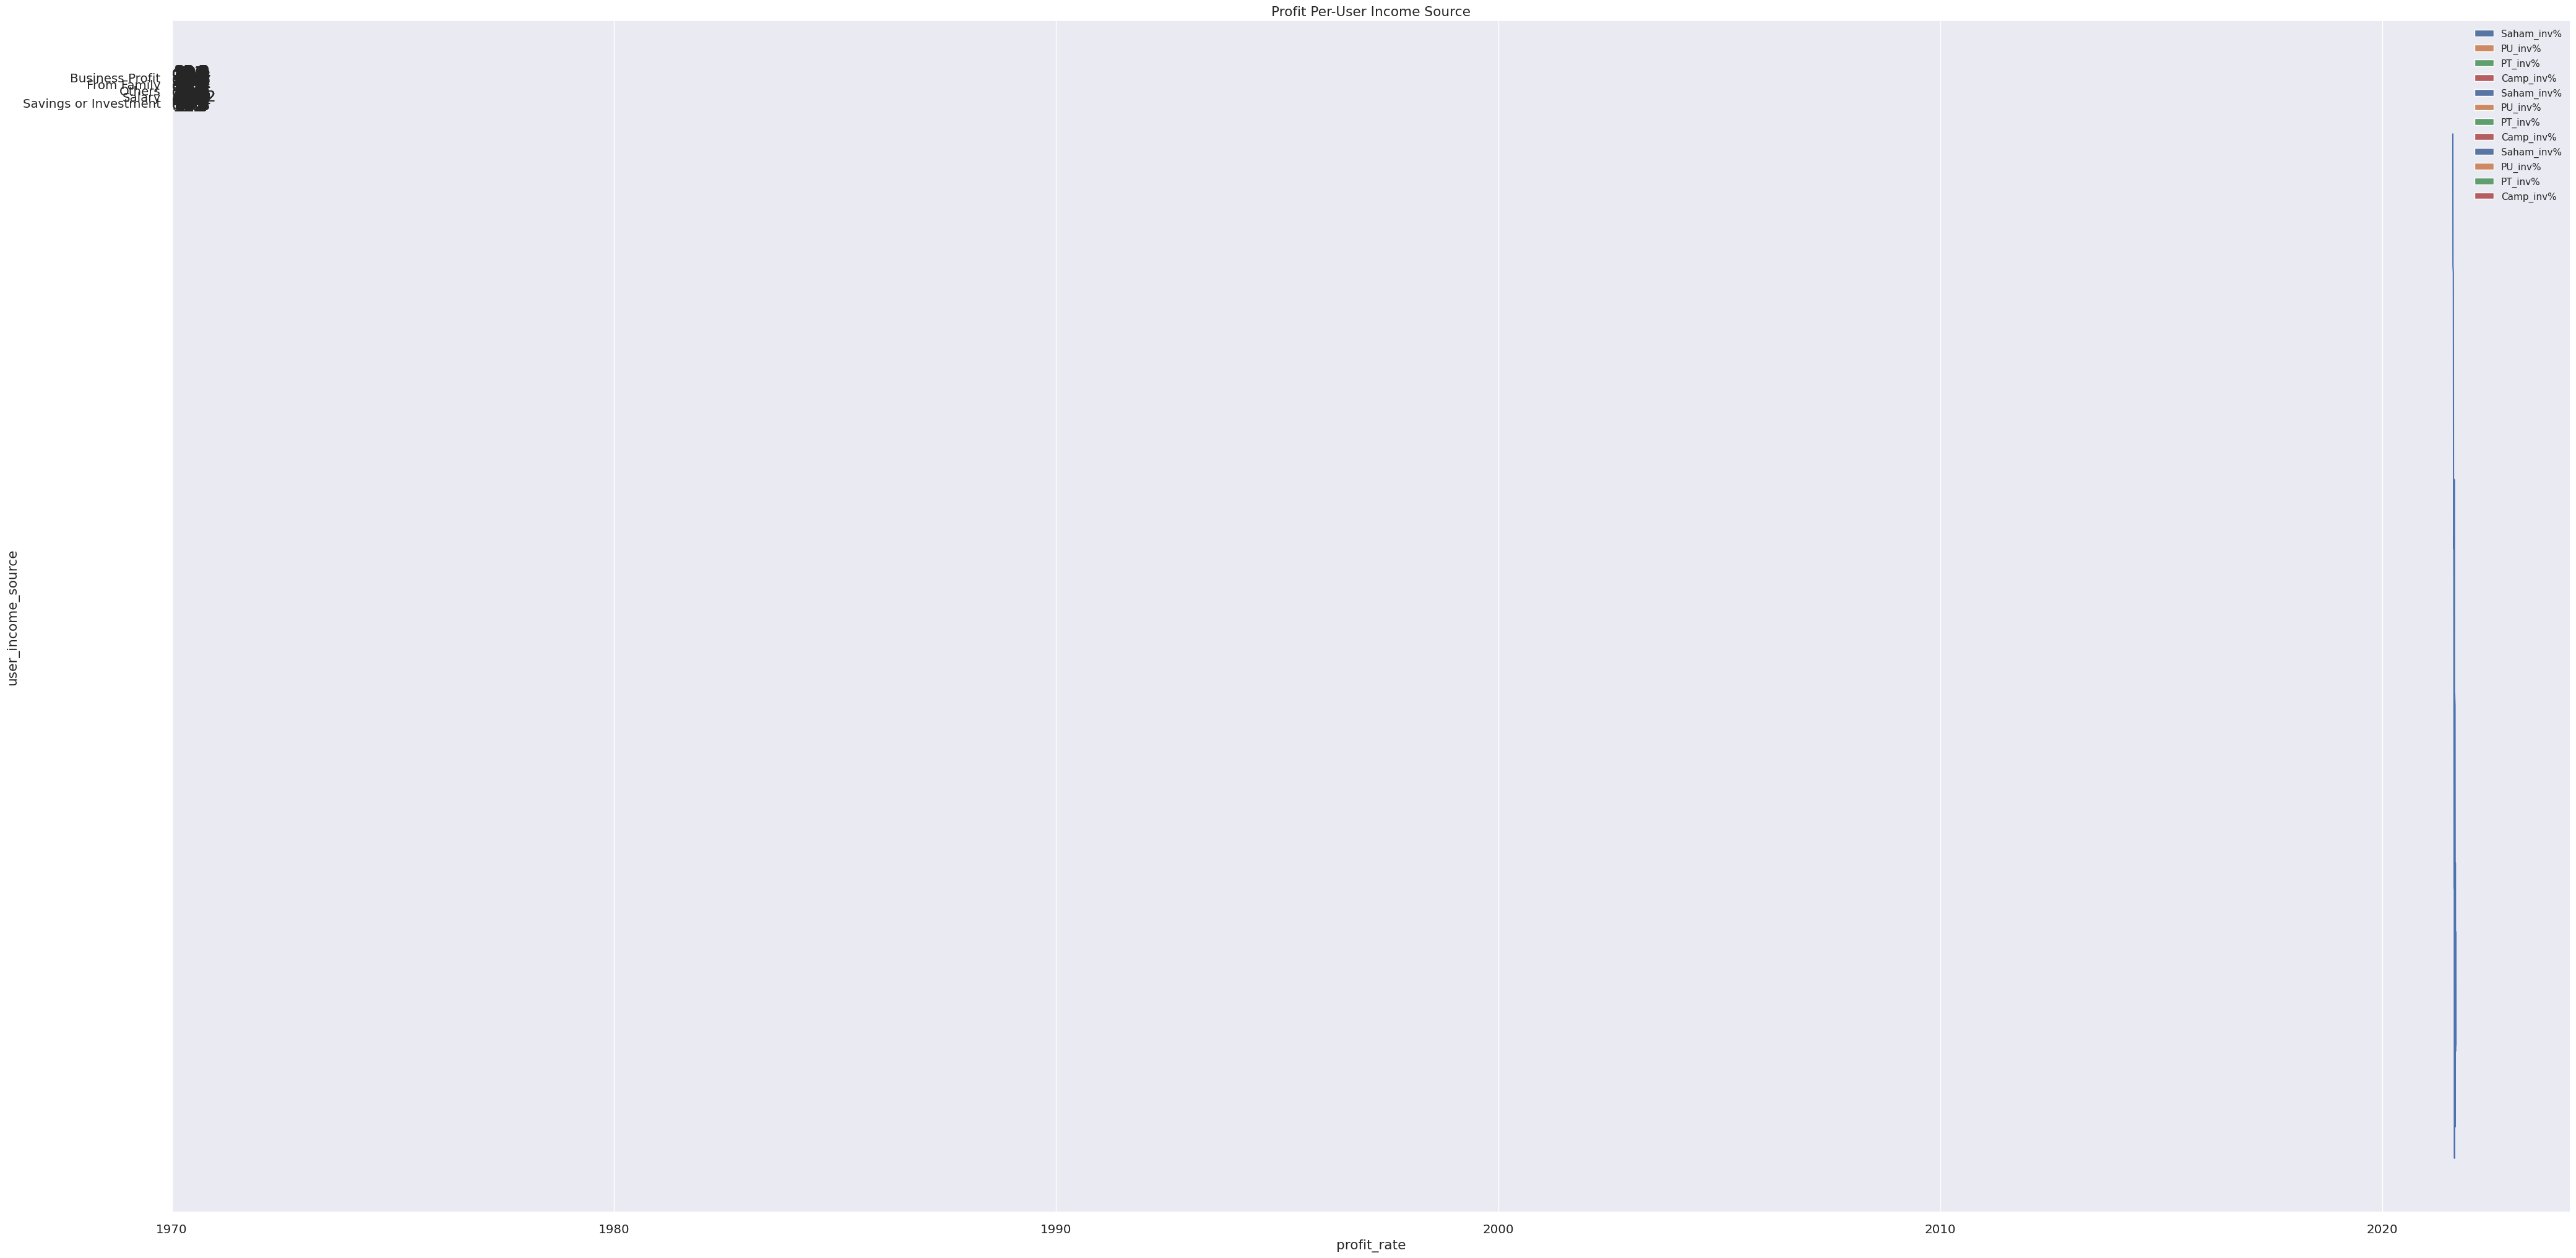

In [385]:
#lets filter out and divide the date by month
buy_freq_aug = buy_freq[(buy_freq['date'] <= '2021-08-31')]
buy_freq_sep = buy_freq[(buy_freq['date'] >= '2021-09-1')]
buy_freq_sep.sort_values(by=['date'], ascending = True)


#lets make the plot for buy frequency in August
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x = "date", y = "buy_frequency",data=buy_freq_aug, markers=True)
sns.set(style='dark',)
plt.show()

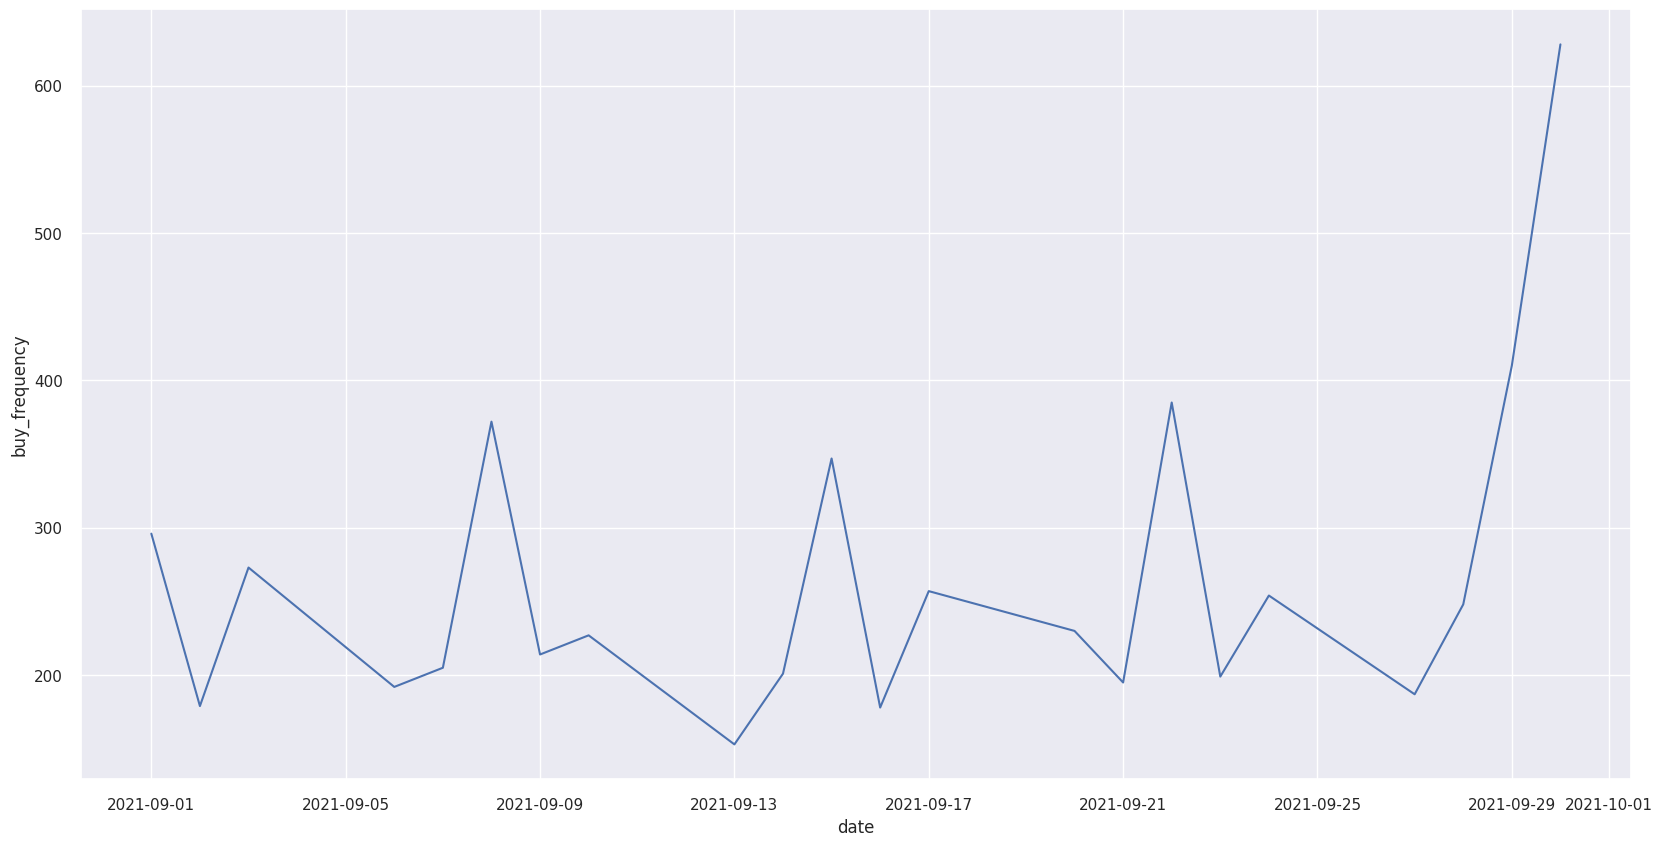

In [386]:
#lets make the plot for buy frequency in september
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x = "date", y = "buy_frequency",data=buy_freq_sep, markers=True)
sns.set(style='dark',)
plt.show()

**Insight:**

1. Day 8, 15, 22, 29, and 30 in September are among the day that have the highest number of buy transaction, in which there are more than 350 transaction happened daily


2. Day 19, 25, 27, 30 and 31 in August are among the day that have the highest number of buy transaction, in which there are 137 to 169 transaction happened daily

3. Day 5, 6, 9, 10, and 17 in August are among the day that have the lowest number of buy transaction, in which there are only 9 to 50 transaction happened daily

4. From what i see in the chart the last 10 days of the month is the high season, in which there is a lot of people purchasing a mutual funds product

5. From what i see in the chart the first 10 days of the month is the low season, in which there is only a few people purchasing a mutual funds product.

###When in month that various demography of user most likely to purchase mutual funds?

#### Data manipulation to prepare for the analysis

In [387]:
# lets see what kind of user likes to buy mutual funds in early date of month (date 1 till 10)
buy_user_freq_e =  transt_buy[(transt_buy['date'] >= '2021-08-1') & (transt_buy['date'] <= '2021-08-10') |
                                     (transt_buy['date'] >= '2021-09-1') & (transt_buy['date'] <= '2021-09-10')]
buy_user_freq_early = buy_user_freq_e.groupby(['date','user_occupation','user_income_range','user_income_source'],as_index=False).count()

#lets drop the column we dont use and rename the total transaction as frequency
list_columns = buy_user_freq_early.columns.to_list()
drop_columns = list_columns[4:21]
drop_columns2 = list_columns[22:24]
buy_user_freq_early.drop(columns=drop_columns, axis = 1, inplace = True)
buy_user_freq_early.drop(columns=drop_columns2, axis = 1, inplace = True)
buy_user_freq_early.rename(columns={'total_transaction': 'buy_frequency_early_month'}, inplace=True, errors='raise')
buy_user_freq_early

date user_occupation       user_income_range     user_income_source  \
0   2021-08-05          Others   C (50 Mil to 100 Mil)                 Salary   
1   2021-08-05  Private Sector        A (Under 10 Mil)            From Family   
2   2021-08-05  Private Sector    B (10 Mil to 50 Mil)                 Salary   
3   2021-08-05  Private Sector    B (10 Mil to 50 Mil)  Savings or Investment   
4   2021-08-05  Private Sector   C (50 Mil to 100 Mil)        Business Profit   
..         ...             ...                     ...                    ...   
417 2021-09-10         Student    B (10 Mil to 50 Mil)                 Others   
418 2021-09-10         Student    B (10 Mil to 50 Mil)                 Salary   
419 2021-09-10         Student   C (50 Mil to 100 Mil)        Business Profit   
420 2021-09-10         Student   C (50 Mil to 100 Mil)                 Salary   
421 2021-09-10         Student  D (100 Mil to 500 Mil)                 Salary   

     buy_frequency_early_month  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  
..                         ...  
417                          3  
418                         30  
419                          1  
420                         13  
421                          3  

[422 rows x 5 columns]

In [388]:
# lets see what kind of user likes to buy mutual funds in middle date of month (date 11 till 20)
buy_user_freq_m =  transt_buy[(transt_buy['date'] >= '2021-08-11') & (transt_buy['date'] <= '2021-08-20') |
                                     (transt_buy['date'] >= '2021-09-11') & (transt_buy['date'] <= '2021-09-20')]
buy_user_freq_middle = buy_user_freq_m.groupby(['date','user_occupation','user_income_range','user_income_source'],as_index=False).count()

#lets drop the column we dont use and rename the total transaction as frequency
list_columns = buy_user_freq_middle.columns.to_list()
drop_columns = list_columns[4:21]
drop_columns2 = list_columns[22:24]
buy_user_freq_middle.drop(columns=drop_columns, axis = 1, inplace = True)
buy_user_freq_middle.drop(columns=drop_columns2, axis = 1, inplace = True)
buy_user_freq_middle.rename(columns={'total_transaction': 'buy_frequency_middle_month'}, inplace=True, errors='raise')
buy_user_freq_middle

date    user_occupation       user_income_range user_income_source  \
0   2021-08-11       Entrepreneur   C (50 Mil to 100 Mil)    Business Profit   
1   2021-08-11       Entrepreneur    E (500 Mil to 1 Bil)    Business Profit   
2   2021-08-11  Government Sector    B (10 Mil to 50 Mil)             Salary   
3   2021-08-11  Government Sector  D (100 Mil to 500 Mil)             Salary   
4   2021-08-11             Others        A (Under 10 Mil)             Others   
..         ...                ...                     ...                ...   
481 2021-09-20            Student   C (50 Mil to 100 Mil)        From Family   
482 2021-09-20            Student   C (50 Mil to 100 Mil)             Others   
483 2021-09-20            Student   C (50 Mil to 100 Mil)             Salary   
484 2021-09-20            Student  D (100 Mil to 500 Mil)             Others   
485 2021-09-20            Student  D (100 Mil to 500 Mil)             Salary   

     buy_frequency_middle_month  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1  
..                          ...  
481                           1  
482                           1  
483                          11  
484                           1  
485                           3  

[486 rows x 5 columns]

In [389]:
# lets see what kind of user likes to buy mutual funds in middle date of month (date 21 till end of month)
buy_user_freq_l =  transt_buy[(transt_buy['date'] >= '2021-08-21') & (transt_buy['date'] <= '2021-08-31') |
                                     (transt_buy['date'] >= '2021-09-21') & (transt_buy['date'] <= '2021-09-30')]
buy_user_freq_late = buy_user_freq_l.groupby(['date','user_occupation','user_income_range','user_income_source'],as_index=False).count()

#lets drop the column we dont use and rename the total transaction as frequency
list_columns = buy_user_freq_late.columns.to_list()
drop_columns = list_columns[4:21]
drop_columns2 = list_columns[22:24]
buy_user_freq_late.drop(columns=drop_columns, axis = 1, inplace = True)
buy_user_freq_late.drop(columns=drop_columns2, axis = 1, inplace = True)
buy_user_freq_late.rename(columns={'total_transaction': 'buy_frequency_late_month'}, inplace=True, errors='raise')
buy_user_freq_late

date user_occupation       user_income_range user_income_source  \
0   2021-08-23    Entrepreneur    B (10 Mil to 50 Mil)    Business Profit   
1   2021-08-23    Entrepreneur   C (50 Mil to 100 Mil)        From Family   
2   2021-08-23    Entrepreneur   C (50 Mil to 100 Mil)             Salary   
3   2021-08-23    Entrepreneur  D (100 Mil to 500 Mil)    Business Profit   
4   2021-08-23    Entrepreneur    E (500 Mil to 1 Bil)    Business Profit   
..         ...             ...                     ...                ...   
679 2021-09-30         Student  D (100 Mil to 500 Mil)    Business Profit   
680 2021-09-30         Student  D (100 Mil to 500 Mil)             Others   
681 2021-09-30         Student  D (100 Mil to 500 Mil)             Salary   
682 2021-09-30         Student    E (500 Mil to 1 Bil)    Business Profit   
683 2021-09-30         Student    E (500 Mil to 1 Bil)             Salary   

     buy_frequency_late_month  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
..                        ...  
679                         1  
680                         2  
681                        18  
682                         1  
683                         1  

[684 rows x 5 columns]

####What time in month that user with different occupation like to purchase mutual funds?

In [390]:
#lets groupby the 3 dataset to user_occupation and drop the column we dont use
buy_occ_freq_early = buy_user_freq_early.groupby(['user_occupation'],as_index=False).count()
buy_occ_freq_early.drop(columns=['date','user_income_range','user_income_source'], axis = 1,inplace=True)

buy_occ_freq_middle = buy_user_freq_middle.groupby(['user_occupation'],as_index=False).count()
buy_occ_freq_middle.drop(columns=['date','user_income_range','user_income_source'], axis = 1,inplace=True)

buy_occ_freq_late = buy_user_freq_late.groupby(['user_occupation'],as_index=False).count()
buy_occ_freq_late.drop(columns=['date','user_income_range','user_income_source'], axis = 1,inplace=True)

#lets merge the 3 dataset
buy_occ1 = buy_occ_freq_early.merge(buy_occ_freq_middle, how='outer',on='user_occupation')
buy_occ_freq_monthly = buy_occ1.merge(buy_occ_freq_late, how='outer',on='user_occupation')
buy_occ_freq_monthly

user_occupation  buy_frequency_early_month  buy_frequency_middle_month  \
0       Entrepreneur                         57                          67   
1  Government Sector                         29                          34   
2             Others                        105                         117   
3     Private Sector                        105                         122   
4            Retired                          1                           1   
5            Student                        125                         145   

   buy_frequency_late_month  
0                        94  
1                        51  
2                       179  
3                       162  
4                         1  
5                       197

##### Days in month that user with different occupation like to purchase mutual funds Barplot

In [391]:
#lets manipulate the data first so we could plot it
buy_occ_freq_monthly_melt = buy_occ_freq_monthly.melt(id_vars=['user_occupation'], value_vars=['buy_frequency_early_month', 'buy_frequency_middle_month','buy_frequency_late_month'])

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.35)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(50,25)})
sns.set(font_scale=1.5)

#create horizontal barplot
p = sns.barplot(x="value", y="user_occupation",  hue='variable', data=buy_occ_freq_monthly_melt, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Days in month that user with different occupation like to purchase mutual funds')

/tmp/ipykernel_4397/2443158770.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_occupation",  hue='variable', data=buy_occ_freq_monthly_melt, ci=None)


[Text(0.5, 1.0, 'Days in month that user with different occupation like to purchase mutual funds')]

**Insight:**

1. User that works as a Guru most likely to buy mutual funds in the middle and late day of month.

1. User that works as a IRT most likely to buy mutual funds in the late day of month.

1. User that works as a Others most likely to buy mutual funds in the late day of month.

1. User that works as a PNS most likely to buy mutual funds in the middle and late day of month.

1. User that works as a Pelajar most likely to buy mutual funds in the late day of month.

1. User that works as a Pengusaha most likely to buy mutual funds in the late day of month.

1. User that works as a Pensiunan most likely to buy mutual funds in the early, middle, or late day of month.

1. User that works in Swasta most likely to buy mutual funds in the late day of month.

1. User that works as a TNI/Polisi most likely to buy mutual funds in the early and late day of month.


[link text](https:// [link text](https://))####What time in month that user with different income range like to purchase mutual funds?

In [392]:
#lets groupby the 3 dataset to user_income_range and drop the column we dont use
buy_inc_freq_early = buy_user_freq_early.groupby(['user_income_range'],as_index=False).count()
buy_inc_freq_early.drop(columns=['date','user_occupation','user_income_source'], axis = 1,inplace=True)

buy_inc_freq_middle = buy_user_freq_middle.groupby(['user_income_range'],as_index=False).count()
buy_inc_freq_middle.drop(columns=['date','user_occupation','user_income_source'], axis = 1,inplace=True)

buy_inc_freq_late = buy_user_freq_late.groupby(['user_income_range'],as_index=False).count()
buy_inc_freq_late.drop(columns=['date','user_occupation','user_income_source'], axis = 1,inplace=True)

#lets merge the 3 dataset
buy_inc1 = buy_inc_freq_early.merge(buy_inc_freq_middle, how='outer',on='user_income_range')
buy_inc_freq_monthly = buy_inc1.merge(buy_inc_freq_late, how='outer',on='user_income_range')
buy_inc_freq_monthly

user_income_range  buy_frequency_early_month  \
0        A (Under 10 Mil)                        130   
1    B (10 Mil to 50 Mil)                        117   
2   C (50 Mil to 100 Mil)                         98   
3  D (100 Mil to 500 Mil)                         60   
4    E (500 Mil to 1 Bil)                         13   
5          F (Over 1 Bil)                          4   

   buy_frequency_middle_month  buy_frequency_late_month  
0                         142                       187  
1                         128                       203  
2                         108                       150  
3                          81                        96  
4                          25                        42  
5                           2                         6

**bold text**#####Days in month that user with different Income Range like to purchase mutual funds Barplot

In [393]:
#lets manipulate the data first so we could plot it
buy_inc_freq_monthly_melt = buy_inc_freq_monthly.melt(id_vars=['user_income_range'], value_vars=['buy_frequency_early_month', 'buy_frequency_middle_month','buy_frequency_late_month'])

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(50,25)})
sns.set(font_scale=1.5)

#create horizontal barplot
p = sns.barplot(x="value", y="user_income_range",  hue='variable', data=buy_inc_freq_monthly_melt, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Days in month that user with different Income Range like to purchase mutual funds')

/tmp/ipykernel_4397/842938108.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_income_range",  hue='variable', data=buy_inc_freq_monthly_melt, ci=None)


[Text(0.5, 1.0, 'Days in month that user with different Income Range like to purchase mutual funds')]

**Insight:**

1. User that have an income range < 10 Juta	 most likely to buy mutual funds in late day of month.

1. User that have an income range Rp 10 Juta - 50 Juta most likely to buy mutual funds in late day of month.

1. User that have an income range > Rp 50 Juta - 100 Juta most likely to buy mutual funds in late day of month.

1. User that have an income range > Rp 100 Juta - 500 Juta most likely to buy mutual funds in late day of month.

1. User that have an income range > Rp 500 Juta - 1 Miliar most likely to buy mutual funds in late day of month.

1. User that have an income range> Rp 1 Miliar - 500 Juta most likely to buy mutual funds in early and late day of month.






```
# This is formatted as code
```

####What time in month that user with different income source like to purchase mutual funds?

In [394]:
#lets groupby the 3 dataset to user_income_source and drop the column we dont use
buy_src_freq_early = buy_user_freq_early.groupby(['user_income_source'],as_index=False).count()
buy_src_freq_early.drop(columns=['date','user_occupation','user_income_range'], axis = 1,inplace=True)

buy_src_freq_middle = buy_user_freq_middle.groupby(['user_income_source'],as_index=False).count()
buy_src_freq_middle.drop(columns=['date','user_occupation','user_income_range'], axis = 1,inplace=True)

buy_src_freq_late = buy_user_freq_late.groupby(['user_income_source'],as_index=False).count()
buy_src_freq_late.drop(columns=['date','user_occupation','user_income_range'], axis = 1,inplace=True)

#lets merge the 3 dataset
buy_src1 = buy_src_freq_early.merge(buy_src_freq_middle, how='outer',on='user_income_source')
buy_src_freq_monthly = buy_src1.merge(buy_src_freq_late, how='outer',on='user_income_source')

#there is a Null value in this dataframe, lets fill it with 0 or zero and change the datatype to int
buy_src_freq_monthly = buy_src_freq_monthly.fillna(0)
buy_src_freq_monthly['buy_frequency_early_month'] = buy_src_freq_monthly['buy_frequency_early_month'].apply(pd.to_numeric).astype('Int64')
buy_src_freq_monthly


user_income_source  buy_frequency_early_month  \
0        Business Profit                         84   
1            From Family                         70   
2                 Others                         54   
3                 Salary                        183   
4  Savings or Investment                         31   

   buy_frequency_middle_month  buy_frequency_late_month  
0                         115                       166  
1                          69                       114  
2                          63                        80  
3                         207                       277  
4                          32                        47

In [395]:
#lets manipulate the data first so we could plot it
buy_src_freq_monthly_melt = buy_src_freq_monthly.melt(id_vars=['user_income_source'], value_vars=['buy_frequency_early_month', 'buy_frequency_middle_month','buy_frequency_late_month'])

#make a function to show the value as a label
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.35)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#set seaborn plotting aesthetics so it looks good
sns.set(style='white')
sns.set(rc = {'figure.figsize':(50,25)})
sns.set(font_scale=1.5)

#create horizontal barplot
p = sns.barplot(x="value", y="user_income_source",  hue='variable', data=buy_src_freq_monthly_melt, ci=None)

#show values on barplot
show_values(p, "h", space=0.3)
p.set(title = 'Days in month that user with different Income Source like to purchase mutual funds')

/tmp/ipykernel_4397/344902677.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x="value", y="user_income_source",  hue='variable', data=buy_src_freq_monthly_melt, ci=None)


[Text(0.5, 1.0, 'Days in month that user with different Income Source like to purchase mutual funds')]

##### Days in month that user with different Income Source like to purchase mutual funds Barplot

**Insight:**

1. User that have an income source from Dari Orang Tua / Anak	most likely to buy mutual funds in late day of month.

1. User that have an income source from Dari Suami / istri	most likely to buy mutual funds in early and late day of month.

1. User that have an income source from Dari Gaji	most likely to buy mutual funds in late day of month.

1. User that have an income source from Hasil Investasi	most likely to buy mutual funds in early and late day of month.

1. User that have an income source from Keuntungan Bisnis	most likely to buy mutual funds in late day of month.

1. User that have an income source from Lainnya	most likely to buy mutual funds in late day of month.

1. User that have an income source from Tabungan	most likely to buy mutual funds in early, middle, and late day of month.

1. User that have an income source from Undian	most likely to buy mutual funds in late day of month.

1. User that have an income source from Warisan	most likely to buy mutual funds in early and late day of month.

1. User that have an income source from Bunga Simpanan most likely to buy mutual funds in late day of month.



###What days in the month that user most likely to sell his/her mutual funds?

**bold text**

In [396]:
#lets filter the sell transcation data and group by the data first
transt = userdata_balance.copy()
transt_sell =transt[(transt['total_transaction'] <= 0)]
sell_user_freq = transt_buy.groupby(['date'],as_index=False).count().sort_values(by=['date'],ascending=True)

#lets drop the columns we dont use and change the column name total_transaction to sell_frequency
sell_freq = sell_user_freq.copy()
list_columns = sell_freq.columns.to_list()
drop_columns = list_columns[1:21]
drop_columns2 = list_columns[22:24]
sell_freq.drop(columns=drop_columns, axis = 1, inplace = True)
sell_freq.drop(columns=drop_columns2, axis = 1, inplace = True)
sell_freq.rename(columns={'total_transaction': 'sell_frequency'}, inplace=True, errors='raise')
sell_freq.sort_values(by=['sell_frequency'],ascending=False)

date  sell_frequency
38 2021-09-30             628
37 2021-09-29             410
32 2021-09-22             385
22 2021-09-08             372
27 2021-09-15             347
17 2021-09-01             296
19 2021-09-03             273
29 2021-09-17             257
34 2021-09-24             254
36 2021-09-28             248
30 2021-09-20             230
24 2021-09-10             227
23 2021-09-09             214
21 2021-09-07             205
26 2021-09-14             201
33 2021-09-23             199
31 2021-09-21             195
20 2021-09-06             192
35 2021-09-27             187
18 2021-09-02             179
28 2021-09-16             178
8  2021-08-19             172
12 2021-08-25             167
14 2021-08-27             155
16 2021-08-31             154
25 2021-09-13             153
15 2021-08-30             136
6  2021-08-16             129
13 2021-08-26             125
11 2021-08-24             124
10 2021-08-23             100
9  2021-08-20              98
4  2021-08-11              75
5  2021-08-13              73
7  2021-08-17              64
3  2021-08-10              50
2  2021-08-09              31
1  2021-08-06              30
0  2021-08-05               9

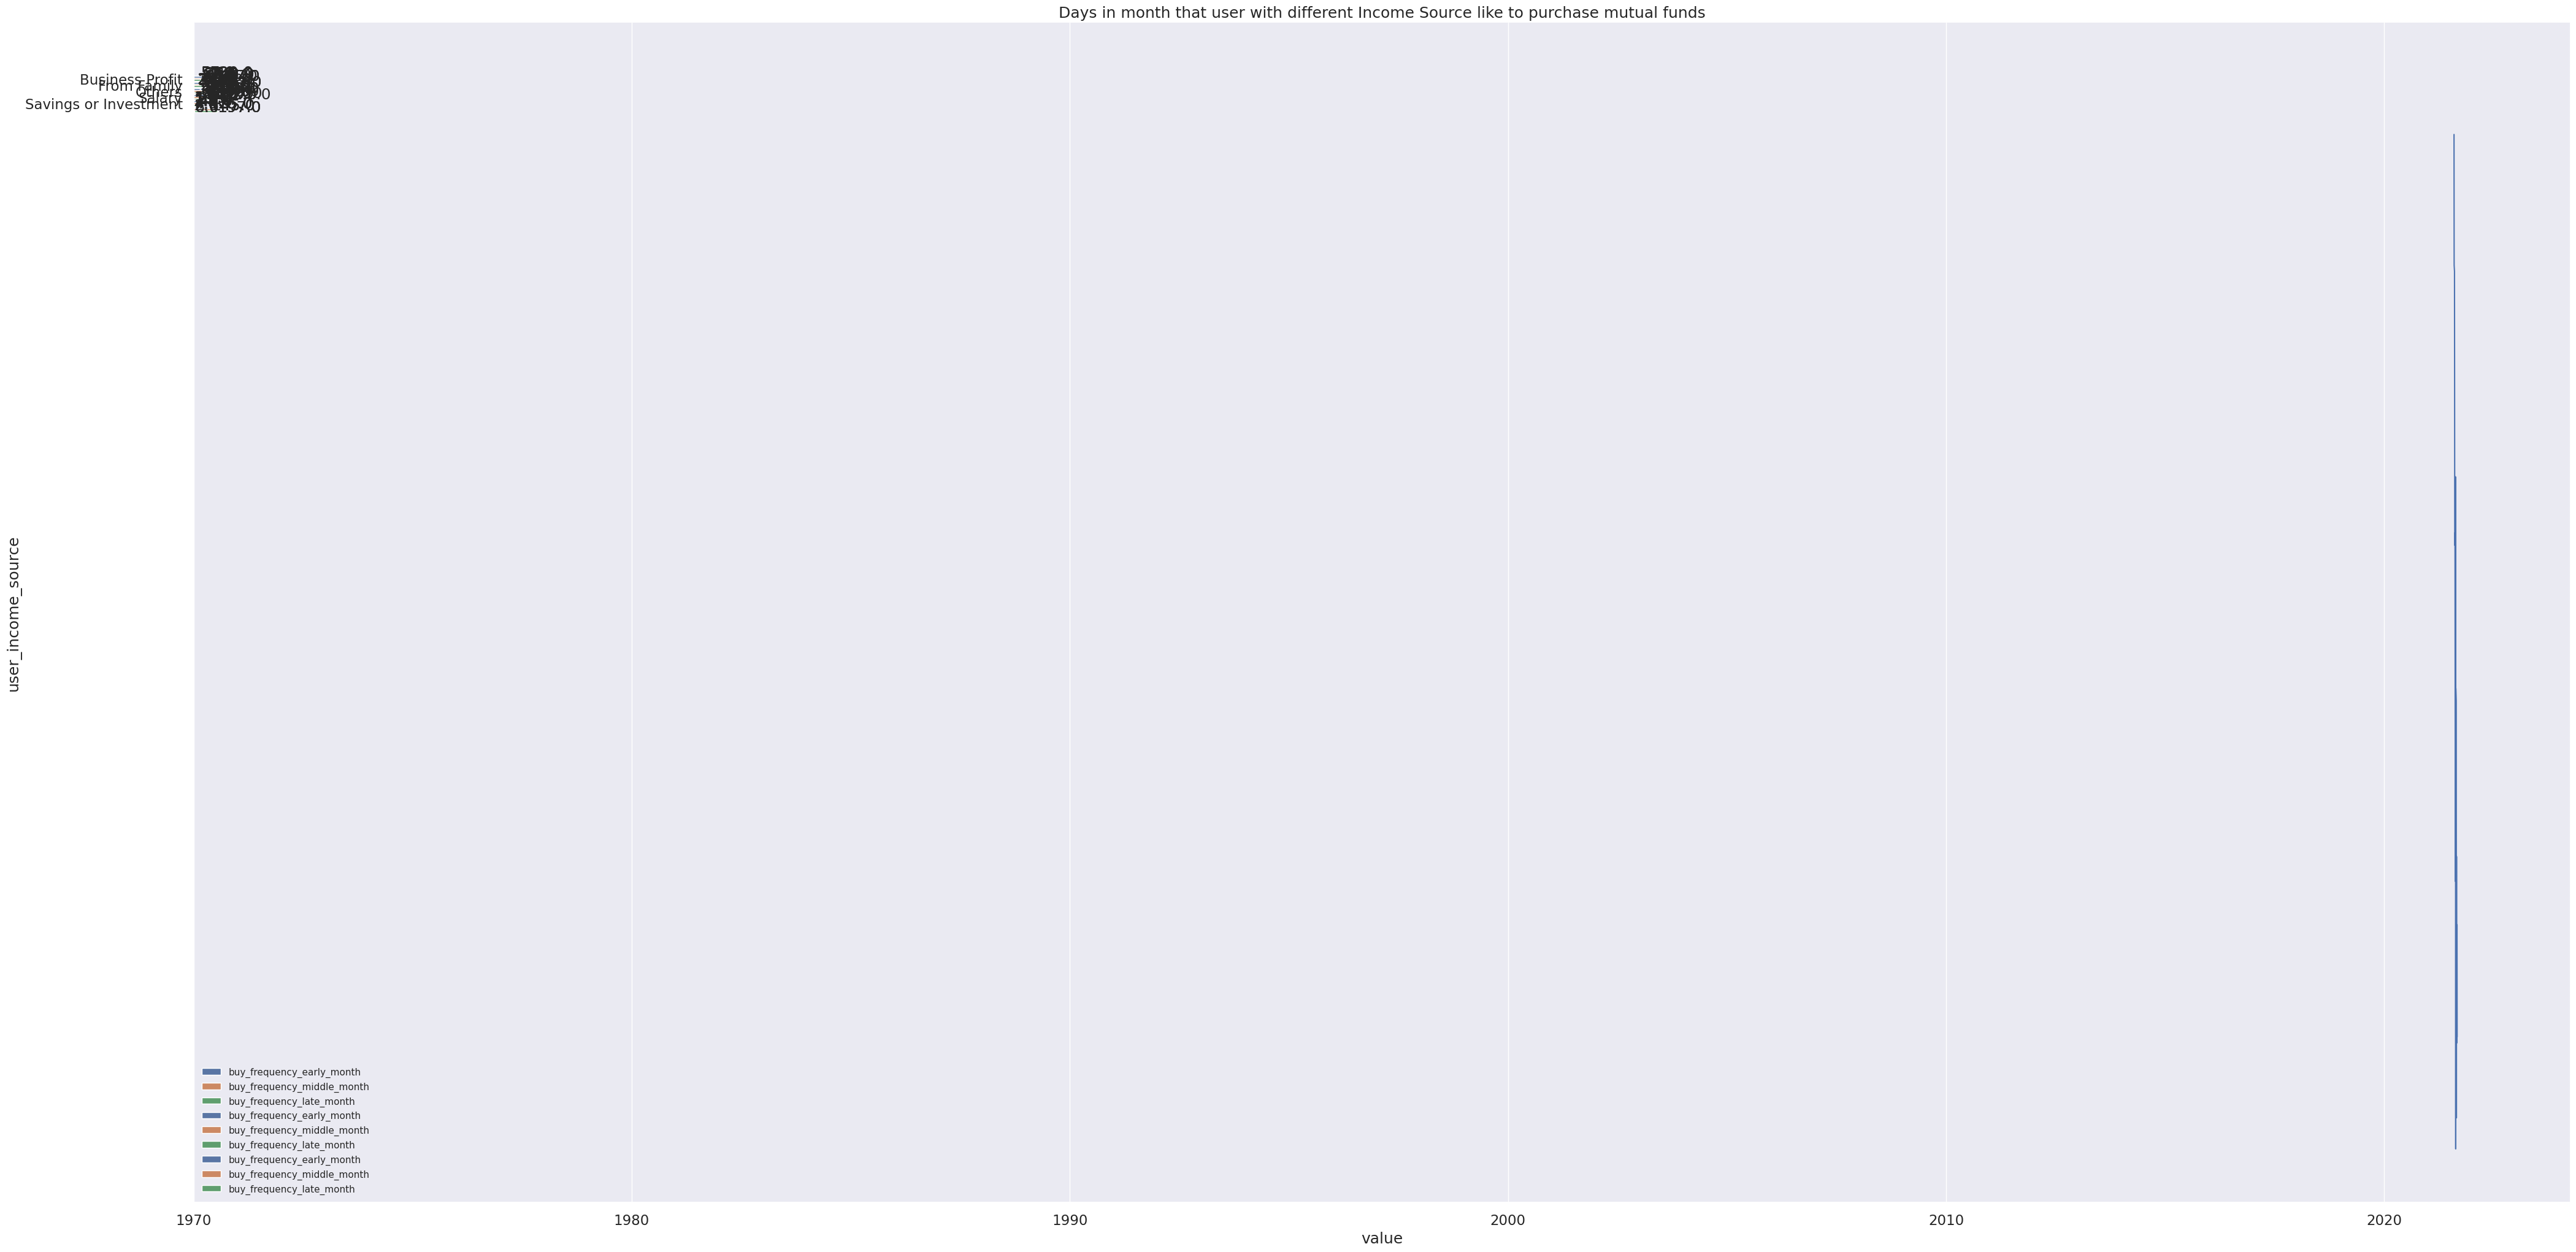

In [397]:
#lets filter and divide the previous dataframe into months
sell_freq_aug = sell_freq[(sell_freq['date'] <= '2021-08-31')]
sell_freq_sep = sell_freq[(sell_freq['date'] >= '2021-09-1')]

#lets make the plot for sell frequency in August
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x = "date", y = "sell_frequency",data=sell_freq_aug, markers=True)
sns.set(style='dark',)
plt.show()

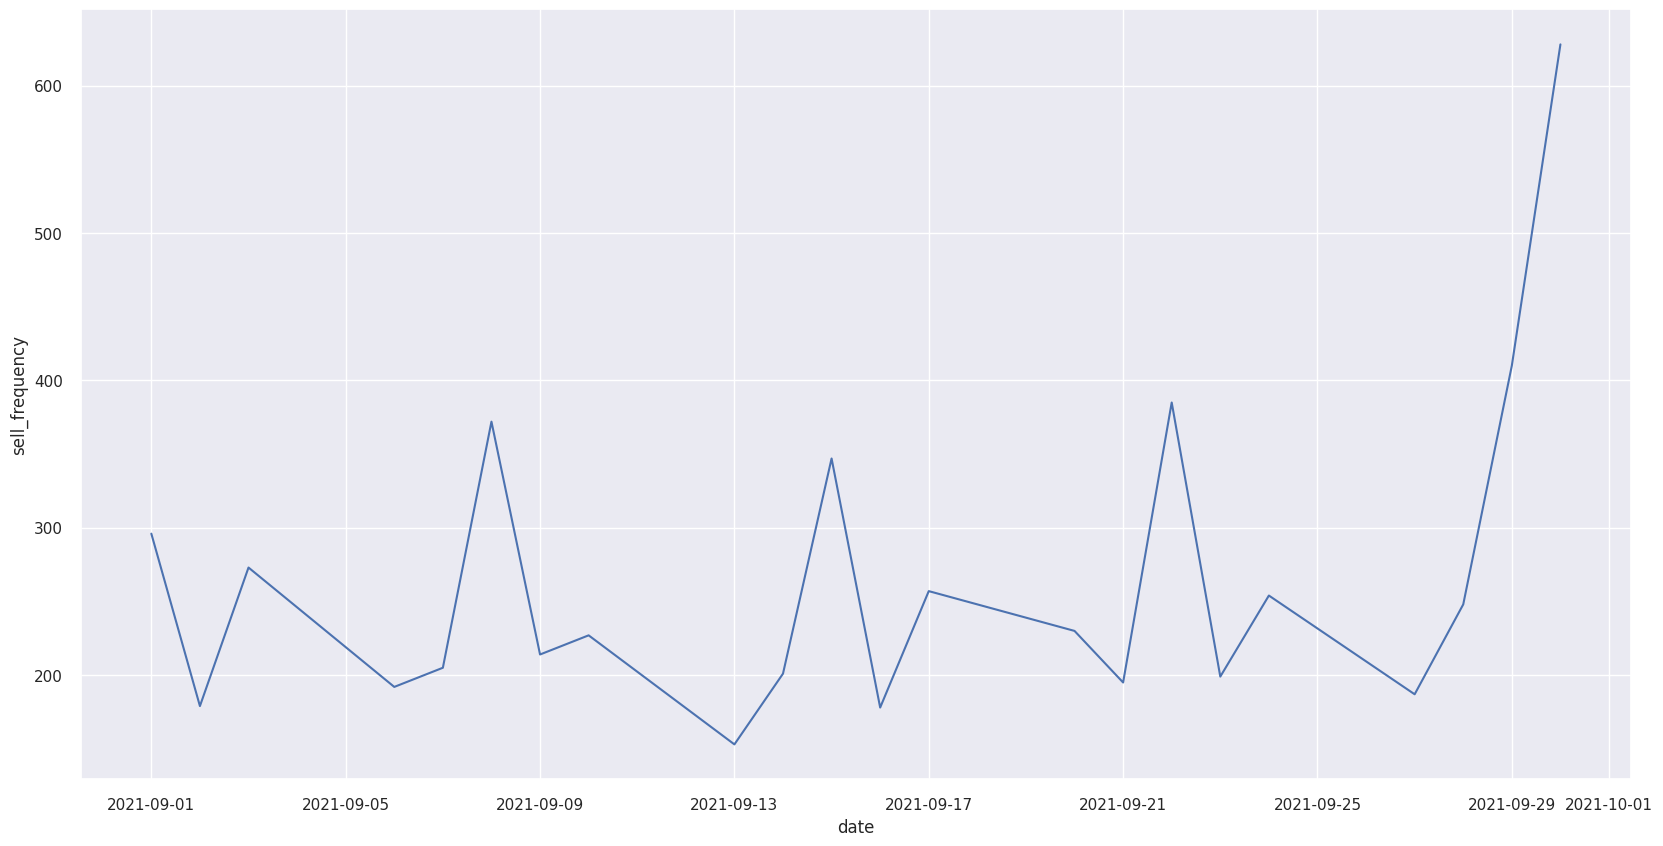

In [398]:
#lets make the plot for sell frequency in September
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x = "date", y = "sell_frequency",data=sell_freq_sep, markers=True)
sns.set(style='dark',)
plt.show()

**Insight:**

1. Day in August who has the highest sell transaction happened are on day 25, 27, and 31 in which there is approximately 155 to 169 sell transaction happened daily.

1. Day in September who has the highest buy transaction happened are on day 08, ,15 , 22, 29, and 30 in which there is approximately 373 to 411.

1. The most often time of user sells their mutual funds account are occured in Wednesday, because most of the day with high sell transaction in August and September are occured in a Wednesday

1. From the graph we also could conclude that there is more sell transaction occured in the middle or late day of the month.

#**E) Clustering Analysis using K-Means**

##Prepare the dataset for cluster analysis

In [399]:
clustering = monthly_user_data.copy()
clustering['total_buy'] = clustering['monthly_total_buy']
clustering['age'] = clustering['user_age']

# Let's drop the columns we don't use for the cluster analysis
list_columns = clustering.columns.to_list()
drop_columns = list_columns[1:43]
clustering = clustering.drop(columns=drop_columns, axis=1)
clustering = clustering.fillna(0)
gclustering = clustering.groupby(['user_id', 'age'], as_index=False).mean()
gclustering

user_id  age  total_buy
0     1004326   30       0.00
1     1005053   31       0.00
2     1005165   22       0.00
3     1018814   20       0.00
4     1023627   33       0.00
...       ...  ...        ...
8214   988940   27       0.00
8215   989618   29 1000000.00
8216   990466   33  750000.00
8217    99245   25       0.00
8218   997938   27  125000.00

[8219 rows x 3 columns]

In [400]:
#transform the categorical data to numerical using cat.codes
#gclustering['gender'] = gclustering['gender'].astype('category')
#gclustering['gender'] = gclustering['gender'].cat.codes
gclustering = gclustering.set_index('user_id')
group_clustering = gclustering[(gclustering['total_buy']>=1)]
group_clustering

age  total_buy
user_id                
1024581   25   25000.00
103108    42 5000000.00
1035424   21   47000.00
1050345   28  500000.00
1062501   23  425000.00
...      ...        ...
979998    29 1391527.50
984729    34   10000.00
989618    29 1000000.00
990466    33  750000.00
997938    27  125000.00

[3458 rows x 2 columns]

In [401]:
# Define Standard Scale dataset
cluster = group_clustering.copy()

# Scaling numeric total_buy
numeric = ['total_buy','age']

# using Standard Scaler
ss_scaler = MinMaxScaler()
cluster[numeric] = ss_scaler.fit_transform(cluster[numeric])
cluster.head()

age  total_buy
user_id                
1024581 0.14       0.00
103108  0.45       0.08
1035424 0.07       0.00
1050345 0.20       0.01
1062501 0.11       0.01

In [402]:
#lets see the scatterplot between this variable
sns.scatterplot (data = cluster , x='total_buy', y='age', color = 'cornflowerblue')

<AxesSubplot: xlabel='total_buy', ylabel='age'>

In [403]:
from pandas.plotting import scatter_matrix
scatter_matrix(cluster, figsize = (10,8))

array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='total_buy', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='total_buy'>,
        <AxesSubplot: xlabel='total_buy', ylabel='total_buy'>]],
      dtype=object)

## Check the proper cluster number using elbow method and sillhouete

In [404]:
#checking elbow method

distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42)
  kmeanModel.fit(cluster)
  distortions.append(kmeanModel.inertia_)

print(distortions)

[92.80263300071952, 35.371503830357824, 21.347095634900757, 16.182741424403098, 11.553475512955494, 9.164823554440957, 7.800747586310126, 6.395005348724219, 5.545282679117495, 4.947310523231424]


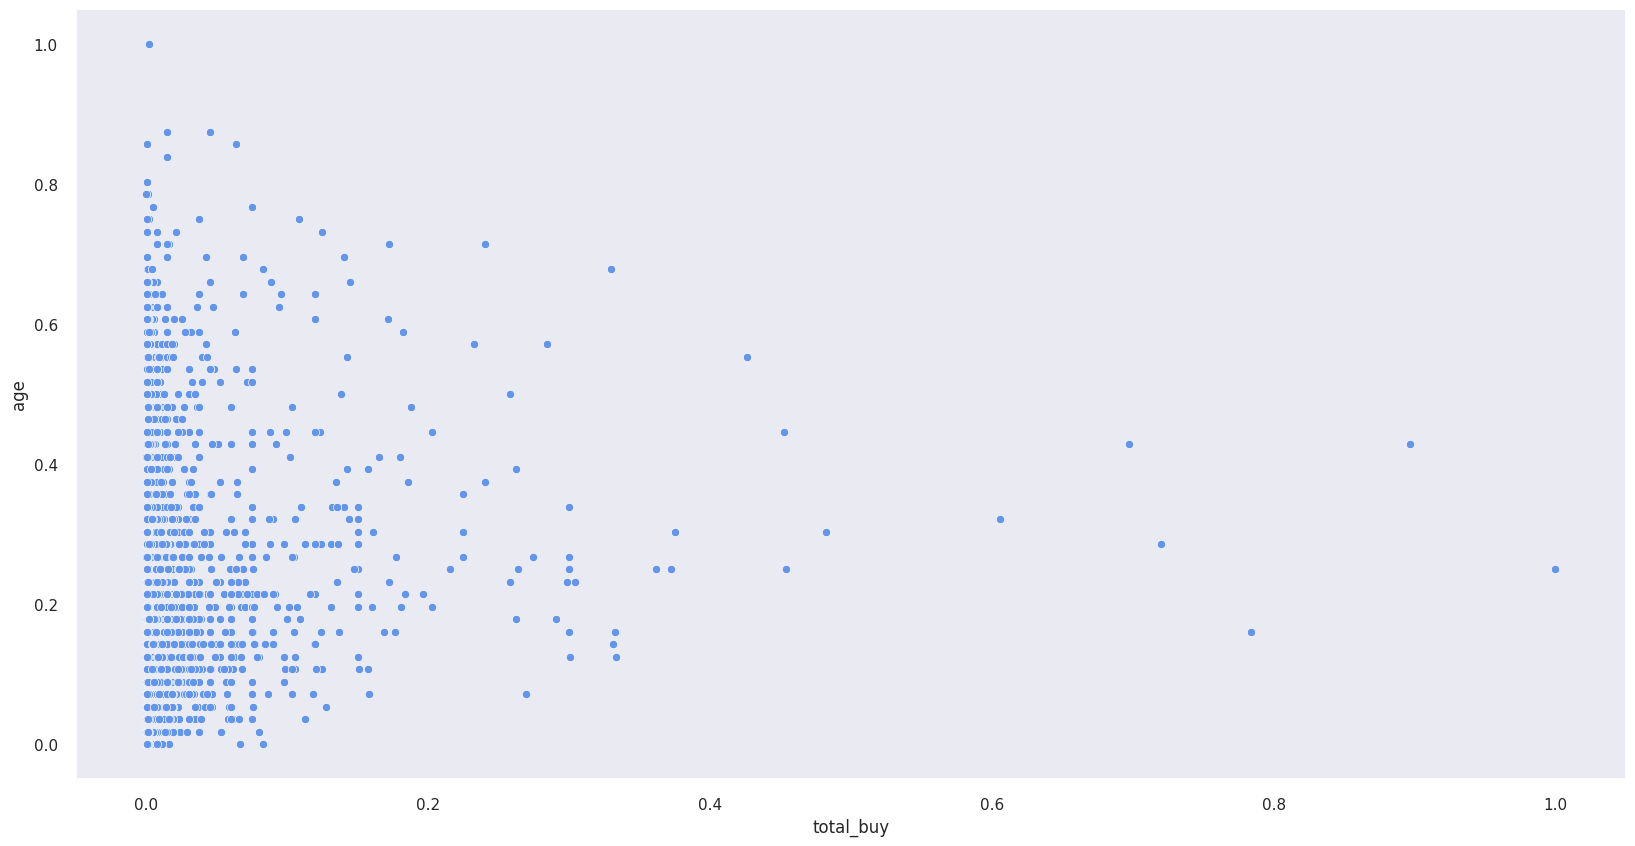

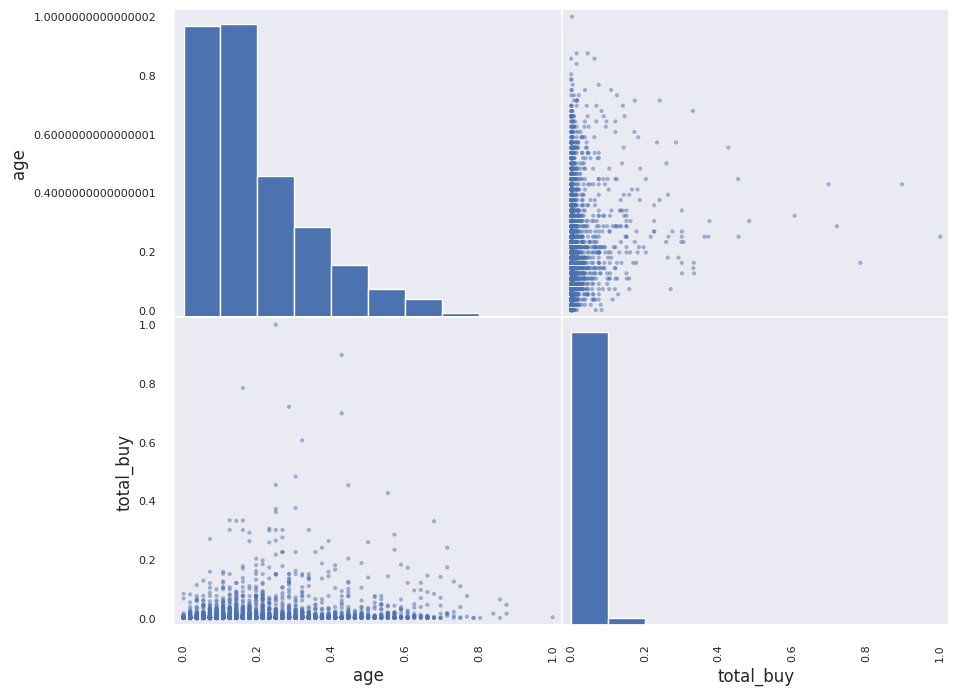

<Figure size 1600x800 with 0 Axes>

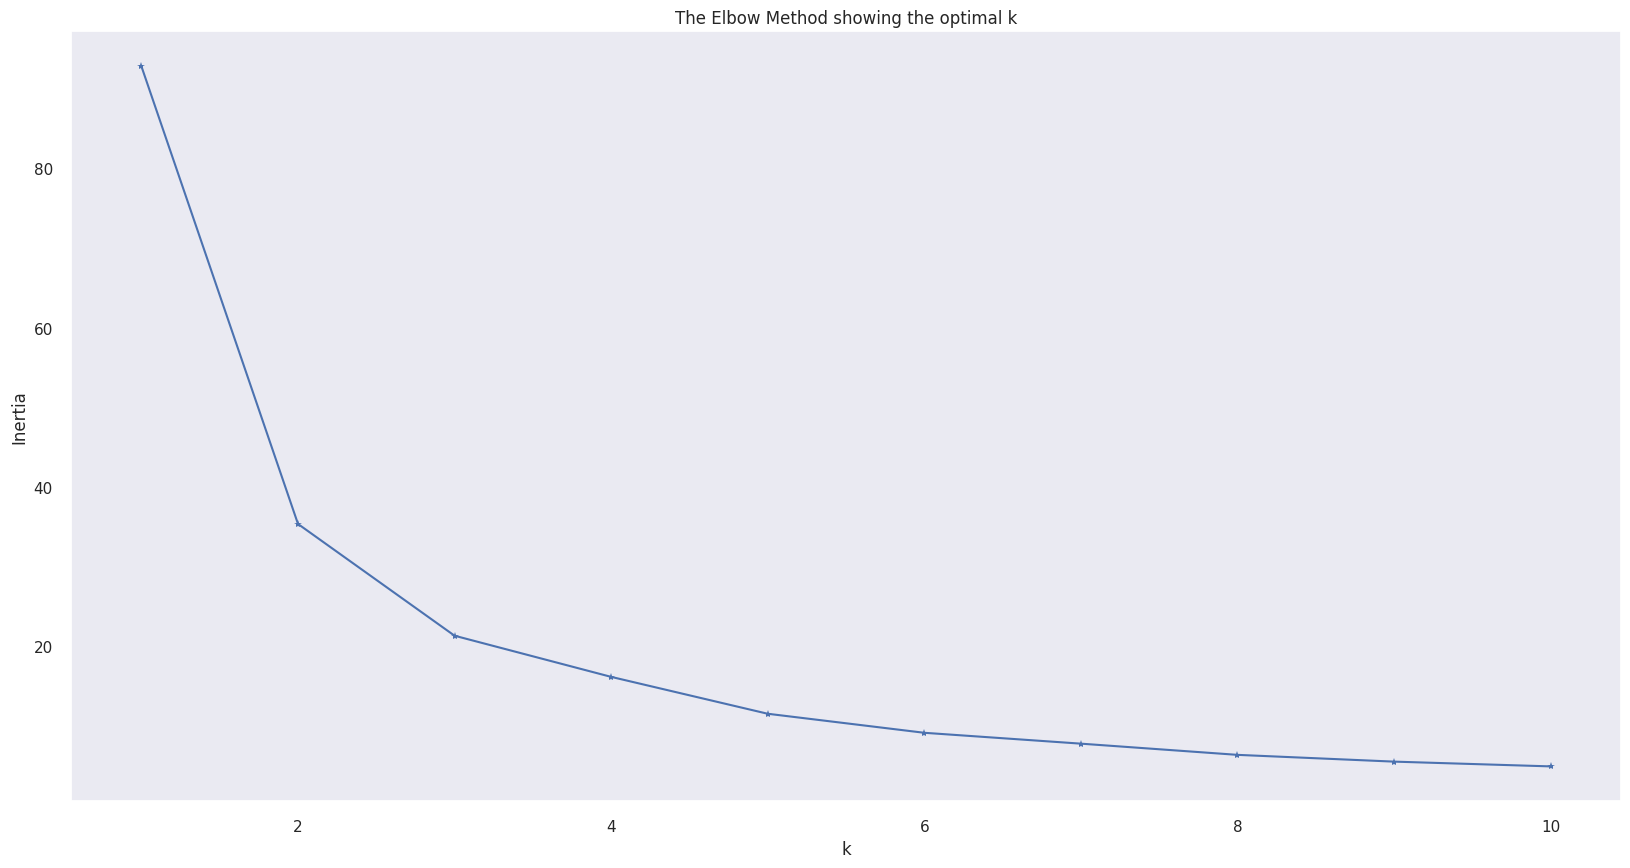

In [405]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [406]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6269826177334852
For n_clusters = 3 The average silhouette_score is : 0.5461667928707145
For n_clusters = 4 The average silhouette_score is : 0.5144196047265202
For n_clusters = 5 The average silhouette_score is : 0.5292575505975202
For n_clusters = 6 The average silhouette_score is : 0.5062719511267232
For n_clusters = 7 The average silhouette_score is : 0.48176782902108606
For n_clusters = 8 The average silhouette_score is : 0.4962894343974333
For n_clusters = 9 The average silhouette_score is : 0.4834722450543127
For n_clusters = 10 The average silhouette_score is : 0.4730540754711531


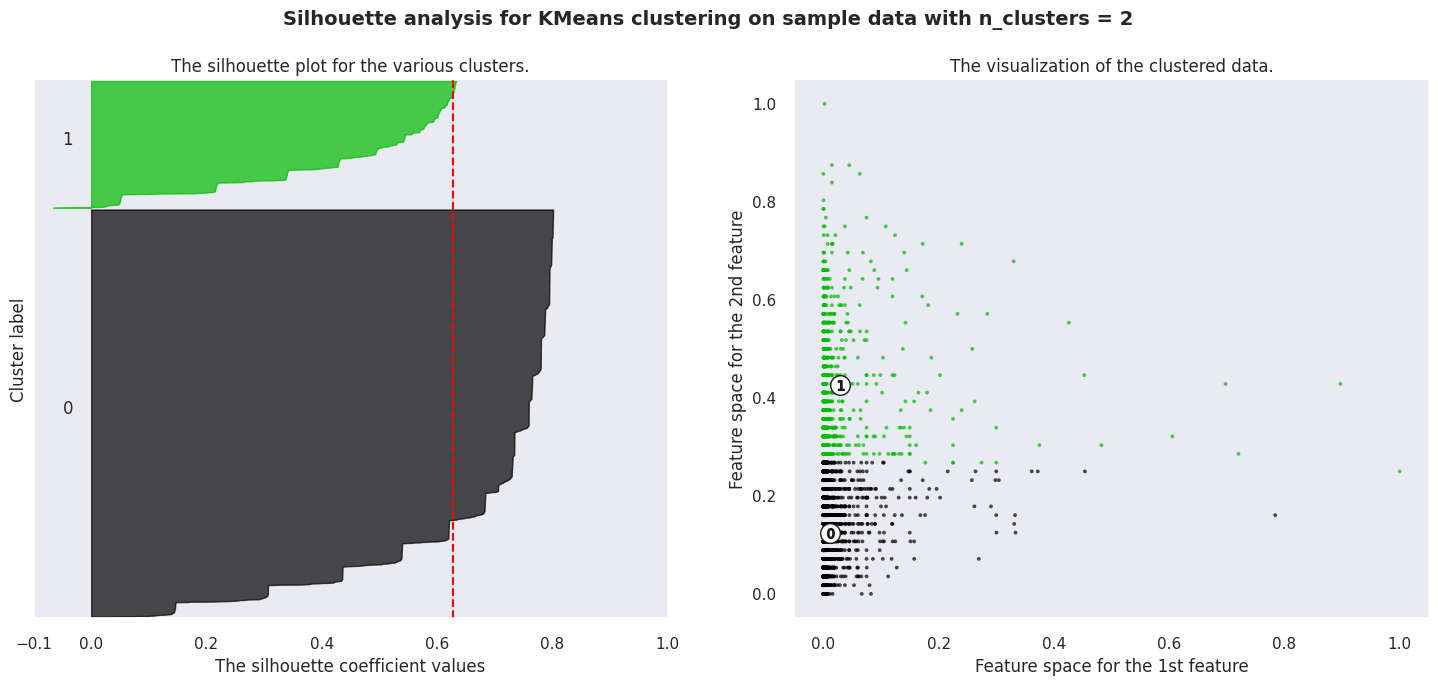

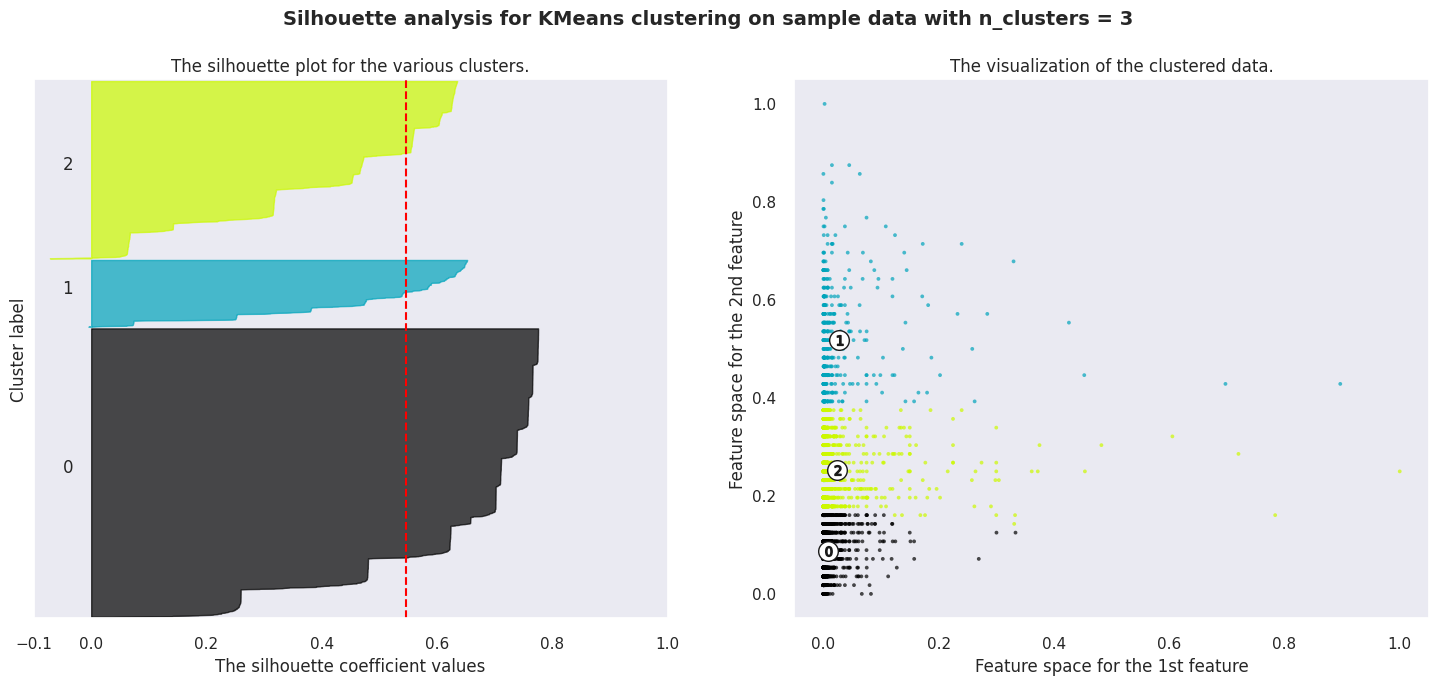

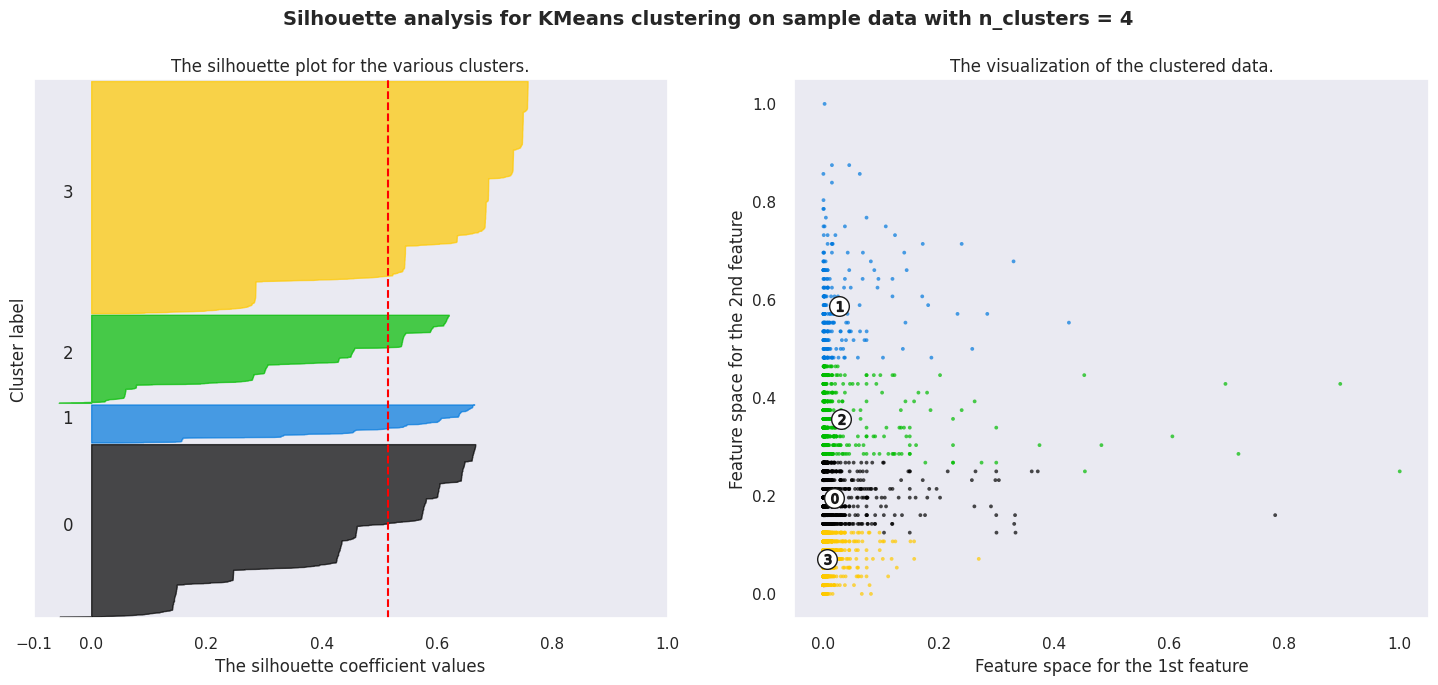

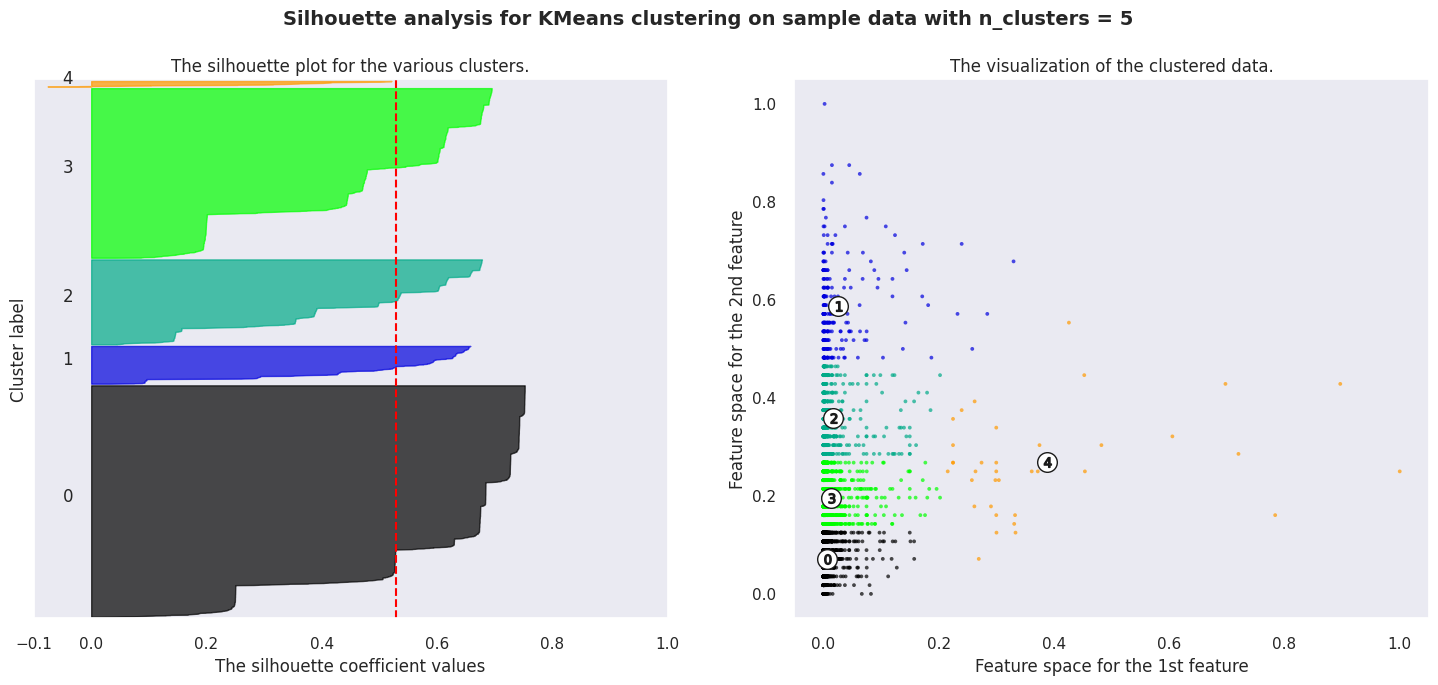

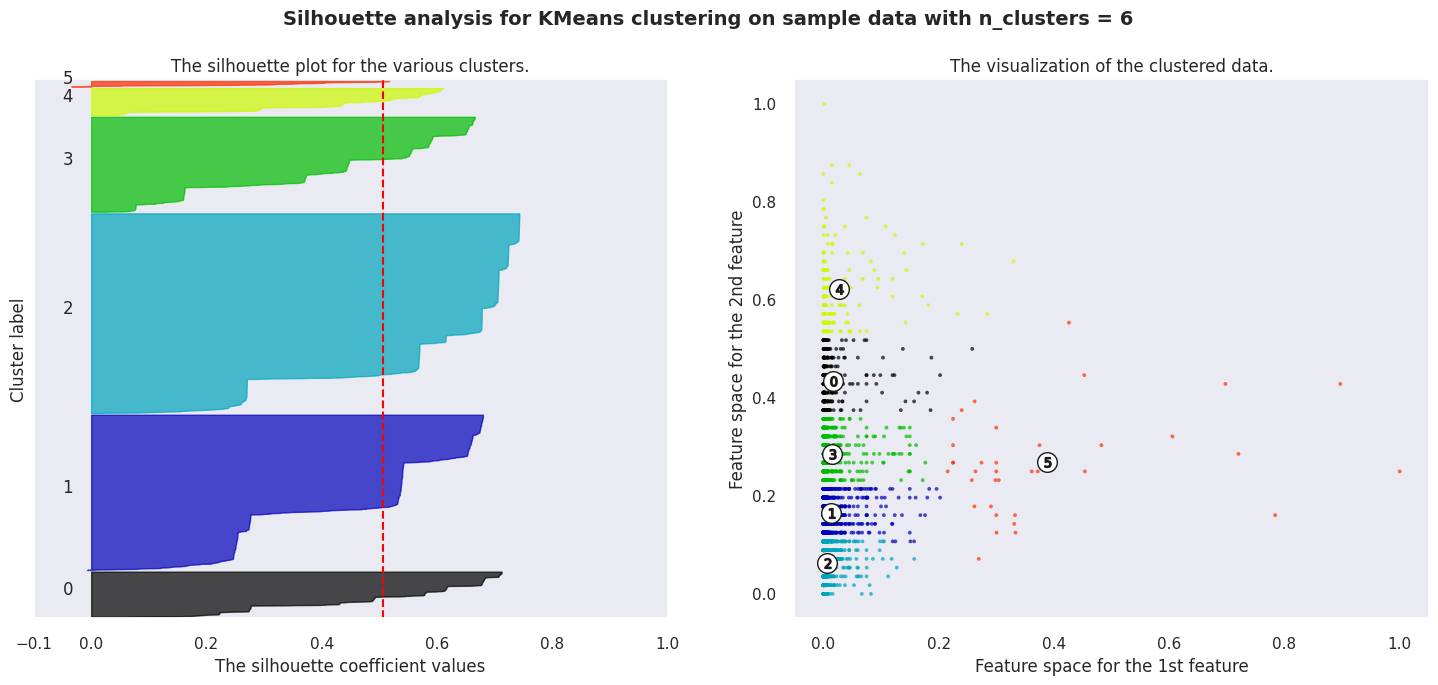

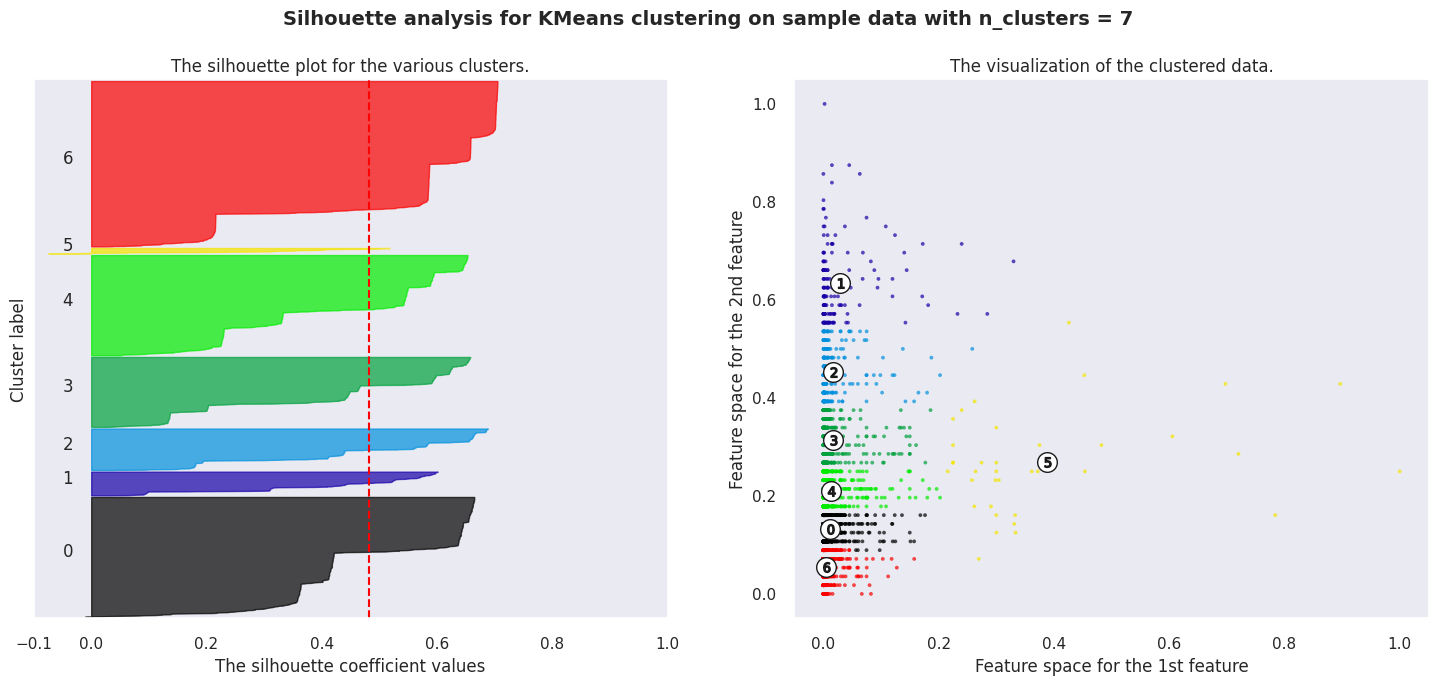

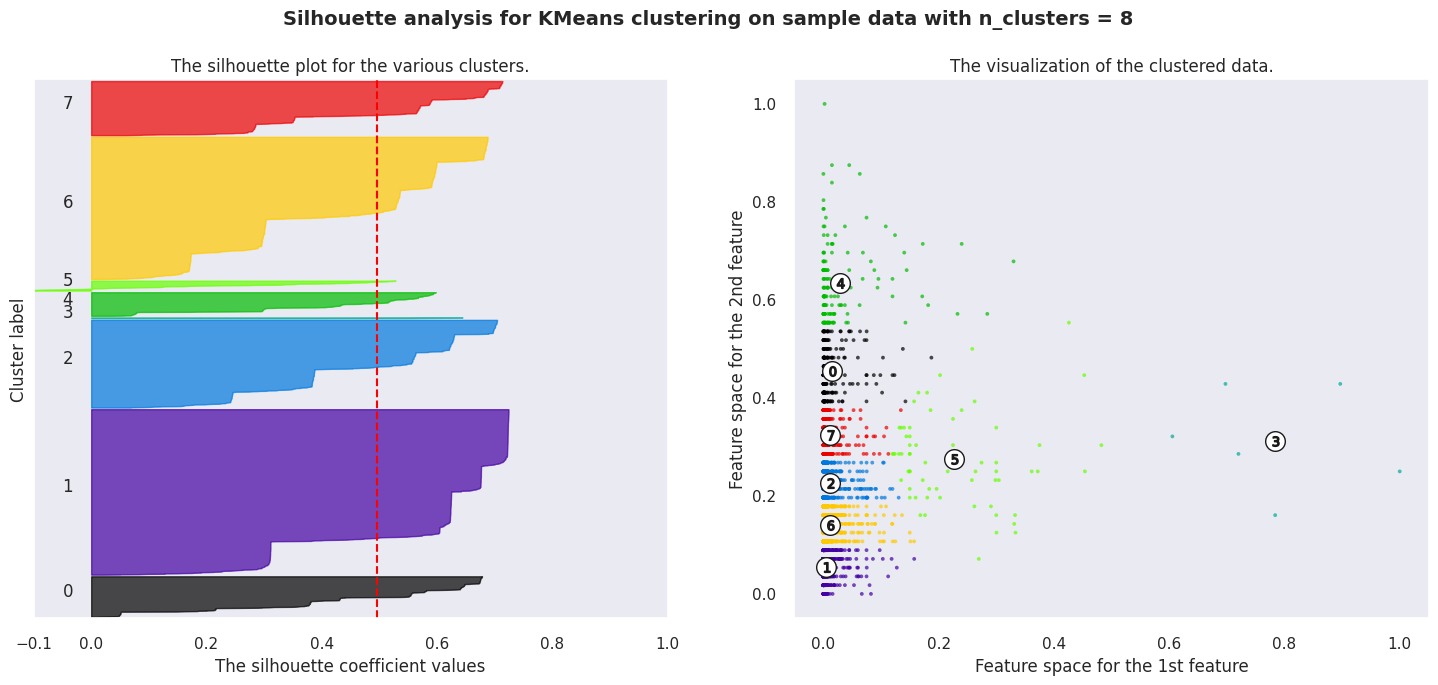

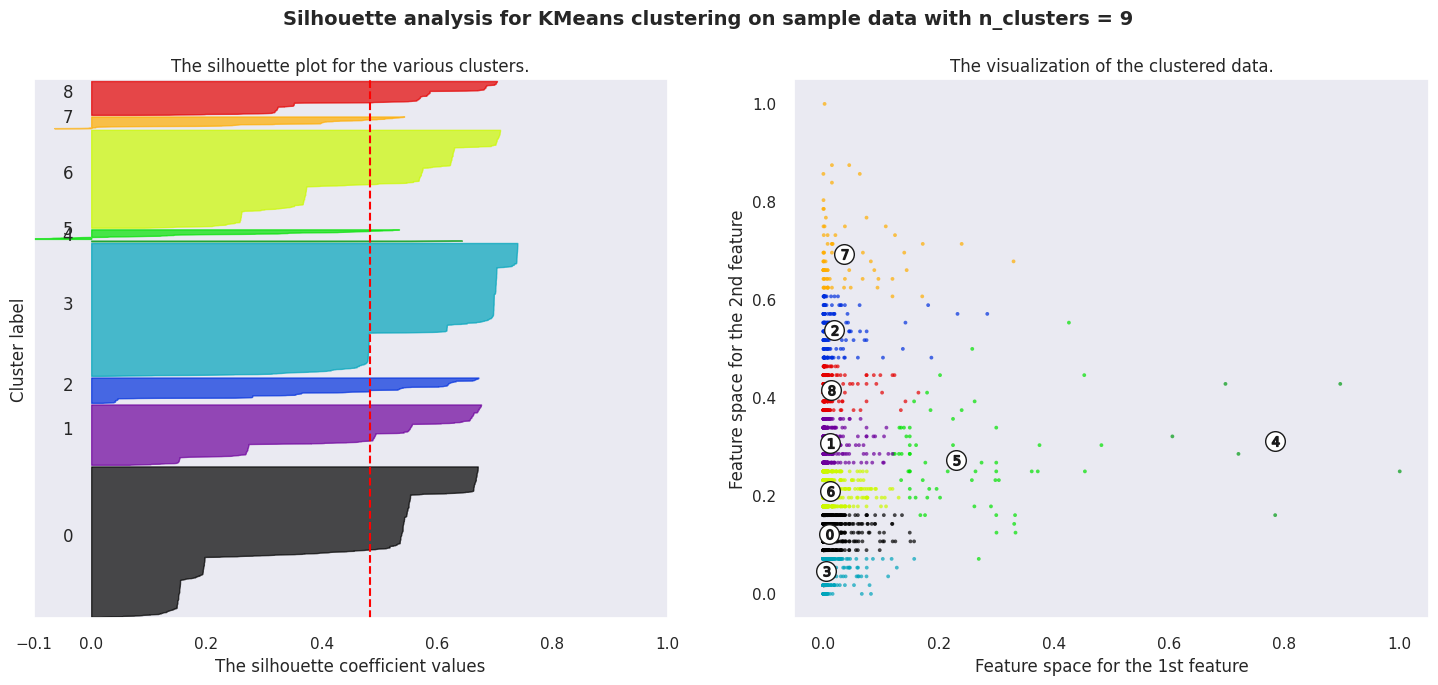

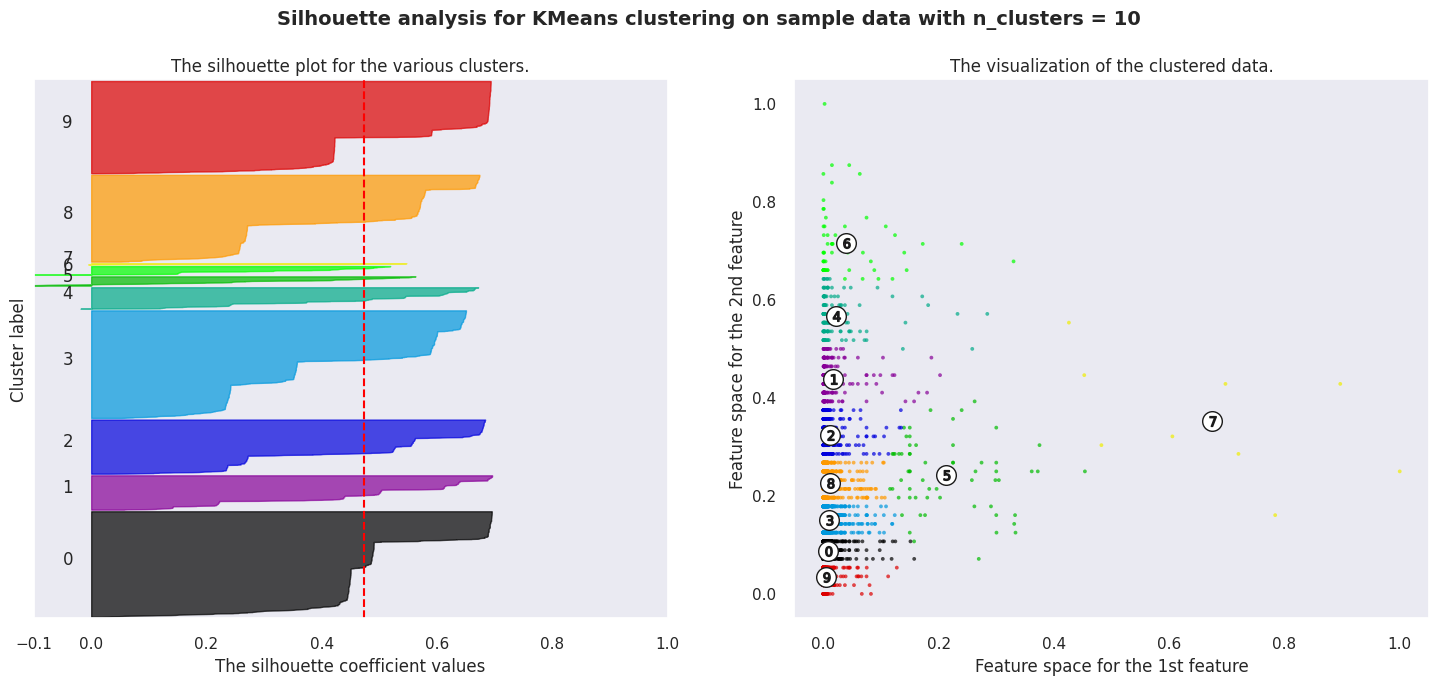

In [407]:
# silhouette analysis range between 2-7
silhoutte_analysis(cluster[['total_buy','age']],list(range(2,11)))

#it seems 3 4 and 5 could be a viable cluster number, but i personally choose 5 because it seems it divides a high purchasing user into 1 cluster

## Do The Cluster Analysis using K-Means

In [408]:
# lets use fit_predict()

# let make 5 cluster
cluster_model = KMeans(n_clusters=5)
cluster_model.fit_predict(cluster)
cluster['cluster'] = cluster_model.labels_
cluster

age  total_buy  cluster
user_id                         
1024581 0.14       0.00        2
103108  0.45       0.08        1
1035424 0.07       0.00        0
1050345 0.20       0.01        2
1062501 0.11       0.01        0
...      ...        ...      ...
979998  0.21       0.02        2
984729  0.30       0.00        1
989618  0.21       0.02        2
990466  0.29       0.01        1
997938  0.18       0.00        2

[3458 rows x 3 columns]

In [409]:
# Let's re-look into data after clustering, and it is clustered nicely
sns.scatterplot(x = 'total_buy', y = 'age', data=cluster, hue='cluster')

<AxesSubplot: xlabel='total_buy', ylabel='age'>

## Analyze the cluster

###Prepare the dataframe

In [410]:
#lets see the population spread if we use 5 segment
cluster.groupby(['cluster']).count()

age  total_buy
cluster                 
0        1512       1512
1         555        555
2        1108       1108
3         247        247
4          36         36

In [411]:
# lets check the data distribution of Age
sns.boxplot (data =cluster , x ='cluster' , y ='age')

<AxesSubplot: xlabel='cluster', ylabel='age'>

In [412]:
# lets check the data distribution of Total_buy
sns.boxplot (data =cluster , x ='cluster' , y ='total_buy')

<AxesSubplot: xlabel='cluster', ylabel='total_buy'>

In [413]:
# Make scatter plot based on cluster then mix it in one figure with a more noticeable color
ax = cluster[cluster['cluster'] == 0].plot.scatter(x='age', y='total_buy', c='blue', label='0')
ax = cluster[cluster['cluster'] == 1].plot.scatter(x='age', y='total_buy', c='orange', label='1', ax=ax)
ax = cluster[cluster['cluster'] == 2].plot.scatter(x='age', y='total_buy', c='red', label='2', ax=ax)
ax = cluster[cluster['cluster'] == 3].plot.scatter(x='age', y='total_buy', c='green', label='3', ax=ax)
ax = cluster[cluster['cluster'] == 4].plot.scatter(x='age', y='total_buy', c='purple', label='4', ax=ax)
ax

<AxesSubplot: xlabel='age', ylabel='total_buy'>

In [414]:
#lets prepare the dataframe for analysis
cluster['user_id'] = cluster.index
cluster['user_id'] = cluster['user_id'].astype('str')
cluster_user_balance_profile = monthly_user_data.merge(cluster[['cluster']], how='inner', left_on='user_id',right_on=cluster.index)
cluster_user_balance_profile

user_id user_gender  user_age user_occupation      user_income_range  \
0     1111674        Male        22          Others   B (10 Mil to 50 Mil)   
1     1111674        Male        22          Others   B (10 Mil to 50 Mil)   
2     1119474      Female        23         Student       A (Under 10 Mil)   
3     1119474      Female        23         Student       A (Under 10 Mil)   
4     1134964        Male        18         Student       A (Under 10 Mil)   
...       ...         ...       ...             ...                    ...   
5211  3933937        Male        47    Entrepreneur  C (50 Mil to 100 Mil)   
5212  3950230        Male        40  Private Sector   E (500 Mil to 1 Bil)   
5213  3965052      Female        26    Entrepreneur   B (10 Mil to 50 Mil)   
5214  3984286        Male        34    Entrepreneur       A (Under 10 Mil)   
5215  4088922        Male        53          Others   E (500 Mil to 1 Bil)   

      referral_code_used user_income_source     month  monthly_buy_Saham  \
0                  False             Salary  Aug 2021           40000.00   
1                  False             Salary  Sep 2021                NaN   
2                  False             Salary  Aug 2021           30000.00   
3                  False             Salary  Sep 2021                NaN   
4                  False             Others  Aug 2021          100000.00   
...                  ...                ...       ...                ...   
5211                True    Business Profit  Sep 2021               0.00   
5212                True             Salary  Sep 2021               0.00   
5213               False             Salary  Sep 2021               0.00   
5214               False             Salary  Sep 2021               0.00   
5215               False             Salary  Sep 2021               0.00   

      monthly_buy_Pasar_Uang  ...  EOP_Pendapatan_Tetap_AUM  \
0                       0.00  ...                      0.00   
1                        NaN  ...                      0.00   
2                   10000.00  ...                 110472.00   
3                        NaN  ...                 110707.00   
4                       0.00  ...                      0.00   
...                      ...  ...                       ...   
5211                    0.00  ...                      0.00   
5212                    0.00  ...                      0.00   
5213                    0.00  ...                      0.00   
5214                    0.00  ...                  69782.00   
5215                    0.00  ...                      0.00   

      EOP_Pendapatan_Tetap_invested_amount  EOP_Pendapatan_Tetap_profit  \
0                                     0.00                         0.00   
1                                     0.00                         0.00   
2                                110000.00                       472.00   
3                                110000.00                       707.00   
4                                     0.00                         0.00   
...                                    ...                          ...   
5211                                  0.00                         0.00   
5212                                  0.00                         0.00   
5213                                  0.00                         0.00   
5214                              70000.00                      -218.00   
5215                                  0.00                         0.00   

      EOP_Campuran_AUM  EOP_Campuran_invested_amount  EOP_Campuran_profit  \
0                 0.00                          0.00                 0.00   
1                 0.00                          0.00                 0.00   
2                 0.00                          0.00                 0.00   
3                 0.00                          0.00                 0.00   
4                 0.00                          0.00                 0.00   
...                ...              

###Checking the demography of each cluster

In [415]:
#lets prepare the data for the analysis by merging the cluster df to the main df
cluster_user_profile = cluster_user_balance_profile.copy()
list_columns = cluster_user_profile.columns.to_list()
drop_columns = list_columns[8:43]
cup = cluster_user_profile.drop(columns=drop_columns, axis = 1)

cluster_user_profile = cup.groupby(['cluster','user_id','user_gender','user_age','user_income_range','user_occupation','user_income_source','referral_code_used'],as_index=False).sum()
cluster_user_profile = cluster_user_profile.rename(columns={'month': 'count',}, errors='raise')
cluster_user_profile

cluster  user_id user_gender  user_age       user_income_range  \
0           0  1035424        Male        21    B (10 Mil to 50 Mil)   
1           0  1062501        Male        23   C (50 Mil to 100 Mil)   
2           0  1069582        Male        23   C (50 Mil to 100 Mil)   
3           0  1111674        Male        22    B (10 Mil to 50 Mil)   
4           0   111603        Male        17        A (Under 10 Mil)   
...       ...      ...         ...       ...                     ...   
3453        4  4024440      Female        31   C (50 Mil to 100 Mil)   
3454        4  4043211      Female        48   C (50 Mil to 100 Mil)   
3455        4  4045594        Male        32  D (100 Mil to 500 Mil)   
3456        4  4080962      Female        34  D (100 Mil to 500 Mil)   
3457        4  4096532        Male        27  D (100 Mil to 500 Mil)   

     user_occupation user_income_source  referral_code_used             count  
0            Student        From Family               False          Sep 2021  
1            Student             Salary               False  Sep 2021Aug 2021  
2            Student             Salary               False  Sep 2021Aug 2021  
3             Others             Salary               False  Aug 2021Sep 2021  
4            Student             Others                True          Sep 2021  
...              ...                ...                 ...               ...  
3453         Student             Salary               False          Sep 2021  
3454          Others        From Family               False          Sep 2021  
3455  Private Sector             Salary               False          Sep 2021  
3456  Private Sector             Salary               False          Sep 2021  
3457          Others             Salary                True          Sep 2021  

[3458 rows x 9 columns]

In [416]:
#check the gender proportion of each cluster
cluster_gender = cluster_user_profile.groupby(['cluster','user_gender']).count()
list_columns = cluster_gender.columns.to_list()
drop_columns = list_columns[0:6]
cluster_gender = cluster_gender.drop(columns=drop_columns, axis = 1)
cluster_gender

count
cluster user_gender       
0       Female         630
        Male           882
1       Female         237
        Male           318
2       Female         486
        Male           622
3       Female          97
        Male           150
4       Female          13
        Male            23

**Insight**

in all 5 cluster have a slightly more male than female by a ratio of 60:40

In [417]:
#check the gender proportion of each cluster
cluster_age = cluster_user_profile.groupby(['cluster']).agg(['mean','min','max'])
cluster_age

/tmp/ipykernel_4397/1655025016.py:2: FutureWarning: ['user_gender', 'user_income_range', 'user_occupation', 'user_income_source', 'count'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_age = cluster_user_profile.groupby(['cluster']).agg(['mean','min','max'])


user_id                    \
                                                      mean      min      max   
cluster                                                                        
0                                                      inf  1035424   969088   
1                                                      inf   103108   990466   
2                                                      inf  1024581   997938   
3                                                      inf  1077164   818881   
4       32920781100495059140287229386407120302321654612...  1185148  4096532   

        user_age         referral_code_used               
            mean min max               mean    min   max  
cluster                                                   
0          21.00  17  24               0.36  False  True  
1          37.06  33  43               0.27  False  True  
2          27.94  25  32               0.34  False  True  
3          49.91  44  73               0.34  False  True  
4          32.03  21  48               0.28  False  True

**Insight**

1. Cluster 0 user are 25-32 years old with average age of 28 Years old (Millenials)
2. Cluster 1 user are 44-73 years old with average age of 50 Years old (Gen X)
3. Cluster 2 user are 17-24 years old with average age of 21 Years old (Gen Z)
4. Cluster 3 user are 33-43 years old with average age of 37 Years old (Millenials)
5. Cluster 4 user are 21-48 years old with average age of 32 Years old (Mix of Gen Z and Millenials)

In [418]:
#check the income range proportion of each cluster
cluster_income_range = cluster_user_profile.groupby(['cluster','user_income_range']).count()
list_columns = cluster_income_range.columns.to_list()
drop_columns = list_columns[0:6]
cluster_income_range = cluster_income_range.drop(columns=drop_columns, axis = 1)
cluster_income_range

count
cluster user_income_range            
0       A (Under 10 Mil)          958
        B (10 Mil to 50 Mil)      426
        C (50 Mil to 100 Mil)     113
        D (100 Mil to 500 Mil)     14
        F (Over 1 Bil)              1
1       A (Under 10 Mil)           83
        B (10 Mil to 50 Mil)      176
        C (50 Mil to 100 Mil)     158
        D (100 Mil to 500 Mil)    121
        E (500 Mil to 1 Bil)       16
        F (Over 1 Bil)              1
2       A (Under 10 Mil)          259
        B (10 Mil to 50 Mil)      415
        C (50 Mil to 100 Mil)     302
        D (100 Mil to 500 Mil)    125
        E (500 Mil to 1 Bil)        7
3       A (Under 10 Mil)           43
        B (10 Mil to 50 Mil)       59
        C (50 Mil to 100 Mil)      64
        D (100 Mil to 500 Mil)     66
        E (500 Mil to 1 Bil)       13
        F (Over 1 Bil)              2
4       A (Under 10 Mil)            4
        B (10 Mil to 50 Mil)       10
        C (50 Mil to 100 Mil)       8
        D (100 Mil to 500 Mil)     12
        F (Over 1 Bil)              2

In [419]:
#check the common occupation of each cluster
cluster_occupation = cluster_user_profile.groupby(['cluster','user_occupation']).count()
list_columns = cluster_occupation.columns.to_list()
drop_columns = list_columns[0:6]
cluster_occupation = cluster_occupation.drop(columns=drop_columns, axis = 1)
cluster_occupation

count
cluster user_occupation         
0       Entrepreneur           7
        Government Sector      1
        Others               115
        Private Sector        61
        Student             1328
1       Entrepreneur          48
        Government Sector     40
        Others               114
        Private Sector       332
        Student               21
2       Entrepreneur          46
        Government Sector     25
        Others               195
        Private Sector       337
        Student              505
3       Entrepreneur          25
        Government Sector     19
        Others                73
        Private Sector       129
        Retired                1
4       Entrepreneur           3
        Government Sector      2
        Others                 7
        Private Sector        12
        Student               12

In [420]:
#check the income source proportion of each cluster
cluster_income_source = cluster_user_profile.groupby(['cluster','user_income_source']).count()
list_columns = cluster_income_source.columns.to_list()
drop_columns = list_columns[0:6]
cluster_income_source = cluster_income_source.drop(columns=drop_columns, axis = 1)
cluster_income_source

count
cluster user_income_source          
0       Business Profit          134
        From Family               91
        Others                   466
        Salary                   743
        Savings or Investment     78
1       Business Profit           67
        From Family               51
        Others                    21
        Salary                   408
        Savings or Investment      8
2       Business Profit           88
        From Family               71
        Others                    35
        Salary                   896
        Savings or Investment     18
3       Business Profit           34
        From Family               27
        Others                    15
        Salary                   158
        Savings or Investment     13
4       Business Profit            3
        From Family                4
        Others                     1
        Salary                    28

In [421]:
#check the referral code uses of each cluster
cluster_referral = cluster_user_profile.groupby(['cluster','referral_code_used']).count()
list_columns = cluster_referral.columns.to_list()
drop_columns = list_columns[0:6]
cluster_referral = cluster_referral.drop(columns=drop_columns, axis = 1)
cluster_referral

count
cluster referral_code_used       
0       False                 974
        True                  538
1       False                 405
        True                  150
2       False                 732
        True                  376
3       False                 162
        True                   85
4       False                  26
        True                   10

**Insight**

Cluster 0 and 1 have the most user that uses referral when register

### Checking the transaction behaviour of each cluster

In [422]:
#check the monthly buy of each cluster
cluster_transaction = cluster_user_balance_profile.copy()
mtb = cluster_transaction[['user_id','cluster','monthly_total_buy']]
monthly_transaction_buys = mtb.groupby(['cluster','user_id'],as_index=False).mean()
monthly_transaction_buy = monthly_transaction_buys[monthly_transaction_buys['monthly_total_buy']> 0]
monthly_transaction_buy.groupby(['cluster']).agg(['mean','min','max'])

user_id                    \
                                                      mean      min      max   
cluster                                                                        
0                                                      inf  1035424   969088   
1                                                      inf   103108   990466   
2                                                      inf  1024581   997938   
3                                                      inf  1077164   818881   
4       32920781100495059140287229386407120302321654612...  1185148  4096532   

        monthly_total_buy                          
                     mean         min         max  
cluster                                            
0               525596.52      443.00 13760000.00  
1              1284443.61      114.00 20000000.00  
2              1075474.22      443.00 24500000.00  
3              1912261.85    10000.00 22000000.00  
4             27802814.96 14387500.00 66650895.00

In [423]:
#check the monthly transaction frequency of each cluster
cluster_frequency = cluster_user_balance_profile.copy()
mtb = cluster_transaction[['user_id','cluster','monthly_total_transaction_frequency']]
monthly_cluster_transaction = mtb.groupby(['cluster','user_id'],as_index=False).mean()
monthly_cluster_transaction.groupby(['cluster']).mean()

/tmp/ipykernel_4397/3153519954.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_cluster_transaction.groupby(['cluster']).mean()


monthly_total_transaction_frequency
cluster                                     
0                                       1.79
1                                       1.99
2                                       1.86
3                                       2.06
4                                       4.29

In [424]:
#check the monthly sell of each cluster
cluster_sell = cluster_user_balance_profile.copy()
mtb = cluster_sell[['user_id','cluster','monthly_total_sell']]
monthly_cluster_sells = mtb.groupby(['cluster','user_id'],as_index=False).mean()
monthly_cluster_sell = monthly_cluster_sells[monthly_cluster_sells['monthly_total_sell']< 0]
monthly_cluster_sell.groupby(['cluster']).agg(['mean','min','max'])

user_id                    \
                                                      mean      min      max   
cluster                                                                        
0                                                      inf  1111674   958636   
1                                                      inf  1120478   984729   
2                                                      inf  1024581   979998   
3                                                      inf  1077164  4102325   
4       98762343301485404258153605655162888495854488149...  1185148  4045594   

        monthly_total_sell                          
                      mean          min        max  
cluster                                             
0               -461350.29 -16250000.00   -4310.50  
1               -894273.00 -20000000.00   -7500.00  
2               -788333.81 -20000000.00   -5000.00  
3              -1427711.20 -20000000.00   -2000.00  
4             -13022712.79 -37000000.00 -190000.00

In [425]:
#check the common mutual funds allocation of each cluster
cluster_AUM = cluster_user_balance_profile.copy()
mtb = cluster_AUM[['user_id','cluster','EOP_Saham_AUM','EOP_Pasar_Uang_AUM','EOP_Pendapatan_Tetap_AUM','EOP_Campuran_AUM']]
monthly_cluster_AUM = mtb.groupby(['cluster','user_id'],as_index=False).mean()
monthly_cluster_AUM.groupby(['cluster'],as_index=False).mean()

/tmp/ipykernel_4397/3830974283.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_cluster_AUM.groupby(['cluster'],as_index=False).mean()


cluster  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  EOP_Pendapatan_Tetap_AUM  \
0        0      214744.49           291676.07                 311825.04   
1        1      649630.11           592109.80                 647551.18   
2        2      445108.46           610107.22                 758006.25   
3        3      852205.54           662723.15                1264237.91   
4        4     4996217.47          7406213.08               13022662.99   

   EOP_Campuran_AUM  
0          49104.67  
1         287423.11  
2         106987.84  
3         277923.61  
4        4420850.76

In [426]:
ctum = cluster_user_balance_profile.copy()
cluster_total_AUM = ctum[['user_id','cluster','EOP_total_AUM']]
monthly_cluster_total_AUM = cluster_total_AUM.groupby(['cluster','user_id'],as_index=False).mean()
monthly_cluster_total_AUM.groupby(['cluster'],as_index=False).agg(['mean','min','max'])

user_id                    \
                                                      mean      min      max   
cluster                                                                        
0                                                      inf  1035424   969088   
1                                                      inf   103108   990466   
2                                                      inf  1024581   997938   
3                                                      inf  1077164   818881   
4       32920781100495059140287229386407120302321654612...  1185148  4096532   

        EOP_total_AUM                   
                 mean  min         max  
cluster                                 
0           867350.28 0.00 27148456.50  
1          2176714.20 0.00 49131564.00  
2          1920209.77 0.00 51168377.00  
3          3057090.21 0.00 35621545.00  
4         29845944.31 0.00 54419061.00

**Insight Compile**
1. Cluster 0 (The Early Millenials Investor) (Persona Rachel from Friends)
  *  Consist of 32.04% of user that purchase mutual funds in the last 2 month
  *   Millenials 25-32 years old with average age of 28 Years old
  *   Have an income-range predominantly from 10-100 Million
  *   Mostly still a student or work in a private sector
  *   Investing in a mutual funds on average IDR 1.075.474 per-month
  *   They sell 5000 to 20.000.000 of their mutual funds per-month
  *   On average they do 1.86 transaction each month
  *   On average they have IDR 1.920.209 Total AUM in the end of period
  *   Profited from -69.959 to 266.401 with average of 301.44
  *   Prefer investment that have low and moderate risk
  *   Moderately Conservative risk profile

2. Cluster 1 (The Middle-Age Gen X Investor) (Persona as Ross from Friends)
  *  Consist of 7.14% of user that purchase mutual funds in the last 2 month
  *   Gen X 44-73 years old with average age of 50 Years old  
  *   Have an income-range predominantly from 10-100 Million
  *   Mostly work in a private sector
  *   33% uses referral when registering
  *   Investing in a mutual funds on average IDR 1.912.261 per-month
  *   On average they sell 427.735 of their mutual funds investment per-month
  *   On average they do 2.06 transaction each month
  *   On average they have IDR 2.176.714 Total AUM in the end of period
  *   Profited from -177.689 to	68.383 with average of -630.70
  *   Prefer investment that have moderate and high risk
  *   Moderately Aggresive risk profile

3. Cluster 2 (The Gen Z Zoomer Investor) (Persona as Joey from Friends)
  *  Consist of 43.72% of user that purchase mutual funds in the last 2 month
  *   Gen Z 17-24 years old with average age of 21 Years old
  *   Have an income-range predominantly under 10 Million
  *   Mostly still a Student
  *   35% uses referral when registering
  *   Investing in a mutual funds on average IDR 525.596 per-month
  *   On average they sell 176.667 of their mutual funds investment per-month
  *   On average they do 1.79 transaction each month
  *   On average they have IDR 867.350 Total AUM in the end of period
  *   Profited from -868.066 to	129.848 with average of -463.46
  *   Prefer investment that have moderate risk
  *   Moderate risk profile

4. Cluster 4 (The Late Millenials Investor) (Persona as Monica from Friends)
  *  Consist of 16.04% of user that purchase mutual funds in the last 2 month
  *   Millenials 33-43 years old with average age of 37 Years old
  *   Have an income-range predominantly from 10-500 Million
  *   Mostly work in a private sector but a big percentage of this cluster also own a business or working for the goverment
  *   Investing in a mutual funds on average IDR 1.284.443 per-month
  *   On average they sell 261.031 of their mutual funds investment per-month
  *   On average they do 1.99 transaction each month
  *   On average they have IDR 3.057.090 Total AUM in the end of period
  *   Profited from -101.058 to	227.855 with average of 280.23
  *   Prefer investment that have moderate risk
  *   Moderate risk profile

5. Cluster 3  (The Young Sultan Investor) (Persona as Chandler from Friends)
  *  Consist of 1.04% of user that purchase mutual funds in the last 2 month
  *   Mix of Gen Z and Millenials that are 21-48 years old with average age of 32 Years old
  *   Have an income-range predominantly from 10-500 Million
  *   Mostly still as a student or work in a private sector worker
  *   Investing in a mutual funds on average IDR 27.802.814 per-month
  *   On average they sell 4.340.904 of their mutual funds investment per-month
  *   On average they do 4.29 transaction each month
  *   On average they have IDR 29.845.944 Total AUM in the end of period
  *   Profited from -30.093 to 263.398 with average of  11.512
  *   Prefer investment that have low to moderate risk
  *   Moderately Conservative risk profile

#**F) Logistic Regression (to forecast how much user will buy Govt. Bonds)**


##Prepare the Data For The September Log-Reg Analysis

In [427]:
!ls /datasets/govtbond

'govt_bond_result_sep21 - govt_bond_result_sep21.csv'


In [429]:
#lets load the bond table to Python first and make it a dataframe
bond = pd.read_csv("/datasets/govtbond/govt_bond_result_sep21 - govt_bond_result_sep21.csv")
bond['user_id'] = bond['user_id'].astype('str') #change the type to string, because in the previous task i did this too
bond.info()
bond

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             8484 non-null   object
 1   flag_order_bond     8484 non-null   int64 
 2   bond_units_ordered  8484 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 199.0+ KB


user_id  flag_order_bond  bond_units_ordered
0       50701                1                  34
1       50961                1                  99
2       51883                0                   0
3       53759                0                   0
4       54759                1                  92
...       ...              ...                 ...
8479  4173878                0                   0
8480  4174045                0                   0
8481  4174169                0                   0
8482  4174486                0                   0
8483  4174772                0                   0

[8484 rows x 3 columns]

In [430]:
september_user_data1 = monthly_user_data[monthly_user_data['month'] == 'Sep 2021']
september_user_data2 = september_user_data1.merge(user_clean[['user_id','registration_import_datetime']],how='inner', on='user_id')
september_user_data = september_user_data2.merge(bond[['user_id','flag_order_bond']],how='inner', on='user_id')
september_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8219 entries, 0 to 8218
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   user_id                                         8219 non-null   object        
 1   user_gender                                     8219 non-null   object        
 2   user_age                                        8219 non-null   int64         
 3   user_occupation                                 8219 non-null   object        
 4   user_income_range                               8219 non-null   object        
 5   referral_code_used                              8219 non-null   bool          
 6   user_income_source                              8219 non-null   object        
 7   month                                           8219 non-null   object        
 8   monthly_buy_Saham                               

In [431]:
#lets calculate user vintage for september
september_user_vintage = september_user_data[['user_id','registration_import_datetime']]
september_user_vintage['date'] = '2021-09-30'
september_user_vintage['date'] = pd.to_datetime(september_user_vintage['date'])
september_user_vintage['user_vintage'] = ((september_user_vintage['date'] - september_user_vintage['registration_import_datetime'])/np.timedelta64(1, 'M'))
september_user_vintage['user_vintage'] = september_user_vintage['user_vintage'].astype('int')
september_user_vintage

/tmp/ipykernel_4397/2552460922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_user_vintage['date'] = '2021-09-30'
/tmp/ipykernel_4397/2552460922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_user_vintage['date'] = pd.to_datetime(september_user_vintage['date'])
/tmp/ipykernel_4397/2552460922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

user_id registration_import_datetime       date  user_vintage
0      103108          2021-08-24 21:49:39 2021-09-30             1
1     1035424          2021-08-31 23:46:22 2021-09-30             0
2     1050345          2021-08-15 21:34:28 2021-09-30             1
3     1062501          2021-08-01 16:09:29 2021-09-30             1
4     1098153          2021-08-27 11:47:31 2021-09-30             1
...       ...                          ...        ...           ...
8214   975052          2021-08-01 06:28:48 2021-09-30             1
8215   978972          2021-09-14 13:46:35 2021-09-30             0
8216   981852          2021-09-10 14:42:40 2021-09-30             0
8217   988940          2021-09-01 10:27:25 2021-09-30             0
8218    99245          2021-09-09 20:20:43 2021-09-30             0

[8219 rows x 4 columns]

In [432]:
#Lets calculate the profit rate on September EOP
september_user_profit_rate = september_user_data[['user_id','EOP_total_profit','EOP_total_invested_amount']]
september_user_profit_rate['EOP_profit_rate'] = (september_user_profit_rate['EOP_total_profit']/september_user_profit_rate['EOP_total_invested_amount'])*100
september_user_profit_rate = september_user_profit_rate.fillna(0)
september_user_profit_rate

/tmp/ipykernel_4397/4259549217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_user_profit_rate['EOP_profit_rate'] = (september_user_profit_rate['EOP_total_profit']/september_user_profit_rate['EOP_total_invested_amount'])*100


user_id  EOP_total_profit  EOP_total_invested_amount  EOP_profit_rate
0      103108         200837.00                 6000000.00             3.35
1     1035424           2952.00                  147000.00             2.01
2     1050345           8711.00                 1500000.00             0.58
3     1062501          13464.00                 1050000.00             1.28
4     1098153           2073.00                  300000.00             0.69
...       ...               ...                        ...              ...
8214   975052              0.00                       0.00             0.00
8215   978972           1884.00                  100000.00             1.88
8216   981852            132.00                  100000.00             0.13
8217   988940           1937.00                  500000.00             0.39
8218    99245           2610.00                 1000000.00             0.26

[8219 rows x 4 columns]

In [433]:
#lets drop the column that we wont use like month and registration dateline befor
september_corr = september_user_data.copy()
list_columns = september_corr.columns.to_list()
drop_columns1 = list_columns[7:12]
september_corr = september_corr.drop(columns=drop_columns1, axis = 1)

drop_columns2 = list_columns[13:17]
september_corr = september_corr.drop(columns=drop_columns2, axis = 1)

drop_columns3 = list_columns[18:27]
september_corr = september_corr.drop(columns=drop_columns3, axis = 1)

drop_columns4 = list_columns[29:31]
september_corr = september_corr.drop(columns=drop_columns4, axis = 1)

drop_columns5 = list_columns[32:34]
september_corr = september_corr.drop(columns=drop_columns5, axis = 1)

drop_columns6 = list_columns[35:37]
september_corr = september_corr.drop(columns=drop_columns6, axis = 1)

drop_columns7 = list_columns[38:40]
september_corr = september_corr.drop(columns=drop_columns7, axis = 1)

september_corr = september_corr.drop(columns=['EOP_total_AUM','EOP_total_profit','monthly_total_transaction_frequency','registration_import_datetime'], axis = 1)

september_corr.head()


user_id user_gender  user_age user_occupation       user_income_range  \
0   103108        Male        42  Private Sector    E (500 Mil to 1 Bil)   
1  1035424        Male        21         Student    B (10 Mil to 50 Mil)   
2  1050345        Male        28  Private Sector  D (100 Mil to 500 Mil)   
3  1062501        Male        23         Student   C (50 Mil to 100 Mil)   
4  1098153        Male        39  Private Sector  D (100 Mil to 500 Mil)   

   referral_code_used user_income_source  monthly_total_buy  \
0               False             Salary         5000000.00   
1               False        From Family           47000.00   
2               False             Salary         1000000.00   
3               False             Salary          850000.00   
4               False             Salary          200000.00   

   monthly_total_sell  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
0                0.00     5759629.00           100412.00   
1                0.00      100116.00            10021.00   
2                0.00      208028.00           270384.00   
3                0.00      293433.00           270936.00   
4                0.00      112345.00            30051.00   

   EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
0                 340796.00              0.00                 6000000.00   
1                  39815.00              0.00                  147000.00   
2                1030299.00              0.00                 1500000.00   
3                 499095.00              0.00                 1050000.00   
4                 159677.00              0.00                  300000.00   

   flag_order_bond  
0                1  
1                0  
2                0  
3                0  
4                1

In [434]:
#lets merge the profit and user vintage dataframe
september_dt1 = september_corr.merge(september_user_vintage[['user_id','user_vintage']],how='inner',on='user_id')
september_dt = september_dt1.merge(september_user_profit_rate[['user_id','EOP_profit_rate']], how='inner',on='user_id')
september_dt = september_dt.fillna(0)
september_dt.info()
september_dt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8219 entries, 0 to 8218
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    8219 non-null   object 
 1   user_gender                8219 non-null   object 
 2   user_age                   8219 non-null   int64  
 3   user_occupation            8219 non-null   object 
 4   user_income_range          8219 non-null   object 
 5   referral_code_used         8219 non-null   bool   
 6   user_income_source         8219 non-null   object 
 7   monthly_total_buy          8219 non-null   float64
 8   monthly_total_sell         8219 non-null   float64
 9   EOP_Saham_AUM              8219 non-null   float64
 10  EOP_Pasar_Uang_AUM         8219 non-null   float64
 11  EOP_Pendapatan_Tetap_AUM   8219 non-null   float64
 12  EOP_Campuran_AUM           8219 non-null   float64
 13  EOP_total_invested_amount  8219 non-null   float

user_id user_gender  user_age user_occupation       user_income_range  \
0   103108        Male        42  Private Sector    E (500 Mil to 1 Bil)   
1  1035424        Male        21         Student    B (10 Mil to 50 Mil)   
2  1050345        Male        28  Private Sector  D (100 Mil to 500 Mil)   
3  1062501        Male        23         Student   C (50 Mil to 100 Mil)   
4  1098153        Male        39  Private Sector  D (100 Mil to 500 Mil)   

   referral_code_used user_income_source  monthly_total_buy  \
0               False             Salary         5000000.00   
1               False        From Family           47000.00   
2               False             Salary         1000000.00   
3               False             Salary          850000.00   
4               False             Salary          200000.00   

   monthly_total_sell  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
0                0.00     5759629.00           100412.00   
1                0.00      100116.00            10021.00   
2                0.00      208028.00           270384.00   
3                0.00      293433.00           270936.00   
4                0.00      112345.00            30051.00   

   EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
0                 340796.00              0.00                 6000000.00   
1                  39815.00              0.00                  147000.00   
2                1030299.00              0.00                 1500000.00   
3                 499095.00              0.00                 1050000.00   
4                 159677.00              0.00                  300000.00   

   flag_order_bond  user_vintage  EOP_profit_rate  
0                1             1             3.35  
1                0             0             2.01  
2                0             1             0.58  
3                0             1             1.28  
4                1             1             0.69

### September data transformation and outlier cleaning

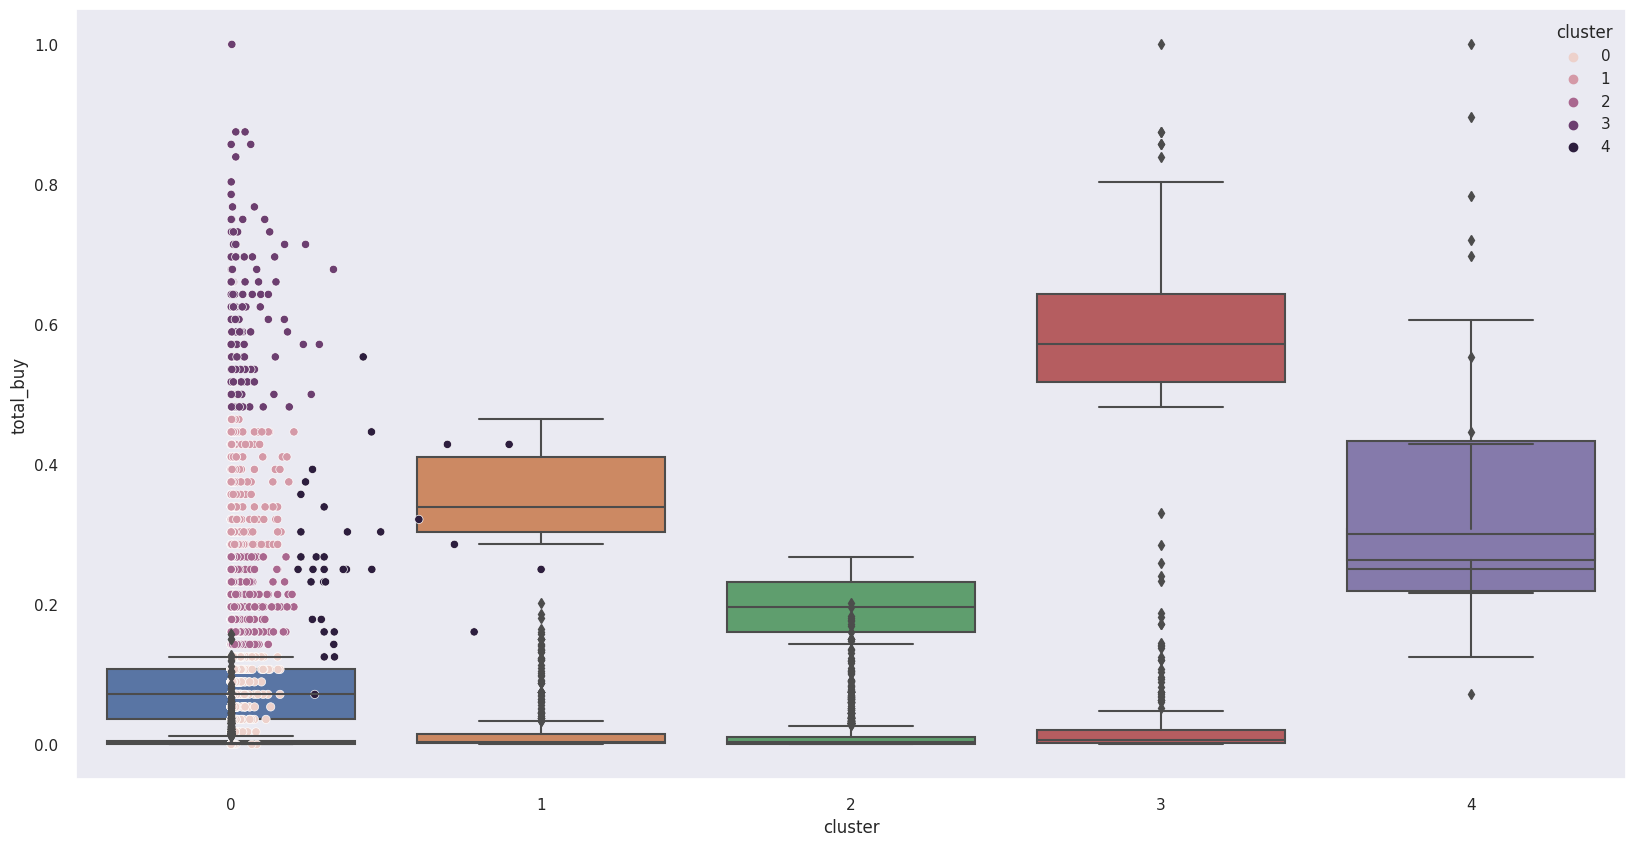

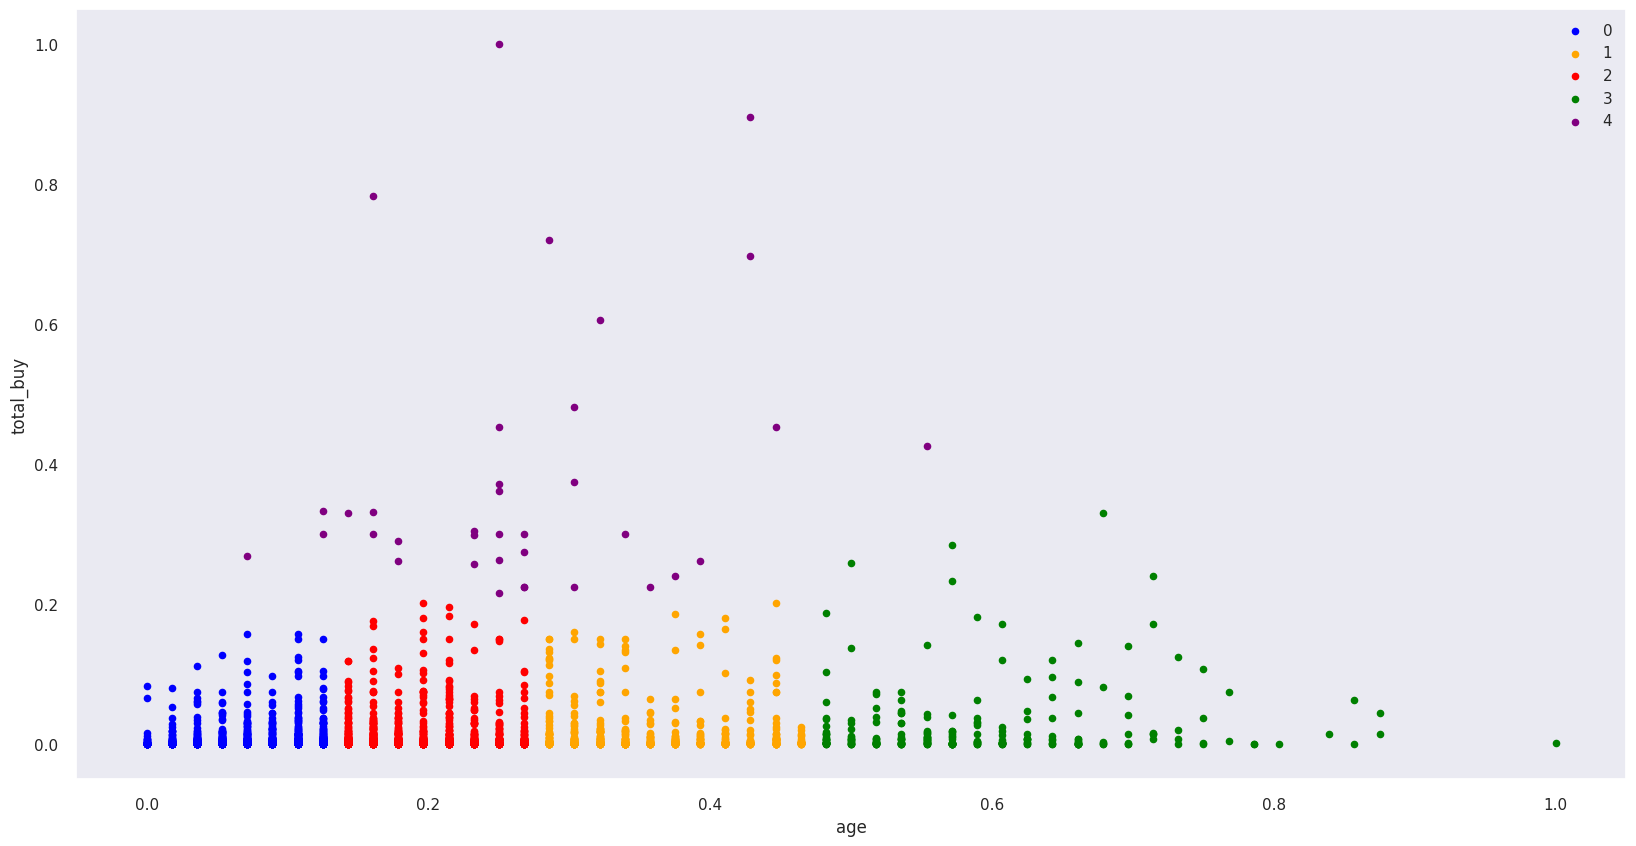

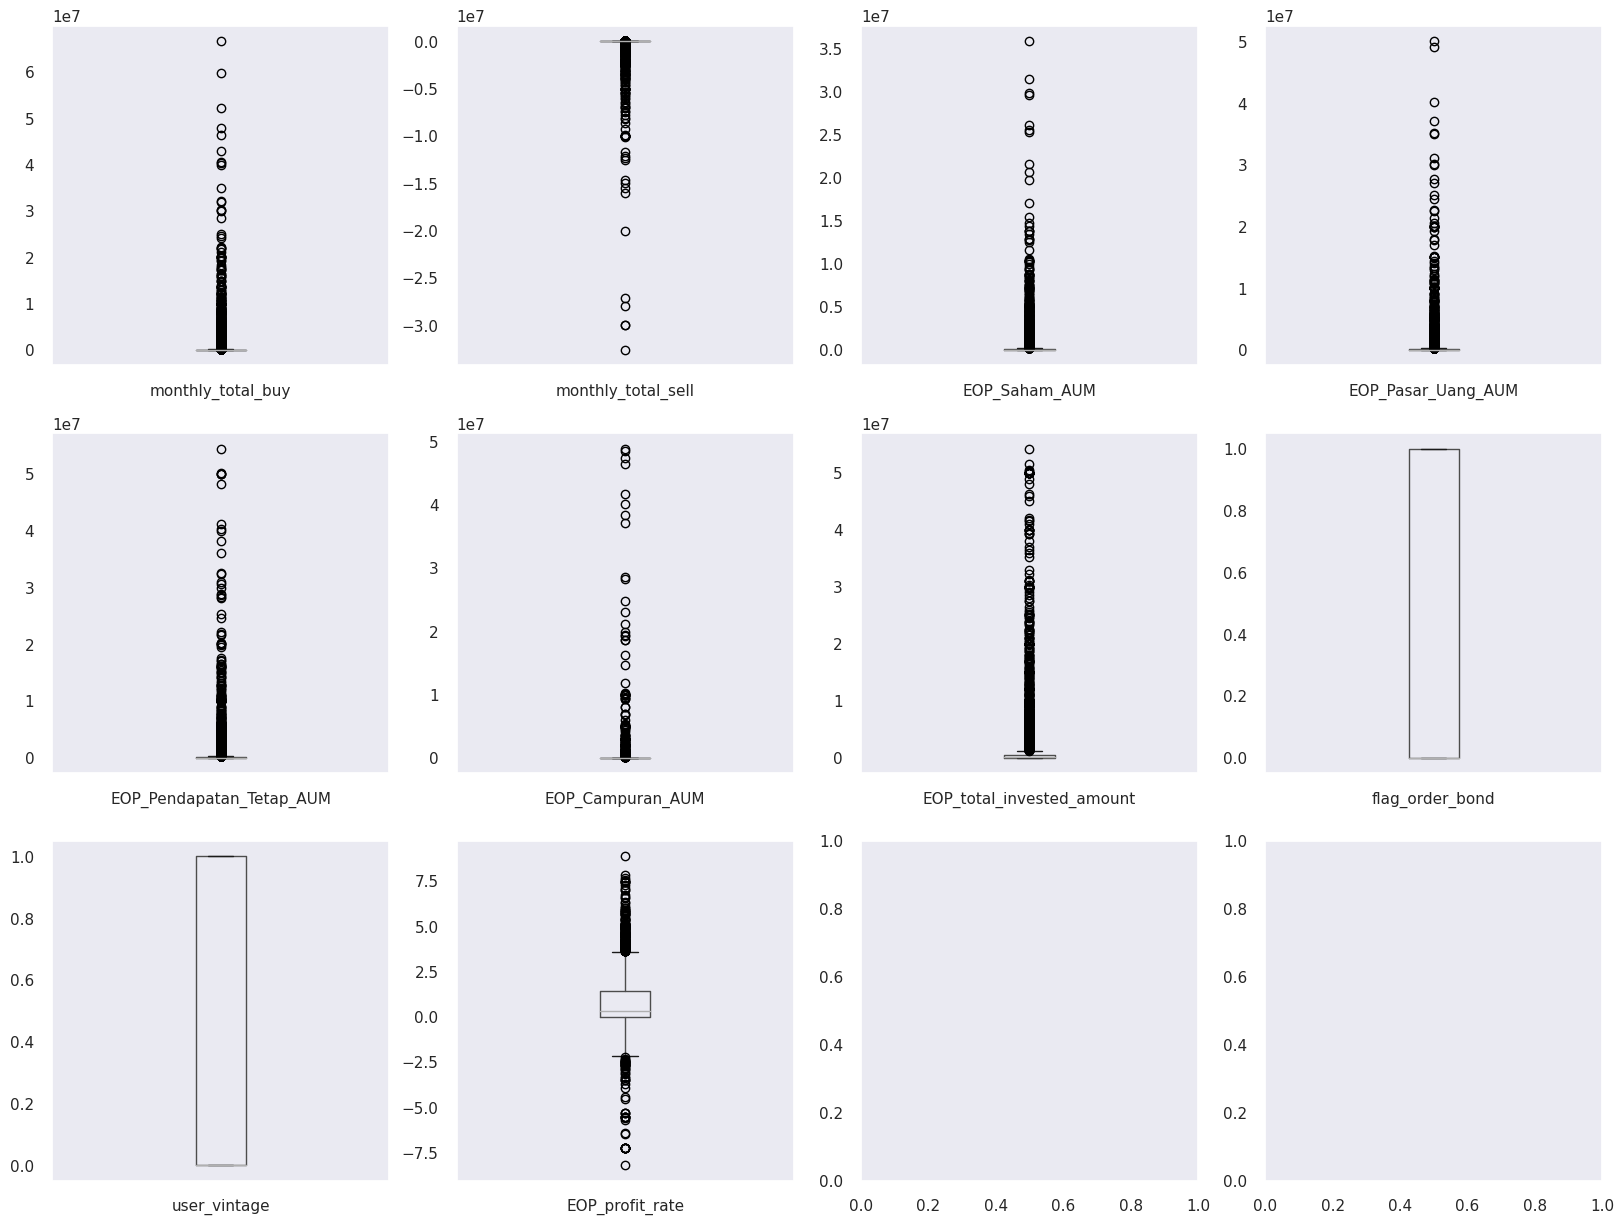

In [435]:
numerical_column = september_dt[['monthly_total_buy','monthly_total_sell','EOP_Saham_AUM','EOP_Pasar_Uang_AUM','EOP_Pendapatan_Tetap_AUM','EOP_Campuran_AUM',
                                         'EOP_total_invested_amount','flag_order_bond','user_vintage','EOP_profit_rate']]

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,15))
for i,el in enumerate(numerical_column):
    a = september_dt.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

#there is still a bit of outlier in the dataframe

In [436]:
#lets calculate the z-score
september_dt['z_score']= (september_dt['EOP_total_invested_amount'] - september_dt['EOP_total_invested_amount'].mean())/september_dt['EOP_total_invested_amount'].std()

#lets see the outlier in form of z-score
september_dt.boxplot(column=['z_score'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

<AxesSubplot: >

In [437]:
# lets check which row is considered an outlier (it means that the z-score is higher than 2 or lower than -2)
september_dt_outlier_user = september_dt[(september_dt['z_score'] > 1) | (september_dt['z_score'] < -1)]


#there is 276 row that has an abundant transaction, in which the user is considered an outlier
september_dt_outlier_user

user_id user_gender  user_age user_occupation       user_income_range  \
0      103108        Male        42  Private Sector    E (500 Mil to 1 Bil)   
5     1116654      Female        34  Private Sector  D (100 Mil to 500 Mil)   
13    1196178        Male        26         Student    B (10 Mil to 50 Mil)   
18    1252523        Male        30  Private Sector  D (100 Mil to 500 Mil)   
21    1275820      Female        48  Private Sector  D (100 Mil to 500 Mil)   
...       ...         ...       ...             ...                     ...   
7816  4134353      Female        51          Others    B (10 Mil to 50 Mil)   
7976  4148792      Female        55          Others    B (10 Mil to 50 Mil)   
7984  4149237      Female        42          Others    B (10 Mil to 50 Mil)   
7989  4149382        Male        27  Private Sector  D (100 Mil to 500 Mil)   
8152    50701      Female        28          Others    B (10 Mil to 50 Mil)   

      referral_code_used user_income_source  monthly_total_buy  \
0                  False             Salary         5000000.00   
5                  False             Salary         4000000.00   
13                 False             Salary        13020000.00   
18                 False             Salary         2500000.00   
21                 False             Salary         4390000.00   
...                  ...                ...                ...   
7816                True             Salary               0.00   
7976                True             Salary               0.00   
7984               False    Business Profit               0.00   
7989               False             Salary               0.00   
8152               False             Salary               0.00   

      monthly_total_sell  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
0                   0.00     5759629.00           100412.00   
5                   0.00     1223796.00          1254724.00   
13                  0.00     5923745.00          4777148.00   
18                  0.00     3666697.00          1042682.00   
21                  0.00     2380983.00          1663125.00   
...                  ...            ...                 ...   
7816                0.00           0.00                0.00   
7976                0.00           0.00                0.00   
7984                0.00      102153.00          5361608.00   
7989                0.00    13768024.00           500197.00   
8152                0.00           0.00                0.00   

      EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
0                    340796.00              0.00                 6000000.00   
5                   4063882.00              0.00                 6500000.00   
13                 28833510.00              0.00                39219402.00   
18                  2950333.00              0.00                 7500000.00   
21                  1803302.00              0.00                 5790000.00   
...                        ...               ...                        ...   
7816               50031306.00              0.00                50000000.00   
7976               10004608.00              0.00                10000000.00   
7984                 538711.00              0.00                 6000000.00   
7989                 996981.00              0.00                15000000.00   
8152                      0.00        9943587.00                10000000.00   

      flag_order_bond  user_vintage  EOP_profit_rate  z_score  
0                   1             1             3.35     1.08  
5                   1             1             0.65     1.19  
13                  1             1             0.80     8.57  
18                  1             0             2.13     1.42  
21                  0             1             0.99     1.03  
...               ...           ...              ...      ...  
7816                1             0             0.06    11.00  
7976                1             0           

In [438]:
#lets filter out the
september_dt_no_outlier = september_dt[~(september_dt['z_score'] > 1) | (september_dt['z_score'] < -1)]
september_dt_no_outlier = september_dt_no_outlier.drop(columns='z_score', axis = 1)
september_dt_no_outlier

user_id user_gender  user_age user_occupation       user_income_range  \
1     1035424        Male        21         Student    B (10 Mil to 50 Mil)   
2     1050345        Male        28  Private Sector  D (100 Mil to 500 Mil)   
3     1062501        Male        23         Student   C (50 Mil to 100 Mil)   
4     1098153        Male        39  Private Sector  D (100 Mil to 500 Mil)   
6     1120478        Male        37  Private Sector    B (10 Mil to 50 Mil)   
...       ...         ...       ...             ...                     ...   
8214   975052        Male        37  Private Sector  D (100 Mil to 500 Mil)   
8215   978972        Male        22         Student        A (Under 10 Mil)   
8216   981852      Female        23  Private Sector   C (50 Mil to 100 Mil)   
8217   988940        Male        27  Private Sector    B (10 Mil to 50 Mil)   
8218    99245        Male        25         Student        A (Under 10 Mil)   

      referral_code_used user_income_source  monthly_total_buy  \
1                  False        From Family           47000.00   
2                  False             Salary         1000000.00   
3                  False             Salary          850000.00   
4                  False             Salary          200000.00   
6                  False             Salary          100000.00   
...                  ...                ...                ...   
8214               False             Salary               0.00   
8215               False             Salary               0.00   
8216               False             Salary               0.00   
8217               False             Salary               0.00   
8218               False             Salary               0.00   

      monthly_total_sell  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
1                   0.00      100116.00            10021.00   
2                   0.00      208028.00           270384.00   
3                   0.00      293433.00           270936.00   
4                   0.00      112345.00            30051.00   
6             -300000.00      103205.00                0.00   
...                  ...            ...                 ...   
8214                0.00           0.00                0.00   
8215                0.00       61923.00            10012.00   
8216                0.00           0.00           100132.00   
8217                0.00       51610.00           290353.00   
8218                0.00           0.00           500940.00   

      EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
1                     39815.00              0.00                  147000.00   
2                   1030299.00              0.00                 1500000.00   
3                    499095.00              0.00                 1050000.00   
4                    159677.00              0.00                  300000.00   
6                         0.00              0.00                  100000.00   
...                        ...               ...                        ...   
8214                      0.00              0.00                       0.00   
8215                  29949.00              0.00                  100000.00   
8216                      0.00              0.00                  100000.00   
8217                 159974.00              0.00                  500000.00   
8218                 501670.00              0.00                 1000000.00   

      flag_order_bond  user_vintage  EOP_profit_rate  
1                   0             0             2.01  
2                   0             1             0.58  
3                   0             1             1.28  
4                   1             1             0.69  
6                   1             0             3.21  
...               ...           ...              ...  
8214                0             1             0.00  
8215                0             0             1.88  
8216                0             0             0.13  
8217    

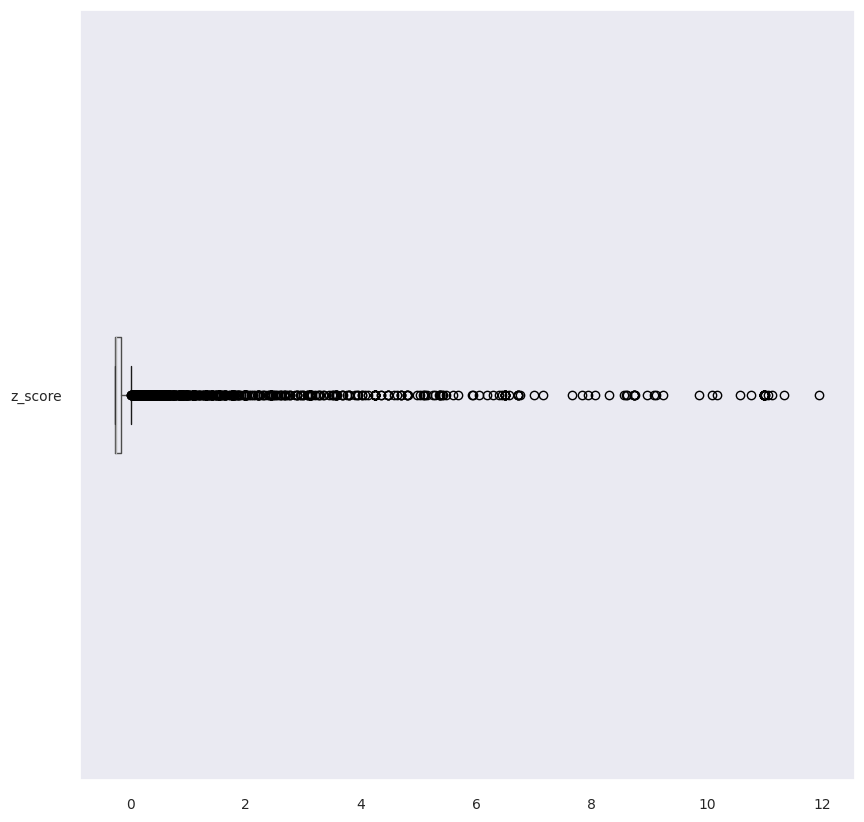

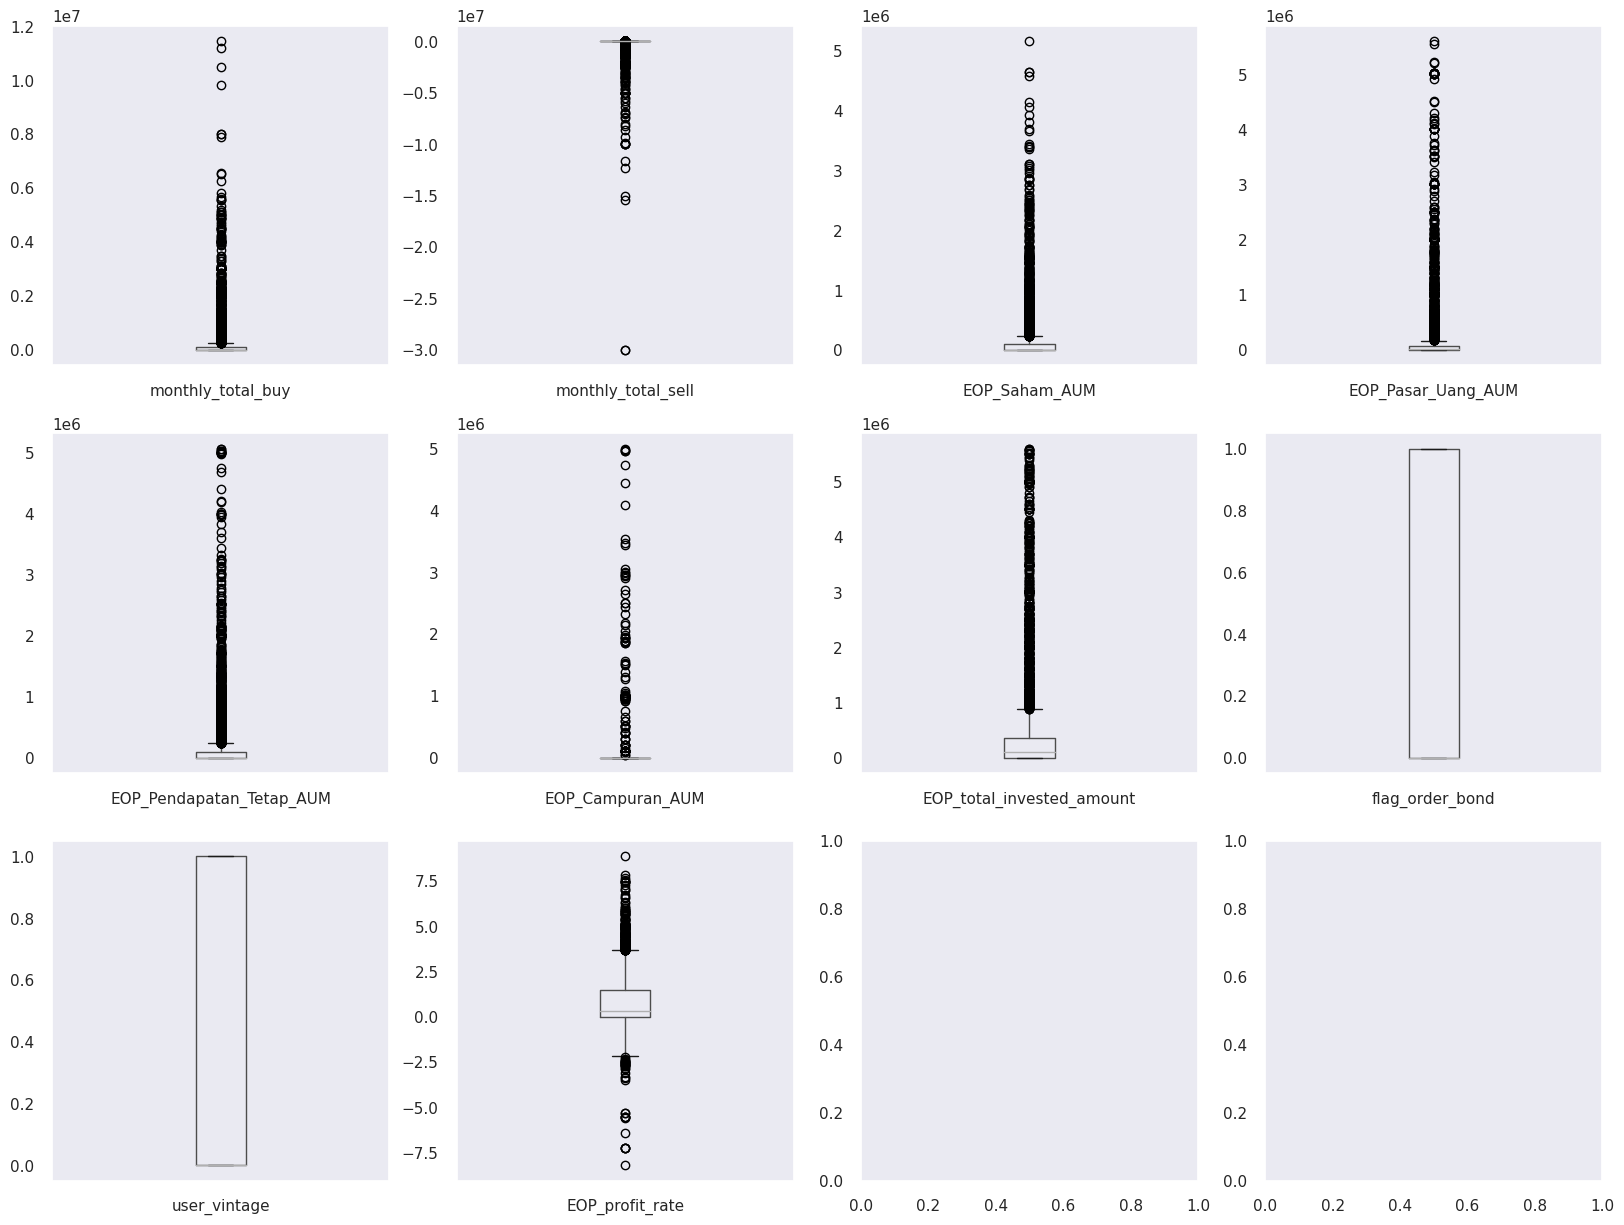

In [439]:
numerical_column = september_dt_no_outlier[['monthly_total_buy','monthly_total_sell','EOP_Saham_AUM','EOP_Pasar_Uang_AUM','EOP_Pendapatan_Tetap_AUM','EOP_Campuran_AUM',
                                         'EOP_total_invested_amount','flag_order_bond','user_vintage','EOP_profit_rate']]

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,15))
for i,el in enumerate(numerical_column):
    a = september_dt_no_outlier.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

#much better

In [440]:
september_dt_no_outlier.info()

grouped = september_dt_no_outlier.groupby('flag_order_bond',as_index=False).agg('count')['user_id']
grouped = pd.DataFrame(grouped)
sns.barplot(x=grouped.index, y='user_id', data=grouped, palette='pastel')
grouped

#the purchase ratio is not balanced, so we need to balanced it when do a log-reg

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7816 entries, 1 to 8218
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    7816 non-null   object 
 1   user_gender                7816 non-null   object 
 2   user_age                   7816 non-null   int64  
 3   user_occupation            7816 non-null   object 
 4   user_income_range          7816 non-null   object 
 5   referral_code_used         7816 non-null   bool   
 6   user_income_source         7816 non-null   object 
 7   monthly_total_buy          7816 non-null   float64
 8   monthly_total_sell         7816 non-null   float64
 9   EOP_Saham_AUM              7816 non-null   float64
 10  EOP_Pasar_Uang_AUM         7816 non-null   float64
 11  EOP_Pendapatan_Tetap_AUM   7816 non-null   float64
 12  EOP_Campuran_AUM           7816 non-null   float64
 13  EOP_total_invested_amount  7816 non-null   float

user_id
0     4728
1     3088

In [446]:
#lets transform the categorical data to numerical
sep_data_transformed = september_dt_no_outlier.copy()
sep_data_transformed[['user_gender','user_occupation','user_income_range','user_income_source','referral_code_used']] = sep_data_transformed[['user_gender','user_occupation','user_income_range','user_income_source','referral_code_used']].astype('category')
sep_data_transformed['user_gender'] = sep_data_transformed['user_gender'].cat.codes
sep_data_transformed['referral_code_used'] = sep_data_transformed['referral_code_used'].cat.codes
sep_data_transformed = pd.get_dummies(sep_data_transformed, columns=['user_income_range'], drop_first = True)
sep_data_transformed = pd.get_dummies(sep_data_transformed, columns=['user_occupation'], drop_first = True)
sep_data_transformed = pd.get_dummies(sep_data_transformed, columns=['user_income_source'], drop_first = True)
sep_data_transformed = sep_data_transformed.fillna(0)
sep_data_transformed.info()
sep_data_transformed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7816 entries, 1 to 8218
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   7816 non-null   object 
 1   user_gender                               7816 non-null   int8   
 2   user_age                                  7816 non-null   int64  
 3   referral_code_used                        7816 non-null   int8   
 4   monthly_total_buy                         7816 non-null   float64
 5   monthly_total_sell                        7816 non-null   float64
 6   EOP_Saham_AUM                             7816 non-null   float64
 7   EOP_Pasar_Uang_AUM                        7816 non-null   float64
 8   EOP_Pendapatan_Tetap_AUM                  7816 non-null   float64
 9   EOP_Campuran_AUM                          7816 non-null   float64
 10  EOP_total_invested_amount           

user_id  user_gender  user_age  referral_code_used  monthly_total_buy  \
1     1035424            1        21                   0           47000.00   
2     1050345            1        28                   0         1000000.00   
3     1062501            1        23                   0          850000.00   
4     1098153            1        39                   0          200000.00   
6     1120478            1        37                   0          100000.00   
...       ...          ...       ...                 ...                ...   
8214   975052            1        37                   0               0.00   
8215   978972            1        22                   0               0.00   
8216   981852            0        23                   0               0.00   
8217   988940            1        27                   0               0.00   
8218    99245            1        25                   0               0.00   

      monthly_total_sell  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
1                   0.00      100116.00            10021.00   
2                   0.00      208028.00           270384.00   
3                   0.00      293433.00           270936.00   
4                   0.00      112345.00            30051.00   
6             -300000.00      103205.00                0.00   
...                  ...            ...                 ...   
8214                0.00           0.00                0.00   
8215                0.00       61923.00            10012.00   
8216                0.00           0.00           100132.00   
8217                0.00       51610.00           290353.00   
8218                0.00           0.00           500940.00   

      EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  ...  \
1                     39815.00              0.00  ...   
2                   1030299.00              0.00  ...   
3                    499095.00              0.00  ...   
4                    159677.00              0.00  ...   
6                         0.00              0.00  ...   
...                        ...               ...  ...   
8214                      0.00              0.00  ...   
8215                  29949.00              0.00  ...   
8216                      0.00              0.00  ...   
8217                 159974.00              0.00  ...   
8218                 501670.00              0.00  ...   

      user_income_range_F (Over 1 Bil)  user_occupation_Government Sector  \
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
6                                    0                                  0   
...                                ...                                ...   
8214                                 0                                  0   
8215                                 0                                  0   
8216                                 0                                  0   
8217                                 0                                  0   
8218                                 0                                  0   

      user_occupation_Others  user_occupation_Private Sector  \
1                          0                               0   
2                          0                               1   
3                          0                               0   
4                          0                               1   
6                          0                               1   
...                      ...                             ...   
8214                       0                               1   
8215                       0                               0   
8216                       0                               1   
8217                       0                      

###Checking the correlation between the variables

In [447]:
# Ambil semua kolom yang tipenya sudah numerik
corr_column = sep_data_transformed.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['flag_order_bond']))
corr_column

['user_income_source_From Family',
 'monthly_total_sell',
 'user_income_range_F (Over 1 Bil)',
 'user_income_range_C (50 Mil to 100 Mil)',
 'EOP_Campuran_AUM',
 'monthly_total_buy',
 'user_income_range_E (500 Mil to 1 Bil)',
 'EOP_total_invested_amount',
 'user_income_source_Others',
 'user_gender',
 'user_occupation_Private Sector',
 'user_income_source_Salary',
 'user_income_source_Savings or Investment',
 'user_age',
 'referral_code_used',
 'user_income_range_D (100 Mil to 500 Mil)',
 'EOP_Saham_AUM',
 'EOP_Pasar_Uang_AUM',
 'EOP_profit_rate',
 'user_occupation_Retired',
 'user_vintage',
 'user_income_range_B (10 Mil to 50 Mil)',
 'EOP_Pendapatan_Tetap_AUM',
 'user_occupation_Government Sector',
 'user_occupation_Others',
 'user_occupation_Student']

In [448]:
#lets check how many variables in the corr_column datafram
len(corr_column)

26

In [449]:
sep_data_transformed[corr_column]

user_income_source_From Family  monthly_total_sell  \
1                                  1                0.00   
2                                  0                0.00   
3                                  0                0.00   
4                                  0                0.00   
6                                  0          -300000.00   
...                              ...                 ...   
8214                               0                0.00   
8215                               0                0.00   
8216                               0                0.00   
8217                               0                0.00   
8218                               0                0.00   

      user_income_range_F (Over 1 Bil)  \
1                                    0   
2                                    0   
3                                    0   
4                                    0   
6                                    0   
...                                ...   
8214                                 0   
8215                                 0   
8216                                 0   
8217                                 0   
8218                                 0   

      user_income_range_C (50 Mil to 100 Mil)  EOP_Campuran_AUM  \
1                                           0              0.00   
2                                           0              0.00   
3                                           1              0.00   
4                                           0              0.00   
6                                           0              0.00   
...                                       ...               ...   
8214                                        0              0.00   
8215                                        0              0.00   
8216                                        1              0.00   
8217                                        0              0.00   
8218                                        0              0.00   

      monthly_total_buy  user_income_range_E (500 Mil to 1 Bil)  \
1              47000.00                                       0   
2            1000000.00                                       0   
3             850000.00                                       0   
4             200000.00                                       0   
6             100000.00                                       0   
...                 ...                                     ...   
8214               0.00                                       0   
8215               0.00                                       0   
8216               0.00                                       0   
8217               0.00                                       0   
8218               0.00                                       0   

      EOP_total_invested_amount  user_income_source_Others  user_gender  ...  \
1                     147000.00                          0            1  ...   
2                    1500000.00                          0            1  ...   
3                    1050000.00                          0            1  ...   
4                     300000.00                          0            1  ...   
6                     100000.00                          0            1  ...   
...                         ...                        ...          ...  ...   
8214                       0.00                          0            1  ...   
8215                  100000.00                          0            1  ...   
8216                  100000.00                          0            0  ...   
8217                  500000.00                          0            1  ...   
8218                 1000000.00                          0            1  ...   

      EOP_Saham_AUM  EOP_Pasar_Uang_AUM  EOP_profit_rate  \
1         100116.00            10021.00             2.01   
2         208028.00           270384.00             0.58   
3         293433.00          

In [450]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    sep_data_transformed[corr_column].corr(), dtype=np.bool))

sns.heatmap(sep_data_transformed[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

#there is no correlation over 0.8, so there is no multicolinearity, lets continue

/tmp/ipykernel_4397/2524890051.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  sep_data_transformed[corr_column].corr(), dtype=np.bool))


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

##Logistic Regression model

In [451]:
#remove nan and infinite value so we could proceed with the log-reg analysis
sep_data_transform = sep_data_transformed[~sep_data_transformed.isin([np.nan, np.inf, -np.inf]).any(1)]
sep_data_transform = sep_data_transform.set_index('user_id')

from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data
variable=['user_gender', 'user_age', 'referral_code_used', 'monthly_total_buy',
       'monthly_total_sell', 'EOP_Saham_AUM', 'EOP_Pasar_Uang_AUM',
       'EOP_Pendapatan_Tetap_AUM', 'EOP_Campuran_AUM',
       'EOP_total_invested_amount', 'user_vintage',
       'EOP_profit_rate', 'user_income_range_B (10 Mil to 50 Mil)',
       'user_income_range_C (50 Mil to 100 Mil)',
       'user_income_range_D (100 Mil to 500 Mil)',
       'user_income_range_E (500 Mil to 1 Bil)',
       'user_income_range_F (Over 1 Bil)', 'user_occupation_Government Sector',
       'user_occupation_Others', 'user_occupation_Private Sector',
       'user_occupation_Retired', 'user_occupation_Student',
       'user_income_source_From Family', 'user_income_source_Others',
       'user_income_source_Salary',
       'user_income_source_Savings or Investment']

sep_data_transform[variable] = scaler.fit_transform(sep_data_transform[variable])
#sep_data_transform[variable] = ss_scaler.fit_transform(sep_data_transform[variable])
sep_data_transform.info()
sep_data_transform.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7786 entries, 1035424 to 99245
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_gender                               7786 non-null   float64
 1   user_age                                  7786 non-null   float64
 2   referral_code_used                        7786 non-null   float64
 3   monthly_total_buy                         7786 non-null   float64
 4   monthly_total_sell                        7786 non-null   float64
 5   EOP_Saham_AUM                             7786 non-null   float64
 6   EOP_Pasar_Uang_AUM                        7786 non-null   float64
 7   EOP_Pendapatan_Tetap_AUM                  7786 non-null   float64
 8   EOP_Campuran_AUM                          7786 non-null   float64
 9   EOP_total_invested_amount                 7786 non-null   float64
 10  flag_order_bond                   

/tmp/ipykernel_4397/844545818.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  sep_data_transform = sep_data_transformed[~sep_data_transformed.isin([np.nan, np.inf, -np.inf]).any(1)]


user_gender  user_age  referral_code_used  monthly_total_buy  \
user_id                                                                 
1035424         0.77     -0.71               -0.75              -0.23   
1050345         0.77      0.14               -0.75               1.29   
1062501         0.77     -0.46               -0.75               1.05   
1098153         0.77      1.47               -0.75               0.01   
1120478         0.77      1.22               -0.75              -0.14   

         monthly_total_sell  EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
user_id                                                          
1035424                0.14          -0.08               -0.27   
1050345                0.14           0.23                0.32   
1062501                0.14           0.47                0.32   
1098153                0.14          -0.04               -0.23   
1120478               -0.24          -0.07               -0.29   

         EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  \
user_id                                               
1035424                     -0.25             -0.09   
1050345                      2.05             -0.09   
1062501                      0.81             -0.09   
1098153                      0.03             -0.09   
1120478                     -0.34             -0.09   

         EOP_total_invested_amount  ...  user_income_range_F (Over 1 Bil)  \
user_id                             ...                                     
1035424                      -0.32  ...                             -0.04   
1050345                       1.23  ...                             -0.04   
1062501                       0.72  ...                             -0.04   
1098153                      -0.14  ...                             -0.04   
1120478                      -0.37  ...                             -0.04   

         user_occupation_Government Sector  user_occupation_Others  \
user_id                                                              
1035424                              -0.13                   -0.46   
1050345                              -0.13                   -0.46   
1062501                              -0.13                   -0.46   
1098153                              -0.13                   -0.46   
1120478                              -0.13                   -0.46   

         user_occupation_Private Sector  user_occupation_Retired  \
user_id                                                            
1035424                           -0.53                    -0.02   
1050345                            1.88                    -0.02   
1062501                           -0.53                    -0.02   
1098153                            1.88                    -0.02   
1120478                            1.88                    -0.02   

         user_occupation_Student  user_income_source_From Family  \
user_id                                                            
1035424                     0.90                            3.55   
1050345                    -1.11                           -0.28   
1062501                     0.90                           -0.28   
1098153                    -1.11                           -0.28   
1120478                    -1.11                           -0.28   

         user_income_source_Others  user_income_source_Salary  \
user_id                                                         
1035424                      -0.42                      -1.26   
1050345                      -0.42                       0.79   
1062501                      -0.42                       0.79   
1098153                      -0.42                       0.79   
1120478                      -0.42                       0.79   

         user_income_source_Savings or Investment  
user_id                                            
1035424                                     -0.21  
1050345                                     -0.21  

In [452]:
#lets split the dependent and independent variable
x = sep_data_transform.drop(columns='flag_order_bond',axis=1)
y = sep_data_transform['flag_order_bond']

In [453]:
#lets check the p-value of each variables
x_pval = x.copy()

# Fit the logistic regression model
logit_model1 = sm.Logit(y, x_pval)
result = logit_model1.fit()

# Print the p-values for each predictor variable
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.628396
         Iterations 6
user_gender                                0.00
user_age                                   0.00
referral_code_used                         0.00
monthly_total_buy                          0.19
monthly_total_sell                         0.00
EOP_Saham_AUM                              0.00
EOP_Pasar_Uang_AUM                         0.00
EOP_Pendapatan_Tetap_AUM                   0.00
EOP_Campuran_AUM                           0.00
EOP_total_invested_amount                  0.00
user_vintage                               0.02
EOP_profit_rate                            0.00
user_income_range_B (10 Mil to 50 Mil)     0.60
user_income_range_C (50 Mil to 100 Mil)    0.91
user_income_range_D (100 Mil to 500 Mil)   0.76
user_income_range_E (500 Mil to 1 Bil)     0.81
user_income_range_F (Over 1 Bil)           0.35
user_occupation_Government Sector          0.98
user_occupation_Others            

In [454]:
#lets drop some variable that doesnt pass the p-test

x_pval2 = x_pval.drop(columns=['user_occupation_Government Sector','user_income_range_C (50 Mil to 100 Mil)','user_income_range_E (500 Mil to 1 Bil)',
                               'user_occupation_Student','user_income_range_D (100 Mil to 500 Mil)','user_occupation_Private Sector','user_income_range_B (10 Mil to 50 Mil)',
                               'user_occupation_Retired','user_income_source_Savings or Investment','user_income_range_F (Over 1 Bil)','user_income_source_From Family',
                               'monthly_total_buy','user_occupation_Others','user_income_source_Salary','user_income_source_Others'],axis=1)

In [455]:
# lets check the p-values for each predictor variable
logit_model2 = sm.Logit(y, x_pval2)
result = logit_model2.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.629244
         Iterations 6
user_gender                 0.00
user_age                    0.00
referral_code_used          0.00
monthly_total_sell          0.00
EOP_Saham_AUM               0.00
EOP_Pasar_Uang_AUM          0.00
EOP_Pendapatan_Tetap_AUM    0.00
EOP_Campuran_AUM            0.00
EOP_total_invested_amount   0.00
user_vintage                0.04
EOP_profit_rate             0.00
dtype: float64


In [456]:
from sklearn.model_selection import train_test_split
x = x.drop(columns=['user_occupation_Government Sector','user_income_range_C (50 Mil to 100 Mil)','user_income_range_E (500 Mil to 1 Bil)',
                    'user_occupation_Student','user_income_range_D (100 Mil to 500 Mil)','user_occupation_Private Sector','user_income_range_B (10 Mil to 50 Mil)',
                    'user_occupation_Retired','user_income_source_Savings or Investment','user_income_range_F (Over 1 Bil)','user_income_source_From Family',
                    'monthly_total_buy','user_occupation_Others','user_income_source_Salary','user_income_source_Others'],axis=1)

# Define the whole data

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6228 entries, 3914893 to 4123369
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_gender                6228 non-null   float64
 1   user_age                   6228 non-null   float64
 2   referral_code_used         6228 non-null   float64
 3   monthly_total_sell         6228 non-null   float64
 4   EOP_Saham_AUM              6228 non-null   float64
 5   EOP_Pasar_Uang_AUM         6228 non-null   float64
 6   EOP_Pendapatan_Tetap_AUM   6228 non-null   float64
 7   EOP_Campuran_AUM           6228 non-null   float64
 8   EOP_total_invested_amount  6228 non-null   float64
 9   user_vintage               6228 non-null   float64
 10  EOP_profit_rate            6228 non-null   float64
dtypes: float64(11)
memory usage: 583.9+ KB


In [457]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(6228, 11)
(1558, 11)
(6228,)
(1558,)


In [458]:
6228/(6228+1558)
#80% data has been split

0.79989725147701

In [459]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

0    3766
1    2462
Name: flag_order_bond, dtype: int64
0    934
1    624
Name: flag_order_bond, dtype: int64


In [460]:
# class_weight='balanced' untuk memastikan hasil logistic regression-nya tidak condong untuk memprediksi No sebanyak-banyaknya
# max_iter=500 untuk memastikan hasil paling bagus/hasilnya "convergent". Kalau misal ketemu error convergent, naikkan max_iter-nya dr 100 (default) ke 500.

model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

LogisticRegression(class_weight='balanced', max_iter=500)

In [461]:
#lets check the intercept of the model
print('intercept:', model.intercept_)

intercept: [-0.03020196]


In [462]:
#lets check the coefficient of the model
print('slope:', model.coef_)

slope: [[-0.21257275  0.21824224 -0.1847678   0.26708429 -0.23624503 -0.11947213
   0.01049015 -0.07552433  0.82705453 -0.05848294  0.3728513 ]]


In [463]:
#lets pull the list of clolumns so we could easily spot it
pd.set_option('display.float_format', lambda x: '%.15f' % x) #we set this first so the float data(decimal) only ends with 10 numbers after zero.


model.coef_ = model.coef_.reshape(-1, 11)
coeff = pd.DataFrame(model.coef_, columns=[x_training])
coeffT = coeff.T
coeffT

0
user_gender               -0.212572751930844
user_age                   0.218242240418785
referral_code_used        -0.184767799745237
monthly_total_sell         0.267084290570708
EOP_Saham_AUM             -0.236245033902309
EOP_Pasar_Uang_AUM        -0.119472131948407
EOP_Pendapatan_Tetap_AUM   0.010490149534912
EOP_Campuran_AUM          -0.075524334910833
EOP_total_invested_amount  0.827054528322930
user_vintage              -0.058482936903200
EOP_profit_rate            0.372851300240720

In [464]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6649113793989211


In [465]:
# confusion_matrix(churn actual, churn prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[2591, 1175],
       [ 901, 1561]])

In [466]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [467]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not Purchase','Purchase']))

              precision    recall  f1-score   support

Not Purchase       0.74      0.69      0.71      3766
    Purchase       0.57      0.63      0.60      2462

    accuracy                           0.67      6228
   macro avg       0.66      0.66      0.66      6228
weighted avg       0.67      0.67      0.67      6228



In [468]:
model.score(x_test, y_test)

0.6578947368421053

In [469]:
confusion_matrix(y_test, model.predict(x_test))

array([[641, 293],
       [240, 384]])

In [470]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

/tmp/ipykernel_4397/56444584.py:1: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot()


In [471]:
print(classification_report(y_test, model.predict(x_test), target_names=['Not Purchase','Purchase']))

              precision    recall  f1-score   support

Not Purchase       0.73      0.69      0.71       934
    Purchase       0.57      0.62      0.59       624

    accuracy                           0.66      1558
   macro avg       0.65      0.65      0.65      1558
weighted avg       0.66      0.66      0.66      1558



##Prepare for the October prediction


In [472]:
#lets load the bond table to Python first and make it a dataframe
oct_bal_url= 'https://drive.google.com/file/d/1Q4meO9E_yoMIE3deWOQ07Pr1E1QXaUl4/view?usp=sharing'
oct_bal_url='https://drive.google.com/uc?id=' + oct_bal_url.split('/')[-2]
oct_bal = pd.read_csv(oct_bal_url)
oct_bal['user_id'] = oct_bal['user_id'].astype('str') #change the type to string, because in the previous task i did this too
oct_bal.info()
#oct_bal.isna().sum() #why there is so much null in the user_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  object 
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            266863 non-null  float64
 3   Saham_invested_amount                266863 non-null  float64
 4   Saham_transaction_amount             257119 non-null  float64
 5   Pasar_Uang_AUM                       331442 non-null  float64
 6   Pasar_Uang_invested_amount           331442 non-null  float64
 7   Pasar_Uang_transaction_amount        319287 non-null  float64
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  254347 non-null  float64
 11  Campuran_AUM 

### Transform data to Monthly Total Transaction


#### October Monthly Total Buy

In [473]:
#lets calculate the monthly total buy of Saham per user
oct_saham = oct_bal[oct_bal['Saham_transaction_amount']>0]
oct_buy_shm = oct_saham[['user_id','Saham_transaction_amount']]
oct_buy_saham = oct_buy_shm.groupby(['user_id'],as_index=False).sum()
oct_buy_saham = oct_buy_saham.rename(columns={'Saham_transaction_amount': 'total_Saham_transaction'}, errors='raise')
oct_buy_saham

user_id  total_Saham_transaction
0     1002845   150000.000000000000000
1     1005053   635000.000000000000000
2      102194    90000.000000000000000
3      103108  5000000.000000000000000
4     1035424   130633.000000000000000
...       ...                      ...
4306   988940   100000.000000000000000
4307   989618  1340000.000000000000000
4308   990466  1560000.000000000000000
4309   995496    20000.000000000000000
4310   997938   300000.000000000000000

[4311 rows x 2 columns]

In [474]:
#lets calculate the monthly total buy of Pasar Uang per user
oct_pu = oct_bal[oct_bal['Pasar_Uang_transaction_amount']>0]
oct_buy_pu = oct_saham[['user_id','Pasar_Uang_transaction_amount']]
oct_buy_pasar_uang = oct_buy_pu.groupby(['user_id'],as_index=False).sum()
oct_buy_pasar_uang = oct_buy_pasar_uang.rename(columns={'Pasar_Uang_transaction_amount': 'total_Pasar_Uang_transaction'}, errors='raise')
oct_buy_pasar_uang

user_id  total_Pasar_Uang_transaction
0     1002845         10000.000000000000000
1     1005053         90000.000000000000000
2      102194             0.000000000000000
3      103108             0.000000000000000
4     1035424         14500.000000000000000
...       ...                           ...
4306   988940         50000.000000000000000
4307   989618        310000.000000000000000
4308   990466        360000.000000000000000
4309   995496             0.000000000000000
4310   997938        250000.000000000000000

[4311 rows x 2 columns]

In [475]:
#lets calculate the monthly total buy of Pendapatan Tetap per user
oct_pt = oct_bal[oct_bal['Pendapatan_Tetap_transaction_amount']>0]
oct_buy_pt = oct_pt[['user_id','Pendapatan_Tetap_transaction_amount']]
oct_buy_pendapatan_tetap = oct_buy_pt.groupby(['user_id'],as_index=False).sum()
oct_buy_pendapatan_tetap = oct_buy_pendapatan_tetap.rename(columns={'Pendapatan_Tetap_transaction_amount': 'total_Pendapatan_Tetap_transaction'}, errors='raise')
oct_buy_pendapatan_tetap

user_id  total_Pendapatan_Tetap_transaction
0     1002845               65000.000000000000000
1     1005053              400000.000000000000000
2      102194               10000.000000000000000
3     1024581               25000.000000000000000
4     1035424               50000.000000000000000
...       ...                                 ...
4449   988940              100000.000000000000000
4450   989618             2350000.000000000000000
4451   990466             1580000.000000000000000
4452    99119              500000.000000000000000
4453    99245             2600000.000000000000000

[4454 rows x 2 columns]

In [476]:
#lets calculate the monthly total buy of Campuran per user
oct_c = oct_bal[oct_bal['Campuran_transaction_amount']>0]
oct_buy_c = oct_c[['user_id','Campuran_transaction_amount']]
oct_buy_campuran = oct_buy_c.groupby(['user_id'],as_index=False).sum()
oct_buy_campuran = oct_buy_campuran.rename(columns={'Campuran_transaction_amount': 'total_Campuran_transaction'}, errors='raise')
oct_buy_campuran

user_id  total_Campuran_transaction
0    2018940     2500000.000000000000000
1    2233955      507000.000000000000000
2    3049927      749000.000000000000000
3     305310      500000.000000000000000
4    3263489     3000000.000000000000000
..       ...                         ...
111  4219199    15000000.000000000000000
112  4237662     5000000.000000000000000
113  4242942      100000.000000000000000
114  4357204      500000.000000000000000
115   818881      100000.000000000000000

[116 rows x 2 columns]

In [477]:
#lets merge the transaction into 1 dataframe
mt1 = oct_buy_saham.merge(oct_buy_pasar_uang,how='outer',on='user_id')
mt2 = mt1.merge(oct_buy_pendapatan_tetap,how='outer',on='user_id')
oct_buy_transaction = mt2.merge(oct_buy_campuran,how='outer',on='user_id')
oct_buy_transaction = oct_buy_transaction.fillna(0)

oct_buy_transaction['monthly_total_buy'] = (oct_buy_transaction['total_Saham_transaction'] + oct_buy_transaction['total_Pasar_Uang_transaction'] +
                                            oct_buy_transaction['total_Pendapatan_Tetap_transaction'] + oct_buy_transaction['total_Campuran_transaction'])
oct_buy_transaction

user_id  total_Saham_transaction  total_Pasar_Uang_transaction  \
0     1002845   150000.000000000000000         10000.000000000000000   
1     1005053   635000.000000000000000         90000.000000000000000   
2      102194    90000.000000000000000             0.000000000000000   
3      103108  5000000.000000000000000             0.000000000000000   
4     1035424   130633.000000000000000         14500.000000000000000   
...       ...                      ...                           ...   
5648  4011403        0.000000000000000             0.000000000000000   
5649  4014789        0.000000000000000             0.000000000000000   
5650  4088922        0.000000000000000             0.000000000000000   
5651  4116461        0.000000000000000             0.000000000000000   
5652  4219199        0.000000000000000             0.000000000000000   

      total_Pendapatan_Tetap_transaction  total_Campuran_transaction  \
0                  65000.000000000000000           0.000000000000000   
1                 400000.000000000000000           0.000000000000000   
2                  10000.000000000000000           0.000000000000000   
3                      0.000000000000000           0.000000000000000   
4                  50000.000000000000000           0.000000000000000   
...                                  ...                         ...   
5648                   0.000000000000000      100000.000000000000000   
5649                   0.000000000000000     1000000.000000000000000   
5650                   0.000000000000000     8000000.000000000000000   
5651                   0.000000000000000     3500000.000000000000000   
5652                   0.000000000000000    15000000.000000000000000   

            monthly_total_buy  
0      225000.000000000000000  
1     1125000.000000000000000  
2      100000.000000000000000  
3     5000000.000000000000000  
4      195133.000000000000000  
...                       ...  
5648   100000.000000000000000  
5649  1000000.000000000000000  
5650  8000000.000000000000000  
5651  3500000.000000000000000  
5652 15000000.000000000000000  

[5653 rows x 6 columns]

#### October Monthly Total Sell

In [478]:
#lets calculate the monthly total of Saham per user
oct_saham = oct_bal[oct_bal['Saham_transaction_amount']<0]
oct_sell_shm = oct_saham[['user_id','Saham_transaction_amount']]
oct_sell_saham = oct_sell_shm.groupby(['user_id'],as_index=False).sum()
oct_sell_saham = oct_sell_saham.rename(columns={'Saham_transaction_amount': 'total_Saham_transaction'}, errors='raise')
oct_sell_saham

user_id   total_Saham_transaction
0     1024581    -50000.000000000000000
1      103108  -5560000.000000000000000
2      103538    -60000.000000000000000
3     1035424    -40000.000000000000000
4     1049631   -200000.000000000000000
...       ...                       ...
3087   954814    -70000.000000000000000
3088   958636   -400026.000000000000000
3089   964972  -1000000.000000000000000
3090   979998 -10138055.000000000000000
3091   980906    -87805.000000000000000

[3092 rows x 2 columns]

In [479]:
#lets calculate the monthly total of Pasar Uang per user
oct_pu = oct_bal[oct_bal['Pasar_Uang_transaction_amount']<0]
oct_sell_pu = oct_saham[['user_id','Pasar_Uang_transaction_amount']]
oct_sell_pasar_uang = oct_sell_pu.groupby(['user_id'],as_index=False).sum()
oct_sell_pasar_uang = oct_sell_pasar_uang.rename(columns={'Pasar_Uang_transaction_amount': 'total_Pasar_Uang_transaction'}, errors='raise')
oct_sell_pasar_uang

user_id  total_Pasar_Uang_transaction
0     1024581        -10000.000000000000000
1      103108       -100000.000000000000000
2      103538        -10000.000000000000000
3     1035424             0.000000000000000
4     1049631             0.000000000000000
...       ...                           ...
3087   954814             0.000000000000000
3088   958636             0.000000000000000
3089   964972             0.000000000000000
3090   979998             0.000000000000000
3091   980906             0.000000000000000

[3092 rows x 2 columns]

In [480]:
#lets calculate the monthly total of Pendapatan Tetap per user
oct_pt = oct_bal[oct_bal['Pendapatan_Tetap_transaction_amount']<0]
oct_sell_pt = oct_pt[['user_id','Pendapatan_Tetap_transaction_amount']]
oct_sell_pendapatan_tetap = oct_sell_pt.groupby(['user_id'],as_index=False).sum()
oct_sell_pendapatan_tetap = oct_sell_pendapatan_tetap.rename(columns={'Pendapatan_Tetap_transaction_amount': 'total_Pendapatan_Tetap_transaction'}, errors='raise')
oct_sell_pendapatan_tetap

user_id  total_Pendapatan_Tetap_transaction
0     1024581              -65000.000000000000000
1      103108             -340000.000000000000000
2      103538              -30000.000000000000000
3     1048788              -10000.000000000000000
4     1049639              -50000.000000000000000
...       ...                                 ...
2864   921845              -40000.000000000000000
2865   925437              -50000.000000000000000
2866   958636            -1292156.000000000000000
2867   979998             -445000.000000000000000
2868   984729              -20000.000000000000000

[2869 rows x 2 columns]

In [481]:
#lets calculate the monthly total of Campuran per user
oct_c = oct_bal[oct_bal['Campuran_transaction_amount']<0]
oct_sell_c = oct_c[['user_id','Campuran_transaction_amount']]
oct_sell_campuran = oct_sell_c.groupby(['user_id'],as_index=False).sum()
oct_sell_campuran = oct_sell_campuran.rename(columns={'Campuran_transaction_amount': 'total_Campuran_transaction'}, errors='raise')
oct_sell_campuran

user_id  total_Campuran_transaction
0   1517171     -100000.000000000000000
1   1594938    -1000000.000000000000000
2   1970974    -1001600.000000000000000
3   2018940    -3500000.000000000000000
4    305310    -1000000.000000000000000
..      ...                         ...
75  4188963     -100000.000000000000000
76  4271011    -1000000.000000000000000
77  4285578    -2000000.000000000000000
78  4313272      -15638.000000000000000
79    71229    -5000000.000000000000000

[80 rows x 2 columns]

In [482]:
#lets merge the transaction into 1 dataframe
mt1 = oct_sell_saham.merge(oct_sell_pasar_uang,how='outer',on='user_id')
mt2 = mt1.merge(oct_sell_pendapatan_tetap,how='outer',on='user_id')
oct_sell_transaction = mt2.merge(oct_buy_campuran,how='outer',on='user_id')
oct_sell_transaction = oct_sell_transaction.fillna(0)

oct_sell_transaction['monthly_total_sell'] = (oct_sell_transaction['total_Saham_transaction'] + oct_sell_transaction['total_Pasar_Uang_transaction'] +
                                            oct_sell_transaction['total_Pendapatan_Tetap_transaction'] + oct_sell_transaction['total_Campuran_transaction'])
oct_sell_transaction

user_id  total_Saham_transaction  total_Pasar_Uang_transaction  \
0     1024581   -50000.000000000000000        -10000.000000000000000   
1      103108 -5560000.000000000000000       -100000.000000000000000   
2      103538   -60000.000000000000000        -10000.000000000000000   
3     1035424   -40000.000000000000000             0.000000000000000   
4     1049631  -200000.000000000000000             0.000000000000000   
...       ...                      ...                           ...   
3884  4219199        0.000000000000000             0.000000000000000   
3885  4237662        0.000000000000000             0.000000000000000   
3886  4242942        0.000000000000000             0.000000000000000   
3887  4357204        0.000000000000000             0.000000000000000   
3888   818881        0.000000000000000             0.000000000000000   

      total_Pendapatan_Tetap_transaction  total_Campuran_transaction  \
0                 -65000.000000000000000           0.000000000000000   
1                -340000.000000000000000           0.000000000000000   
2                 -30000.000000000000000           0.000000000000000   
3                      0.000000000000000           0.000000000000000   
4                      0.000000000000000           0.000000000000000   
...                                  ...                         ...   
3884                   0.000000000000000    15000000.000000000000000   
3885                   0.000000000000000     5000000.000000000000000   
3886                   0.000000000000000      100000.000000000000000   
3887                   0.000000000000000      500000.000000000000000   
3888                   0.000000000000000      100000.000000000000000   

           monthly_total_sell  
0     -125000.000000000000000  
1    -6000000.000000000000000  
2     -100000.000000000000000  
3      -40000.000000000000000  
4     -200000.000000000000000  
...                       ...  
3884 15000000.000000000000000  
3885  5000000.000000000000000  
3886   100000.000000000000000  
3887   500000.000000000000000  
3888   100000.000000000000000  

[3889 rows x 6 columns]

#### Merge the dataframe


In [483]:
oct_transaction = oct_buy_transaction.merge(oct_sell_transaction[['user_id','monthly_total_sell']], how='outer',on='user_id')
oct_transaction = oct_transaction.drop(columns=['total_Saham_transaction','total_Pasar_Uang_transaction','total_Pendapatan_Tetap_transaction','total_Campuran_transaction'],axis=1)
oct_transaction = oct_transaction.fillna(0)
oct_transaction

user_id       monthly_total_buy       monthly_total_sell
0     1002845  225000.000000000000000        0.000000000000000
1     1005053 1125000.000000000000000        0.000000000000000
2      102194  100000.000000000000000        0.000000000000000
3      103108 5000000.000000000000000 -6000000.000000000000000
4     1035424  195133.000000000000000   -40000.000000000000000
...       ...                     ...                      ...
7393   512690       0.000000000000000 -1000000.000000000000000
7394   635689       0.000000000000000  -500000.000000000000000
7395   676692       0.000000000000000   -10000.000000000000000
7396   794596       0.000000000000000   -50000.000000000000000
7397   984729       0.000000000000000   -20000.000000000000000

[7398 rows x 3 columns]

### Transform data to End of Period


In [484]:
oct_eop = oct_bal[oct_bal['date'] == '2021-10-29']
oct = oct_eop.groupby(['user_id'],as_index=False).sum()
oct = oct.drop(columns=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'],axis=1)
oct = oct.rename(columns={'Saham_AUM' : 'EOP_Saham_AUM', 'Saham_invested_amount' : 'EOP_Saham_invested_amount',
                          'Pasar_Uang_AUM' : 'EOP_Pasar_Uang_AUM', 'Pasar_Uang_invested_amount' : 'EOP_Pasar_Uang_invested_amount',
                          'Pendapatan_Tetap_AUM' : 'EOP_Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount' : 'EOP_Pendapatan_Tetap_invested_amount',
                          'Campuran_AUM' : 'EOP_Campuran_AUM', 'Campuran_invested_amount' : 'EOP_Campuran_invested_amount',}, errors='raise')
oct['EOP_total_AUM'] = oct['EOP_Saham_AUM'] + oct['EOP_Pasar_Uang_AUM'] +oct ['EOP_Pendapatan_Tetap_AUM'] + oct['EOP_Campuran_AUM']
oct['EOP_total_invested_amount'] = oct['EOP_Saham_invested_amount'] + oct['EOP_Pasar_Uang_invested_amount'] +oct ['EOP_Pendapatan_Tetap_invested_amount'] + oct['EOP_Campuran_invested_amount']
oct['EOP_profit_rate'] = ((oct['EOP_total_AUM'] - oct['EOP_total_invested_amount'])/ oct['EOP_total_invested_amount']) * 100
eop_oct = oct.fillna(0)

#drop the column we dont use for analysis
eop_oct = eop_oct.drop(columns=['EOP_Saham_invested_amount','EOP_Pasar_Uang_invested_amount','EOP_Pendapatan_Tetap_invested_amount','EOP_Campuran_invested_amount','EOP_total_AUM'], axis=1 )
eop_oct


/tmp/ipykernel_4397/2543992598.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oct = oct_eop.groupby(['user_id'],as_index=False).sum()


user_id           EOP_Saham_AUM      EOP_Pasar_Uang_AUM  \
0       100013 3593916.000000000000000 1000825.000000000000000   
1      1000915       0.000000000000000       0.000000000000000   
2      1002845  208031.000000000000000   80121.000000000000000   
3      1004326  100425.000000000000000   20104.000000000000000   
4      1005053  809836.000000000000000  100130.000000000000000   
...        ...                     ...                     ...   
14707   990725       0.000000000000000       0.000000000000000   
14708    99119       0.000000000000000 1201470.000000000000000   
14709    99245       0.000000000000000 1505444.000000000000000   
14710   995496   39681.000000000000000       0.000000000000000   
14711   997938  414301.000000000000000  402092.000000000000000   

       EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
0       5306328.000000000000000 0.000000000000000   10000000.000000000000000   
1       1007002.000000000000000 0.000000000000000    1000000.000000000000000   
2        135383.000000000000000 0.000000000000000     425000.000000000000000   
3         90968.000000000000000 0.000000000000000     200000.000000000000000   
4        441596.000000000000000 0.000000000000000    1325000.000000000000000   
...                         ...               ...                        ...   
14707     10009.000000000000000 0.000000000000000      10000.000000000000000   
14708    600518.000000000000000 0.000000000000000    1800000.000000000000000   
14709   3116650.000000000000000 0.000000000000000    4600000.000000000000000   
14710         0.000000000000000 0.000000000000000      40000.000000000000000   
14711         0.000000000000000 0.000000000000000     800000.000000000000000   

         EOP_profit_rate  
0     -0.989310000000000  
1      0.700200000000000  
2     -0.344705882352941  
3      5.748500000000000  
4      2.004679245283019  
...                  ...  
14707  0.090000000000000  
14708  0.110444444444444  
14709  0.480304347826087  
14710 -0.797500000000000  
14711  2.049125000000000  

[14712 rows x 7 columns]

###Merge the EOP and Transaction Dataframe, and make the user vintage for October

In [485]:
oct_baluser = oct_bal.groupby(['user_id']).sum()
oct_balauser = oct_bal['user_id']
oct_balauser = oct_balauser.dropna()

oct_balanced = oct_transaction.merge(eop_oct, how='outer',on='user_id')

#lets merge it with user dataframe too
octbalanced = oct_balanced.merge(oct_balauser,how='right',on='user_id')
oct_trans = user_clean.merge(octbalanced, how='right',on='user_id')
oct_trans = oct_trans.fillna(0)
oct_trans

/tmp/ipykernel_4397/3582619066.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oct_baluser = oct_bal.groupby(['user_id']).sum()


user_id registration_import_datetime user_gender  user_age  \
0         43195          2021-10-03 21:37:55      Female        36   
1         43195          2021-10-03 21:37:55      Female        36   
2         43195          2021-10-03 21:37:55      Female        36   
3         43195          2021-10-03 21:37:55      Female        36   
4         43195          2021-10-03 21:37:55      Female        36   
...         ...                          ...         ...       ...   
401234  4457509          2021-10-27 12:13:23        Male        39   
401235  4457532          2021-10-27 12:13:22      Female        41   
401236  4457596          2021-10-27 12:13:21      Female        44   
401237  4457622          2021-10-27 12:35:21        Male        26   
401238  4457700          2021-10-27 12:35:20      Female        27   

       user_occupation      user_income_range  referral_code_used  \
0         Entrepreneur  C (50 Mil to 100 Mil)               False   
1         Entrepreneur  C (50 Mil to 100 Mil)               False   
2         Entrepreneur  C (50 Mil to 100 Mil)               False   
3         Entrepreneur  C (50 Mil to 100 Mil)               False   
4         Entrepreneur  C (50 Mil to 100 Mil)               False   
...                ...                    ...                 ...   
401234  Private Sector   B (10 Mil to 50 Mil)                True   
401235  Private Sector       A (Under 10 Mil)               False   
401236          Others  C (50 Mil to 100 Mil)                True   
401237         Student  C (50 Mil to 100 Mil)                True   
401238         Student   B (10 Mil to 50 Mil)               False   

       user_income_source  monthly_total_buy  monthly_total_sell  \
0         Business Profit  0.000000000000000   0.000000000000000   
1         Business Profit  0.000000000000000   0.000000000000000   
2         Business Profit  0.000000000000000   0.000000000000000   
3         Business Profit  0.000000000000000   0.000000000000000   
4         Business Profit  0.000000000000000   0.000000000000000   
...                   ...                ...                 ...   
401234             Salary  0.000000000000000   0.000000000000000   
401235             Salary  0.000000000000000   0.000000000000000   
401236    Business Profit  0.000000000000000   0.000000000000000   
401237             Salary  0.000000000000000   0.000000000000000   
401238             Salary  0.000000000000000   0.000000000000000   

                EOP_Saham_AUM    EOP_Pasar_Uang_AUM  EOP_Pendapatan_Tetap_AUM  \
0      280945.000000000000000 50127.000000000000000    170702.000000000000000   
1      280945.000000000000000 50127.000000000000000    170702.000000000000000   
2      280945.000000000000000 50127.000000000000000    170702.000000000000000   
3      280945.000000000000000 50127.000000000000000    170702.000000000000000   
4      280945.000000000000000 50127.000000000000000    170702.000000000000000   
...                       ...                   ...                       ...   
401234      0.000000000000000 10001.000000000000000         0.000000000000000   
401235      0.000000000000000 10001.000000000000000         0.000000000000000   
401236      0.000000000000000 10001.000000000000000         0.000000000000000   
401237      0.000000000000000 10001.000000000000000         0.000000000000000   
401238   9957.000000000000000 20001.000000000000000     69922.000000000000000   

        EOP_Campuran_AUM  EOP_total_invested_amount    EOP_profit_rate  
0      0.000000000000000     500000.000000000000000  0.354800000000000  
1      0.000000000000000     500000.000000000000000  0.354800000000000  
2      0.000000000000000     500000.000000000000000  0.354800000000000  
3      0.000000000000000     500000.000000000000000  0.354800000000000  
4      0.000000000000000     500000.000000000000000  0.354800000000000  
...                  ...                        ...                ...  
401234 0.000000000000000      10000.0

In [486]:
#lets calculate user vintage for october
october_user_vintage = oct_trans[['user_id','registration_import_datetime']]
october_user_vintage['date'] = '2021-10-29'
october_user_vintage['date'] = pd.to_datetime(october_user_vintage['date'])
october_user_vintage['user_vintage'] = ((october_user_vintage['date'] - october_user_vintage['registration_import_datetime'])/np.timedelta64(1, 'M'))
october_user_vintage['user_vintage'] = october_user_vintage['user_vintage'].astype('int')
october_user_vintages = october_user_vintage.groupby(['user_id'],as_index=False).mean()
october_user_vintages.head()

/tmp/ipykernel_4397/43895906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_user_vintage['date'] = '2021-10-29'
/tmp/ipykernel_4397/43895906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_user_vintage['date'] = pd.to_datetime(october_user_vintage['date'])
/tmp/ipykernel_4397/43895906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

user_id      user_vintage
0   100013 0.000000000000000
1  1000915 0.000000000000000
2  1002845 0.000000000000000
3  1004326 2.000000000000000
4  1005053 1.000000000000000

In [487]:
#merge the october user vintage data
oct_transform = oct_trans.merge(october_user_vintages[['user_id','user_vintage']],how='inner', on='user_id')
oct_transform = oct_transform.drop(columns='registration_import_datetime',axis=1)
oct_transforms = oct_transform.groupby(['user_id','user_gender','user_occupation','user_income_range','referral_code_used','user_income_source'],as_index=False).mean()
oct_transforms.info()
oct_transforms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    14712 non-null  object 
 1   user_gender                14712 non-null  object 
 2   user_occupation            14712 non-null  object 
 3   user_income_range          14712 non-null  object 
 4   referral_code_used         14712 non-null  bool   
 5   user_income_source         14712 non-null  object 
 6   user_age                   14712 non-null  float64
 7   monthly_total_buy          14712 non-null  float64
 8   monthly_total_sell         14712 non-null  float64
 9   EOP_Saham_AUM              14712 non-null  float64
 10  EOP_Pasar_Uang_AUM         14712 non-null  float64
 11  EOP_Pendapatan_Tetap_AUM   14712 non-null  float64
 12  EOP_Campuran_AUM           14712 non-null  float64
 13  EOP_total_invested_amount  14712 non-null  flo

user_id user_gender user_occupation       user_income_range  \
0       100013        Male         Student  D (100 Mil to 500 Mil)   
1      1000915      Female         Student        A (Under 10 Mil)   
2      1002845      Female  Private Sector    B (10 Mil to 50 Mil)   
3      1004326      Female         Student   C (50 Mil to 100 Mil)   
4      1005053        Male  Private Sector   C (50 Mil to 100 Mil)   
...        ...         ...             ...                     ...   
14707   990725        Male  Private Sector   C (50 Mil to 100 Mil)   
14708    99119        Male         Student  D (100 Mil to 500 Mil)   
14709    99245        Male         Student        A (Under 10 Mil)   
14710   995496      Female         Student        A (Under 10 Mil)   
14711   997938        Male          Others        A (Under 10 Mil)   

       referral_code_used user_income_source           user_age  \
0                   False             Salary 27.000000000000000   
1                   False             Salary 27.000000000000000   
2                   False             Salary 29.000000000000000   
3                   False             Salary 30.000000000000000   
4                   False             Salary 31.000000000000000   
...                   ...                ...                ...   
14707               False             Salary 27.000000000000000   
14708               False             Salary 28.000000000000000   
14709               False             Salary 25.000000000000000   
14710               False        From Family 19.000000000000000   
14711                True             Salary 27.000000000000000   

            monthly_total_buy  monthly_total_sell           EOP_Saham_AUM  \
0           0.000000000000000   0.000000000000000 3593916.000000000000000   
1           0.000000000000000   0.000000000000000       0.000000000000000   
2      225000.000000000000000   0.000000000000000  208031.000000000000000   
3           0.000000000000000   0.000000000000000  100425.000000000000000   
4     1125000.000000000000000   0.000000000000000  809836.000000000000000   
...                       ...                 ...                     ...   
14707       0.000000000000000   0.000000000000000       0.000000000000000   
14708  500000.000000000000000   0.000000000000000       0.000000000000000   
14709 2600000.000000000000000   0.000000000000000       0.000000000000000   
14710   20000.000000000000000   0.000000000000000   39681.000000000000000   
14711  550000.000000000000000   0.000000000000000  414301.000000000000000   

           EOP_Pasar_Uang_AUM  EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  \
0     1000825.000000000000000   5306328.000000000000000 0.000000000000000   
1           0.000000000000000   1007002.000000000000000 0.000000000000000   
2       80121.000000000000000    135383.000000000000000 0.000000000000000   
3       20104.000000000000000     90968.000000000000000 0.000000000000000   
4      100130.000000000000000    441596.000000000000000 0.000000000000000   
...                       ...                       ...               ...   
14707       0.000000000000000     10009.000000000000000 0.000000000000000   
14708 1201470.000000000000000    600518.000000000000000 0.000000000000000   
14709 1505444.000000000000000   3116650.000000000000000 0.000000000000000   
14710       0.000000000000000         0.000000000000000 0.000000000000000   
14711  402092.000000000000000         0.000000000000000 0.000000000000000   

       EOP_total_invested_amount    EOP_profit_rate      user_vintage  
0       10000000.000000000000000 -0.989310000000000 0.000000000000000  
1        1000000.000000000000000  0.700200000000000 0.000000000000000  
2         425000.000000000000000 -0.344705882352941 0.000000000000000  
3         200000.000000000000000  5.748500000000001 2.000000000000000  
4        1325000.000000000000000  2.004679245283019 1.000000000000000  
...                          ...                ...               ...  
14707  

###Convert the categorical data to numerical data and scale the data too

In [488]:
#lets transform the categorical data to numerical
oct_data_transformed = oct_transforms.copy()
oct_data_transformed[['user_gender','user_occupation','user_income_range','user_income_source','referral_code_used']] = oct_data_transformed[['user_gender','user_occupation','user_income_range','user_income_source','referral_code_used']].astype('category')
oct_data_transformed['user_gender'] = oct_data_transformed['user_gender'].cat.codes
oct_data_transformed['referral_code_used'] = oct_data_transformed['referral_code_used'].cat.codes
oct_data_transformed = pd.get_dummies(oct_data_transformed, columns=['user_income_range'], drop_first = True)
oct_data_transformed = pd.get_dummies(oct_data_transformed, columns=['user_occupation'], drop_first = True)
oct_data_transformed = pd.get_dummies(oct_data_transformed, columns=['user_income_source'], drop_first = True)
oct_data_transformd = oct_data_transformed.fillna(0)
oct_data_transformd

user_id  user_gender  referral_code_used           user_age  \
0       100013            1                   0 27.000000000000000   
1      1000915            0                   0 27.000000000000000   
2      1002845            0                   0 29.000000000000000   
3      1004326            0                   0 30.000000000000000   
4      1005053            1                   0 31.000000000000000   
...        ...          ...                 ...                ...   
14707   990725            1                   0 27.000000000000000   
14708    99119            1                   0 28.000000000000000   
14709    99245            1                   0 25.000000000000000   
14710   995496            0                   0 19.000000000000000   
14711   997938            1                   1 27.000000000000000   

            monthly_total_buy  monthly_total_sell           EOP_Saham_AUM  \
0           0.000000000000000   0.000000000000000 3593916.000000000000000   
1           0.000000000000000   0.000000000000000       0.000000000000000   
2      225000.000000000000000   0.000000000000000  208031.000000000000000   
3           0.000000000000000   0.000000000000000  100425.000000000000000   
4     1125000.000000000000000   0.000000000000000  809836.000000000000000   
...                       ...                 ...                     ...   
14707       0.000000000000000   0.000000000000000       0.000000000000000   
14708  500000.000000000000000   0.000000000000000       0.000000000000000   
14709 2600000.000000000000000   0.000000000000000       0.000000000000000   
14710   20000.000000000000000   0.000000000000000   39681.000000000000000   
14711  550000.000000000000000   0.000000000000000  414301.000000000000000   

           EOP_Pasar_Uang_AUM  EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  \
0     1000825.000000000000000   5306328.000000000000000 0.000000000000000   
1           0.000000000000000   1007002.000000000000000 0.000000000000000   
2       80121.000000000000000    135383.000000000000000 0.000000000000000   
3       20104.000000000000000     90968.000000000000000 0.000000000000000   
4      100130.000000000000000    441596.000000000000000 0.000000000000000   
...                       ...                       ...               ...   
14707       0.000000000000000     10009.000000000000000 0.000000000000000   
14708 1201470.000000000000000    600518.000000000000000 0.000000000000000   
14709 1505444.000000000000000   3116650.000000000000000 0.000000000000000   
14710       0.000000000000000         0.000000000000000 0.000000000000000   
14711  402092.000000000000000         0.000000000000000 0.000000000000000   

       ...  user_income_range_F (Over 1 Bil)  \
0      ...                                 0   
1      ...                                 0   
2      ...                                 0   
3      ...                                 0   
4      ...                                 0   
...    ...                               ...   
14707  ...                                 0   
14708  ...                                 0   
14709  ...                                 0   
14710  ...                                 0   
14711  ...                                 0   

       user_occupation_Government Sector  user_occupation_Others  \
0                                      0                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   
...                                  ...                     ...   
14707                                  0                       0   
14708                                  0                       0   
14709                                  0                       0   
14710                                  0                   

In [489]:
#oct_data_transformd[~oct_data_transformed.isin([np.nan, np.inf, -np.inf]).any(1)]
oct_data_transform1 = oct_data_transformd.drop(columns=['user_occupation_Government Sector','user_income_range_C (50 Mil to 100 Mil)','user_income_range_E (500 Mil to 1 Bil)',
                               'user_occupation_Student','user_income_range_D (100 Mil to 500 Mil)','user_occupation_Private Sector','user_income_range_B (10 Mil to 50 Mil)',
                               'user_occupation_Retired','user_income_source_Savings or Investment','user_income_range_F (Over 1 Bil)','user_income_source_From Family',
                               'monthly_total_buy','user_occupation_Others','user_income_source_Salary','user_income_source_Others'],axis=1)
oct_data_transform1 = oct_data_transform1[~oct_data_transform1.isin([np.nan, np.inf, -np.inf]).any(1)]
#oct_data_transform1 = oct_data_transform1.set_index('user_id')
oct_data_transform1 = oct_data_transform1.drop(columns='user_id',axis=1)
#oct_data_transformddd = oct_data_transform[~oct_data_transform.isin([np.nan, np.inf, -np.inf]).any(1)]
oct_data_transform1.info()
print(oct_data_transform1.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_gender                14712 non-null  int8   
 1   referral_code_used         14712 non-null  int8   
 2   user_age                   14712 non-null  float64
 3   monthly_total_sell         14712 non-null  float64
 4   EOP_Saham_AUM              14712 non-null  float64
 5   EOP_Pasar_Uang_AUM         14712 non-null  float64
 6   EOP_Pendapatan_Tetap_AUM   14712 non-null  float64
 7   EOP_Campuran_AUM           14712 non-null  float64
 8   EOP_total_invested_amount  14712 non-null  float64
 9   EOP_profit_rate            14712 non-null  float64
 10  user_vintage               14712 non-null  float64
dtypes: float64(9), int8(2)
memory usage: 1.2 MB
Index(['user_gender', 'referral_code_used', 'user_age', 'monthly_total_sell',
       'EOP_Saham_AUM', 'EOP_Pasar_U

/tmp/ipykernel_4397/3028050285.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  oct_data_transform1 = oct_data_transform1[~oct_data_transform1.isin([np.nan, np.inf, -np.inf]).any(1)]


In [490]:
#lets scale the data
# fit the scaler to the data
variables=['user_gender', 'referral_code_used', 'user_age', 'monthly_total_sell',
       'EOP_Saham_AUM', 'EOP_Pasar_Uang_AUM', 'EOP_Pendapatan_Tetap_AUM',
       'EOP_Campuran_AUM', 'EOP_total_invested_amount', 'EOP_profit_rate',
       'user_vintage']

oct_data_transform2 = oct_data_transform1.copy()
oct_data_transform2[variables] = scaler.fit_transform(oct_data_transform2[variables])

# Reorder the column so its the same as the model
new_order = [
    'user_gender',
    'user_age',
    'referral_code_used',
    'monthly_total_sell',
    'EOP_Saham_AUM',
    'EOP_Pasar_Uang_AUM',
    'EOP_Pendapatan_Tetap_AUM',
    'EOP_Campuran_AUM',
    'EOP_total_invested_amount',
    'user_vintage',
    'EOP_profit_rate'
]

oct_data_transform2 = oct_data_transform2.reindex(columns=new_order)


oct_data_transform2.info()
oct_data_transform2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_gender                14712 non-null  float64
 1   user_age                   14712 non-null  float64
 2   referral_code_used         14712 non-null  float64
 3   monthly_total_sell         14712 non-null  float64
 4   EOP_Saham_AUM              14712 non-null  float64
 5   EOP_Pasar_Uang_AUM         14712 non-null  float64
 6   EOP_Pendapatan_Tetap_AUM   14712 non-null  float64
 7   EOP_Campuran_AUM           14712 non-null  float64
 8   EOP_total_invested_amount  14712 non-null  float64
 9   user_vintage               14712 non-null  float64
 10  EOP_profit_rate            14712 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


user_gender           user_age  referral_code_used  \
0  0.799283961609778 -0.020648323653476  -0.784399941010439   
1 -1.251119812270441 -0.020648323653476  -0.784399941010439   
2 -1.251119812270441  0.213207055553560  -0.784399941010439   
3 -1.251119812270441  0.330134745157078  -0.784399941010439   
4  0.799283961609778  0.447062434760596  -0.784399941010439   

   monthly_total_sell      EOP_Saham_AUM  EOP_Pasar_Uang_AUM  \
0   0.059447213741366  0.437980151140601   0.011705565447057   
1   0.059447213741366 -0.090519454858052  -0.039003868514984   
2   0.059447213741366 -0.059927670983442  -0.034944327078197   
3   0.059447213741366 -0.075751560190393  -0.037985246417841   
4   0.059447213741366  0.028570141816863  -0.033930518406205   

   EOP_Pendapatan_Tetap_AUM   EOP_Campuran_AUM  EOP_total_invested_amount  \
0         0.270564289044078 -0.043034239867529          0.265476048959372   
1        -0.006554636116677 -0.043034239867529         -0.057606133061623   
2        -0.062736028369716 -0.043034239867529         -0.078247494690742   
3        -0.065598857813451 -0.043034239867529         -0.086324549241267   
4        -0.042998651527334 -0.043034239867529         -0.045939276488643   

        user_vintage    EOP_profit_rate  
0 -1.118540986432098 -0.876293980533677  
1 -1.118540986432098 -0.062466259988856  
2 -1.118540986432098 -0.565791704892508  
3  1.416072027412958  2.369272221361606  
4  0.148765520490430  0.565894253229004

##Predicting the October Govt. Bond Sales

In [491]:
#lets predict the october govt bond sales using the previous Logistic Regression
x_oct = oct_data_transform2

predicted_prob = model.predict_proba(x_oct)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

predicted_score
0     0.454046454598487
1     0.602468808266027
2     0.563102000088318
3     0.772552723953470
4     0.555439210273868
...                 ...
14707 0.460145600456757
14708 0.478938628756054
14709 0.478626112059802
14710 0.478030396167341
14711 0.418242460828330

[14712 rows x 1 columns]

In [492]:
#lets merge with previous data to look on which user has the highest probability
oct_predict = pd.merge(oct_data_transform1, predicted_prob, left_index=True, right_index=True)
oct_predict

user_gender  referral_code_used           user_age  monthly_total_sell  \
0                1                   0 27.000000000000000   0.000000000000000   
1                0                   0 27.000000000000000   0.000000000000000   
2                0                   0 29.000000000000000   0.000000000000000   
3                0                   0 30.000000000000000   0.000000000000000   
4                1                   0 31.000000000000000   0.000000000000000   
...            ...                 ...                ...                 ...   
14707            1                   0 27.000000000000000   0.000000000000000   
14708            1                   0 28.000000000000000   0.000000000000000   
14709            1                   0 25.000000000000000   0.000000000000000   
14710            0                   0 19.000000000000000   0.000000000000000   
14711            1                   1 27.000000000000000   0.000000000000000   

                EOP_Saham_AUM      EOP_Pasar_Uang_AUM  \
0     3593916.000000000000000 1000825.000000000000000   
1           0.000000000000000       0.000000000000000   
2      208031.000000000000000   80121.000000000000000   
3      100425.000000000000000   20104.000000000000000   
4      809836.000000000000000  100130.000000000000000   
...                       ...                     ...   
14707       0.000000000000000       0.000000000000000   
14708       0.000000000000000 1201470.000000000000000   
14709       0.000000000000000 1505444.000000000000000   
14710   39681.000000000000000       0.000000000000000   
14711  414301.000000000000000  402092.000000000000000   

       EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
0       5306328.000000000000000 0.000000000000000   10000000.000000000000000   
1       1007002.000000000000000 0.000000000000000    1000000.000000000000000   
2        135383.000000000000000 0.000000000000000     425000.000000000000000   
3         90968.000000000000000 0.000000000000000     200000.000000000000000   
4        441596.000000000000000 0.000000000000000    1325000.000000000000000   
...                         ...               ...                        ...   
14707     10009.000000000000000 0.000000000000000      10000.000000000000000   
14708    600518.000000000000000 0.000000000000000    1800000.000000000000000   
14709   3116650.000000000000000 0.000000000000000    4600000.000000000000000   
14710         0.000000000000000 0.000000000000000      40000.000000000000000   
14711         0.000000000000000 0.000000000000000     800000.000000000000000   

         EOP_profit_rate      user_vintage   predicted_score  
0     -0.989310000000000 0.000000000000000 0.454046454598487  
1      0.700200000000000 0.000000000000000 0.602468808266027  
2     -0.344705882352941 0.000000000000000 0.563102000088318  
3      5.748500000000001 2.000000000000000 0.772552723953470  
4      2.004679245283019 1.000000000000000 0.555439210273868  
...                  ...               ...               ...  
14707  0.090000000000000 0.000000000000000 0.460145600456757  
14708  0.110444444444444 0.000000000000000 0.478938628756054  
14709  0.480304347826087 1.000000000000000 0.478626112059802  
14710 -0.797500000000000 0.000000000000000 0.478030396167341  
14711  2.049125000000000 2.000000000000000 0.418242460828330  

[14712 rows x 12 columns]

In [493]:
# Get 70% threshold
pct70_threshold = oct_predict['predicted_score'].quantile(0.7)

# Get top 30% customers that have the biggest probability to buy
pct30_customer = oct_predict[oct_predict['predicted_score'] > pct70_threshold]

#these are the top 30% customer that have probability to purchase Govt. Bonds
pct30_customer

user_gender  referral_code_used           user_age  \
1                0                   0 27.000000000000000   
2                0                   0 29.000000000000000   
3                0                   0 30.000000000000000   
4                1                   0 31.000000000000000   
5                0                   0 22.000000000000000   
...            ...                 ...                ...   
14698            1                   0 22.000000000000000   
14701            0                   0 19.000000000000000   
14702            0                   0 23.000000000000000   
14705            1                   0 29.000000000000000   
14706            1                   0 33.000000000000000   

          monthly_total_sell           EOP_Saham_AUM     EOP_Pasar_Uang_AUM  \
1          0.000000000000000       0.000000000000000      0.000000000000000   
2          0.000000000000000  208031.000000000000000  80121.000000000000000   
3          0.000000000000000  100425.000000000000000  20104.000000000000000   
4          0.000000000000000  809836.000000000000000 100130.000000000000000   
5          0.000000000000000   10990.000000000000000  20086.000000000000000   
...                      ...                     ...                    ...   
14698      0.000000000000000   65878.000000000000000  10033.000000000000000   
14701 -87805.000000000000000   13557.000000000000000      0.000000000000000   
14702      0.000000000000000  328966.000000000000000 230976.000000000000000   
14705      0.000000000000000 1912506.000000000000000 411196.000000000000000   
14706      0.000000000000000 1901680.000000000000000 411501.000000000000000   

       EOP_Pendapatan_Tetap_AUM  EOP_Campuran_AUM  EOP_total_invested_amount  \
1       1007002.000000000000000 0.000000000000000    1000000.000000000000000   
2        135383.000000000000000 0.000000000000000     425000.000000000000000   
3         90968.000000000000000 0.000000000000000     200000.000000000000000   
4        441596.000000000000000 0.000000000000000    1325000.000000000000000   
5         70467.000000000000000 0.000000000000000     100000.000000000000000   
...                         ...               ...                        ...   
14698     30084.000000000000000 0.000000000000000     100000.000000000000000   
14701         0.000000000000000 0.000000000000000      12195.000000000000000   
14702    100453.000000000000000 0.000000000000000     650000.000000000000000   
14705   2793713.000000000000000 0.000000000000000    5000000.000000000000000   
14706   1780812.000000000000000 0.000000000000000    4000000.000000000000000   

         EOP_profit_rate      user_vintage   predicted_score  
1      0.700200000000000 0.000000000000000 0.602468808266027  
2     -0.344705882352941 0.000000000000000 0.563102000088318  
3      5.748500000000001 2.000000000000000 0.772552723953470  
4      2.004679245283019 1.000000000000000 0.555439210273868  
5      1.543000000000000 2.000000000000000 0.565483703329411  
...                  ...               ...               ...  
14698  5.995000000000000 1.000000000000000 0.668057320178821  
14701 11.168511685116851 1.000000000000000 0.878910587295692  
14702  1.599230769230769 1.000000000000000 0.593199459012815  
14705  2.348300000000000 2.000000000000000 0.557184452063605  
14706  2.349825000000000 2.000000000000000 0.574953578964496  

[4414 rows x 12 columns]

In [494]:
print('Average Predicted Score of the 30% user that have high probabilty : ',pct30_customer.mean())

Average Predicted Score of the 30% user that have high probabilty :  user_gender                       0.355233348436792
referral_code_used                0.169687358405075
user_age                         32.853874037154512
monthly_total_sell           -23942.201631173538772
EOP_Saham_AUM               1029046.594019030337222
EOP_Pasar_Uang_AUM          2096467.423652016324922
EOP_Pendapatan_Tetap_AUM    3084881.649750792887062
EOP_Campuran_AUM             262529.723153602157254
EOP_total_invested_amount   6413947.482328953221440
EOP_profit_rate                   2.556795131884738
user_vintage                      1.055052106932488
predicted_score                   0.649794460081120
dtype: float64


In [497]:
pct30_customer.to_csv('output.csv')